In [1]:
from Bio import SeqIO

import os
from os import path
from os.path import isfile, join, dirname, isdir, exists

import pandas as pd
from tqdm import tqdm

import fnmatch
import gffpandas.gffpandas as gffpd

import matplotlib.pyplot as plt
import numpy as np

def make_dir(*argv):
    mydir = path.join(*argv)    
    if not path.exists(mydir):        
        if len(argv) > 1:
            make_dir(*argv[:-1])            
        os.mkdir(mydir)
    return mydir


def make_path(*argv):
    mypath = path.join(*argv)
    if not path.exists(dirname(mypath)):
        make_dir(*argv[:-1])
    return mypath

In [2]:
df = pd.read_csv('ecotypes.csv')  
clades = list(df['Clade'])[::-1]

clade = clades[1]

for refnum in range(1, 4):
    if refnum:
        directory = join('hvNLR', 'Athaliana_NLR_Phylogeny', 'Autoclades_70_Refinement_%d'%refnum)    
    else:
        directory = join('hvNLR', 'Athaliana_NLR_Phylogeny', 'Autoclades_70')

    clade_filename = clade+'.txt'

    if clade_filename in os.listdir(directory):
        clade_path = join(directory, clade_filename)
        print(clade_path)
            
        break

    
clade_ids = []
with open(clade_path) as f:
    for line in f:
        if not 'Athaliana' in line:
            if line[-1:] == '\n':
                clade_ids.append(line[:-1])
            else:
                clade_ids.append(line)        

# orthogroup_intron_dir = make_dir('orthogroup_intron_map', clade)

for ii, prot_id in tqdm(list(enumerate(clade_ids))):
    splitname = prot_id.split('_')
    ecotype, prot = splitname[0], splitname[1]
    
    annotation = gffpd.read_gff3(make_path('gff', ecotype+'.gff'))
    df = annotation.df

    foundGene = False
    exon_start_l = []
    exon_end_l = []
    lrr_start_1 = []

    for ii in range(df.shape[0]):
        if df.iloc[ii]['type'] == 'mRNA':
            if not foundGene:
                if df.iloc[ii]['attributes'].split('|')[1].split(';')[0] == prot:
                    foundGene = True
                    startGene = df.iloc[ii]['start']
            else:
                break
        elif df.iloc[ii]['type'] == 'exon':
            if foundGene:
                exon_start_l.append(df.iloc[ii]['start'])
                exon_end_l.append(df.iloc[ii]['end'])
    plt.figure(figsize = (10, 3))
            
    geneStart = min([min(coord) for coord in zip(exon_start_l, exon_end_l)])

    exon_start_l = sorted([x - startGene for x in exon_start_l])
    exon_end_l = sorted([x - startGene for x in exon_end_l])

    fig = plt.figure(figsize = (10, 1))
    for xmin, xmax in zip(exon_start_l, exon_end_l):
        plt.hlines(y='', xmin=xmin, xmax=xmax, color='b')
        
    for xmin, xmax in zip(exon_end_l[:-1], exon_start_l[1:]):
        plt.hlines(y='', xmin=xmin, xmax=xmax, color='r')        
    fig.tight_layout()        
    fig.patch.set_facecolor('xkcd:white') # make transparent background white
    fig.savefig(make_path('orthogroup_intron_map', clade, prot_id+'.png'), bbox_inches="tight")
    plt.close(fig)                

        

hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_2/Int7890_211_214_R_208_192_L_207.txt


  9%|███▋                                      | 18/202 [00:05<01:00,  3.04it/s]/var/folders/45/nz69bfvs2ln_8kzfwp938vmh0000gn/T/ipykernel_5186/3786481185.py:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (10, 1))
 10%|████▏                                     | 20/202 [00:05<00:53,  3.38it/s]/var/folders/45/nz69bfvs2ln_8kzfwp938vmh0000gn/T/ipykernel_5186/3786481185.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10, 3))
100%|█████████████████████████████████████████| 202/202 [01:01<00:00

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

In [5]:
headline = '#Prot	pos	clf1	clf2	clf3	clf4	clf5	clf6	clf7	clf8	LRRpred	-5	-4	-3	-2	-1		L	x	x	L	x	L		+6	+7	+8	+9	+10\n'
header = ['#Prot', 'pos', 'clf1', 'clf2', 'clf3', 'clf4', 'clf5', 'clf6', 'clf7', 'clf8', 'LRRpred', '-5', '-4', '-3', '-2', '-1', 'b1', 'L1', 'x1', 'x2', 'L2', 'x3', 'L3', 'b2', '+6', '+7', '+8', '+9', '+10']


LRR_starts_d = {}

with open(join('lrrpred','Athaliana_panNLRome_lrrpred.txt')) as f:
    for line in f:
        if line[0] == '#':
            foundGene = True
        elif foundGene:
            prot_id = line.split('\t')[0]
            LRR_start = line.split('\t')[1]
            LRR_starts_d[prot_id] = int(LRR_start)
            foundGene=False

hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int12858_357_623_R_58.txt


 33%|██████████████▎                            | 19/57 [00:05<00:11,  3.40it/s]/var/folders/45/nz69bfvs2ln_8kzfwp938vmh0000gn/T/ipykernel_83211/562040003.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (10, 1))
 35%|███████████████                            | 20/57 [00:05<00:13,  2.83it/s]/var/folders/45/nz69bfvs2ln_8kzfwp938vmh0000gn/T/ipykernel_83211/562040003.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10, 3))
100%|███████████████████████████████████████████| 57/57 [00:19<00:00

hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int11794_59_NS_N_59.txt


100%|███████████████████████████████████████████| 58/58 [00:16<00:00,  3.41it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int10431_290_489_R_58.txt


100%|███████████████████████████████████████████| 56/56 [00:19<00:00,  2.88it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int9576_57_NS_N_57.txt


100%|███████████████████████████████████████████| 56/56 [00:17<00:00,  3.17it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int9289_119_166_R_57.txt


100%|███████████████████████████████████████████| 56/56 [00:17<00:00,  3.27it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int9074_57_NS_N_57.txt


100%|███████████████████████████████████████████| 56/56 [00:16<00:00,  3.46it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int8532_350_642_R_57.txt


100%|███████████████████████████████████████████| 56/56 [00:19<00:00,  2.85it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_2/Int8532_350_354_R_157_244_R_61.txt


100%|███████████████████████████████████████████| 59/59 [00:19<00:00,  3.09it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int7892_202_246_R_57.txt


100%|███████████████████████████████████████████| 56/56 [00:18<00:00,  2.98it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int12628_231_291_R_57.txt


100%|███████████████████████████████████████████| 56/56 [00:19<00:00,  2.88it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int9227_62_NS_N_62.txt


100%|███████████████████████████████████████████| 61/61 [00:20<00:00,  3.00it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int14015_300_541_R_56.txt


100%|███████████████████████████████████████████| 54/54 [00:17<00:00,  3.01it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int13214_238_289_R_56.txt


100%|███████████████████████████████████████████| 55/55 [00:18<00:00,  2.94it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int12628_231_401_R_56.txt


100%|███████████████████████████████████████████| 55/55 [00:18<00:00,  2.94it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int10308_65_NS_N_65.txt


100%|███████████████████████████████████████████| 64/64 [00:21<00:00,  2.96it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int11951_55_NS_N_55.txt


100%|███████████████████████████████████████████| 54/54 [00:17<00:00,  3.04it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int9634_54_NS_N_54.txt


100%|███████████████████████████████████████████| 53/53 [00:17<00:00,  2.96it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int13214_238_344_R_54.txt


100%|███████████████████████████████████████████| 53/53 [00:15<00:00,  3.45it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int12628_231_348_R_54.txt


100%|███████████████████████████████████████████| 53/53 [00:19<00:00,  2.68it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int12367_193_293_R_55.txt


100%|███████████████████████████████████████████| 54/54 [00:17<00:00,  3.12it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int11686_109_160_R_54.txt


100%|███████████████████████████████████████████| 53/53 [00:17<00:00,  3.10it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int10843_54_NS_N_54.txt


100%|███████████████████████████████████████████| 53/53 [00:17<00:00,  3.09it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int10431_290_343_R_61.txt


100%|███████████████████████████████████████████| 60/60 [00:20<00:00,  2.97it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int10431_290_405_R_52.txt


100%|███████████████████████████████████████████| 51/51 [00:16<00:00,  3.13it/s]


hvNLR/Athaliana_NLR_Phylogeny/Autoclades_70_Refinement_1/Int14869_51_NS_N_51.txt


 30%|████████████▉                              | 15/50 [00:04<00:09,  3.50it/s]


KeyboardInterrupt: 

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

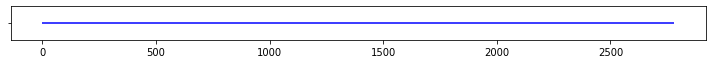

In [15]:
df = pd.read_csv('ecotypes.csv')  
clades = list(df['Clade'])[::-1]

for clade in clades[50:100]:
    for refnum in range(1, 4):
        if refnum:
            directory = join('hvNLR', 'Athaliana_NLR_Phylogeny', 'Autoclades_70_Refinement_%d'%refnum)    
        else:
            directory = join('hvNLR', 'Athaliana_NLR_Phylogeny', 'Autoclades_70')

        clade_filename = clade+'.txt'

        if clade_filename in os.listdir(directory):
            clade_path = join(directory, clade_filename)
            print(clade_path)

            break


    clade_ids = []
    with open(clade_path) as f:
        for line in f:
            if not 'Athaliana' in line:
                if line[-1:] == '\n':
                    clade_ids.append(line[:-1])
                else:
                    clade_ids.append(line)        

    # orthogroup_intron_dir = make_dir('orthogroup_intron_map', clade)

    for ii, prot_id in tqdm(list(enumerate(clade_ids))):
        splitname = prot_id.split('_')
        ecotype, prot = splitname[0], splitname[1]

        annotation = gffpd.read_gff3(make_path('gff', ecotype+'.gff'))
        df = annotation.df

        foundGene = False
        exon_start_l = []
        exon_end_l = []

        for ii in range(df.shape[0]):
            if df.iloc[ii]['type'] == 'mRNA':
                if not foundGene:
                    if df.iloc[ii]['attributes'].split('|')[1].split(';')[0] == prot:
                        foundGene = True
                        startGene = df.iloc[ii]['start']
                else:
                    break
            elif df.iloc[ii]['type'] == 'exon':
                if foundGene:
                    exon_start_l.append(df.iloc[ii]['start'])
                    exon_end_l.append(df.iloc[ii]['end'])
        plt.figure(figsize = (10, 3))

        geneStart = min([min(coord) for coord in zip(exon_start_l, exon_end_l)])

        exon_start_l = sorted([x - startGene for x in exon_start_l])
        exon_end_l = sorted([x - startGene for x in exon_end_l])

        fig = plt.figure(figsize = (10, 1))
        for xmin, xmax in zip(exon_start_l, exon_end_l):
            plt.hlines(y='', xmin=xmin, xmax=xmax, color='b')

        for xmin, xmax in zip(exon_end_l[:-1], exon_start_l[1:]):
            plt.hlines(y='', xmin=xmin, xmax=xmax, color='r')        
        fig.tight_layout()        
        fig.patch.set_facecolor('xkcd:white') # make transparent background white
        fig.savefig(make_path('orthogroup_intron_map', clade, prot_id+'.png'), bbox_inches="tight")
        plt.close(fig)                



In [16]:
LRR_starts_d

{'10015_T018-R1': 550,
 '10015_T022-R1': 526,
 '10015_T023-R1': 551,
 '10015_T024-R1': 411,
 '10015_T026-R1': 503,
 '10015_T031-R1': 500,
 '10015_T032-R1': 583,
 '10015_T036-R1': 711,
 '10015_T040-R1': 556,
 '10015_T042-R1': 533,
 '10015_T047-R1': 616,
 '10015_T048-R1': 556,
 '10015_T049-R1': 491,
 '10015_T052-R1': 363,
 '10015_T054-R1': 556,
 '10015_T062-R1': 552,
 '10015_T063-R1': 557,
 '10015_T065-R1': 522,
 '10015_T066-R1': 1070,
 '10015_T067-R1': 570,
 '10015_T069-R1': 555,
 '10015_T070-R1': 475,
 '10015_T071-R1': 558,
 '10015_T074-R1': 506,
 '10015_T075-R1': 586,
 '10015_T076-R1': 553,
 '10015_T078-R1': 540,
 '10015_T079-R1': 1181,
 '10015_T083-R1': 494,
 '10015_T084-R1': 516,
 '10015_T087-R1': 565,
 '10015_T090-R1': 516,
 '10015_T092-R1': 597,
 '10015_T097-R1': 571,
 '10015_T098-R1': 632,
 '10015_T104-R1': 472,
 '10015_T108-R1': 540,
 '10015_T109-R1': 512,
 '10015_T111-R1': 533,
 '10015_T127-R1': 777,
 '10015_T128-R1': 763,
 '10015_T132-R1': 1027,
 '10015_T133-R1': 533,
 '10015_

/var/folders/45/nz69bfvs2ln_8kzfwp938vmh0000gn/T/ipykernel_83211/2597405428.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10, 7))


KeyboardInterrupt: 

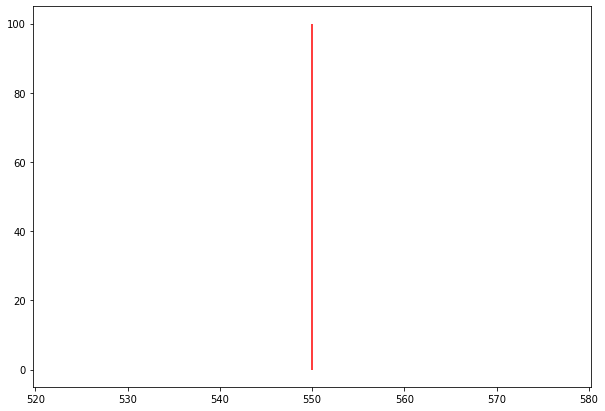

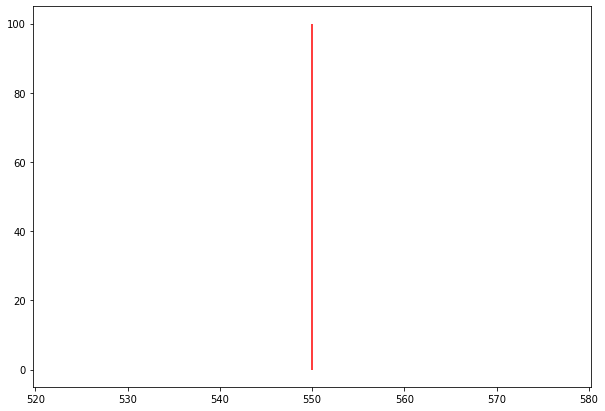

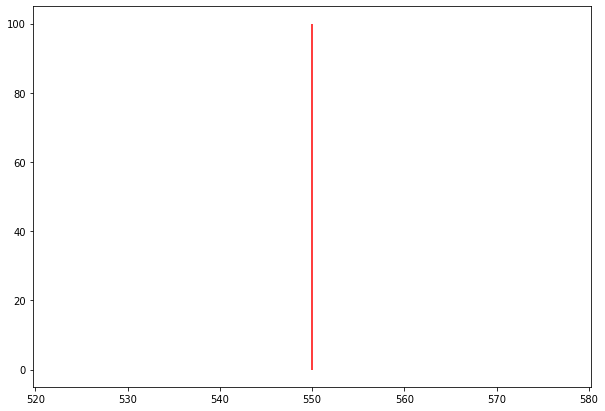

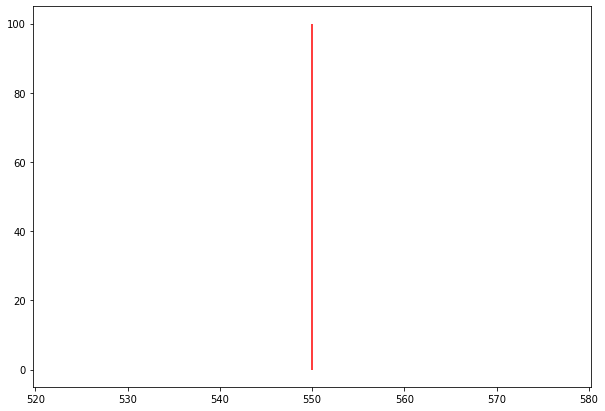

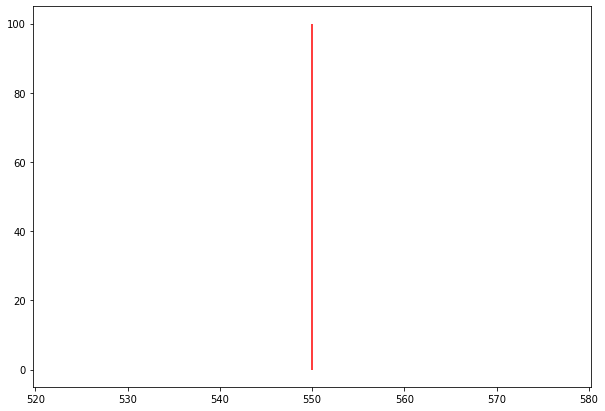

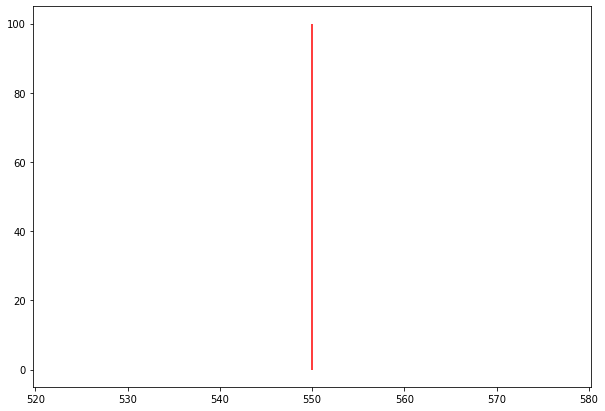

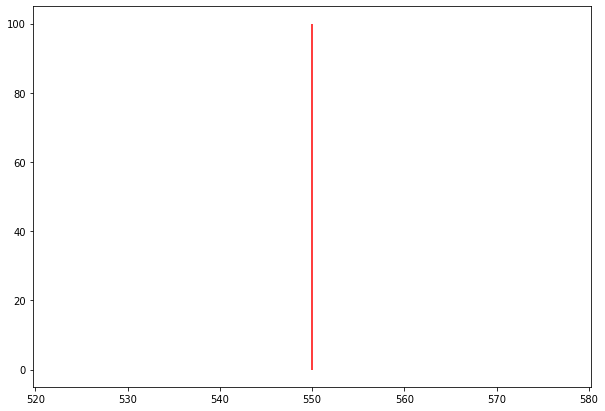

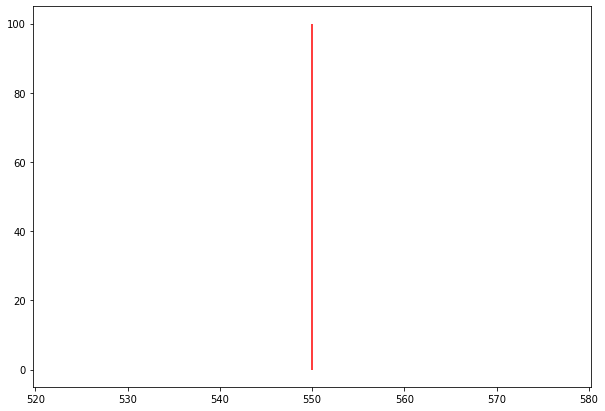

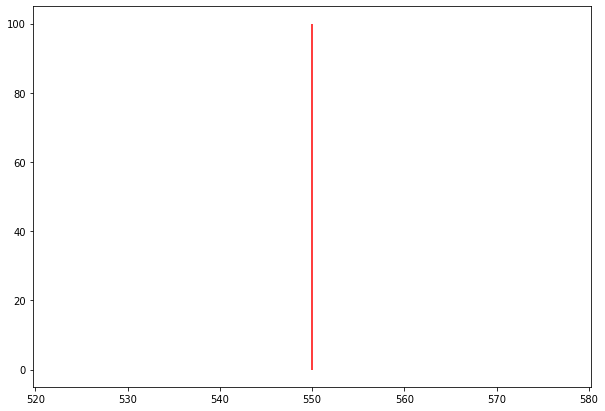

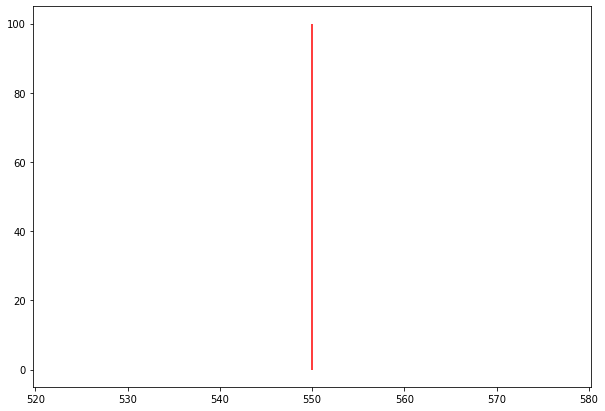

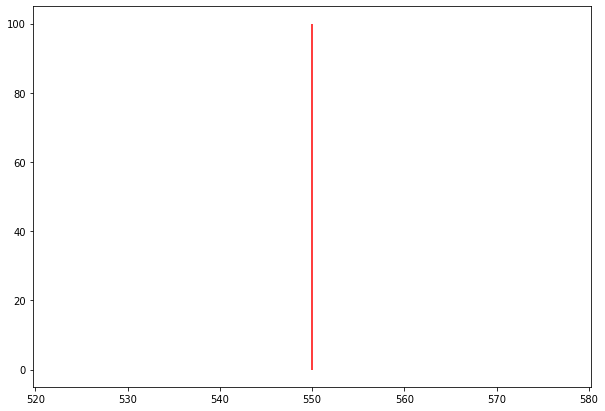

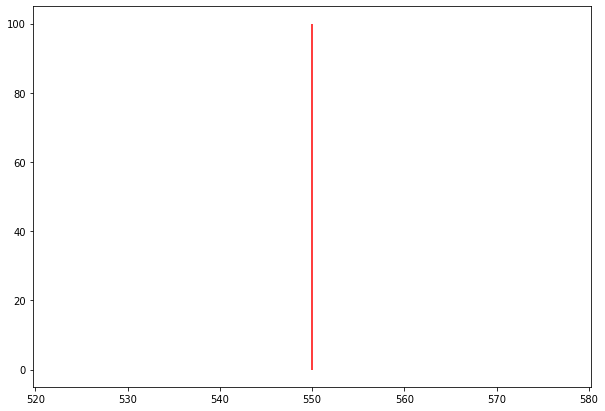

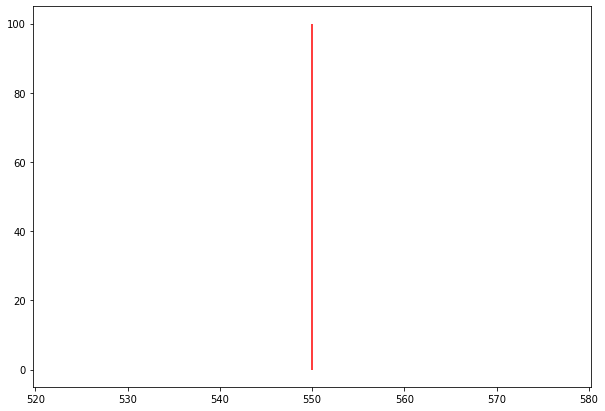

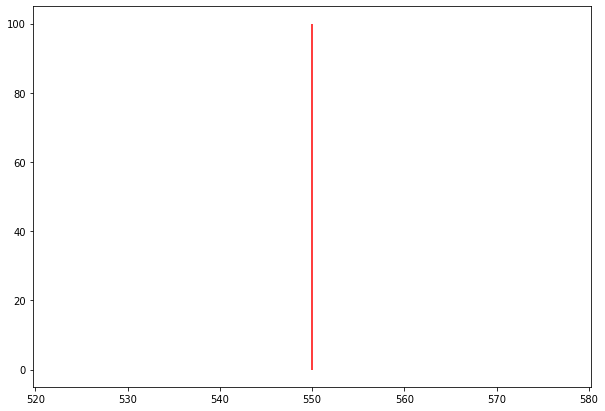

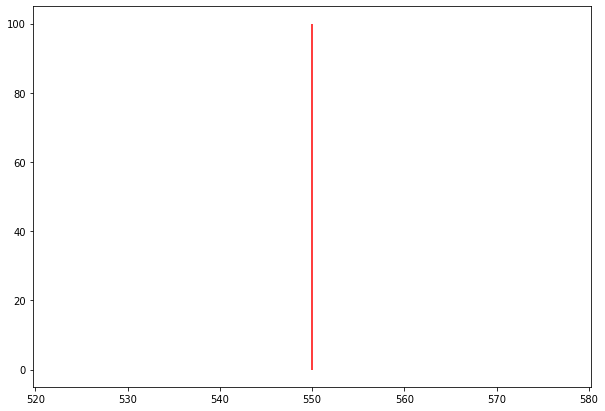

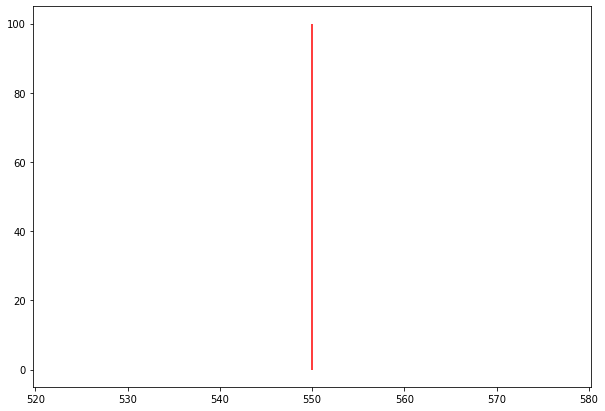

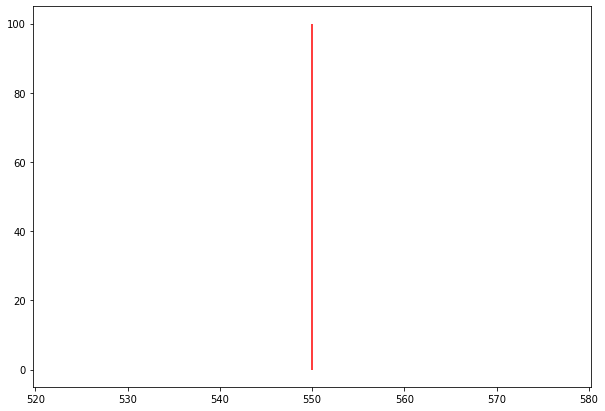

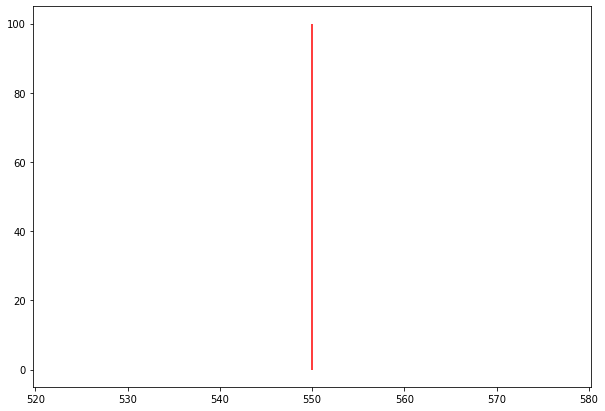

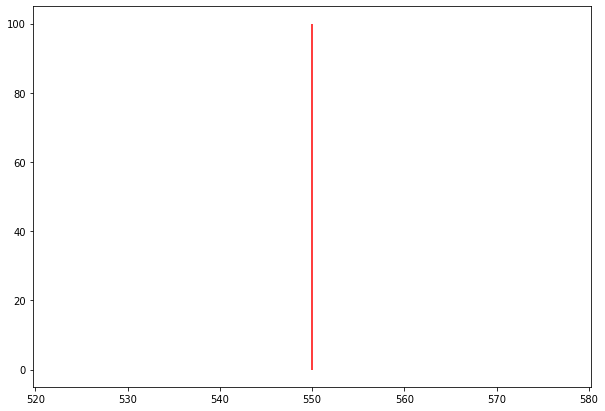

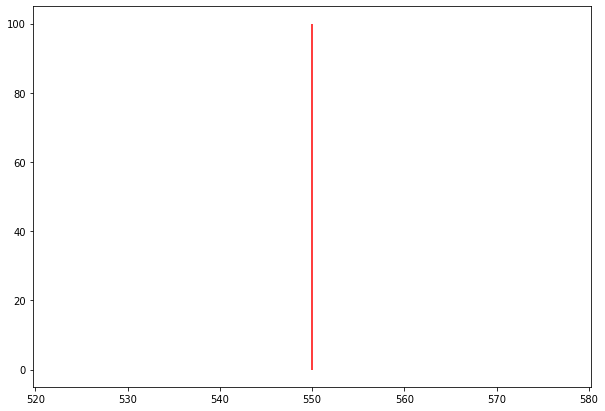

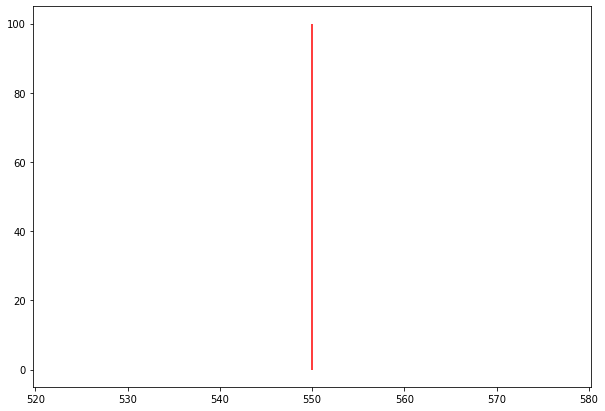

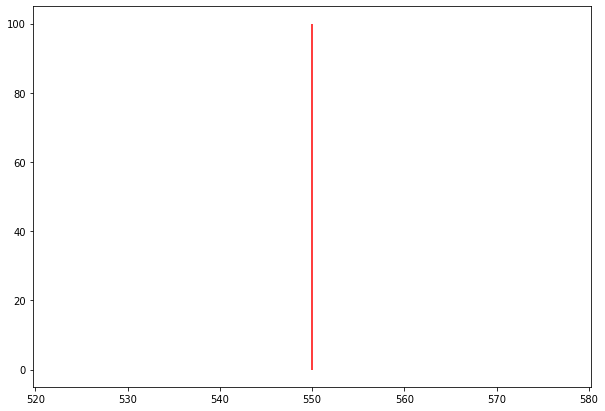

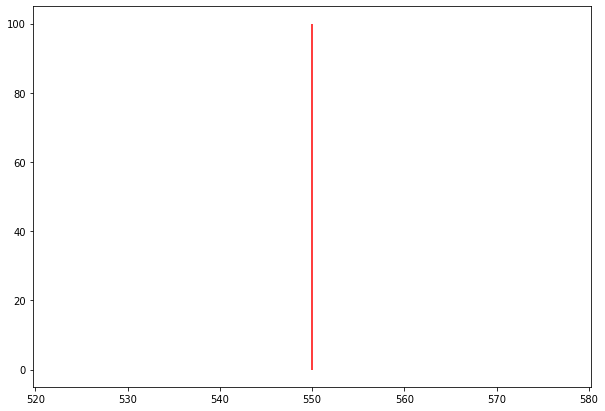

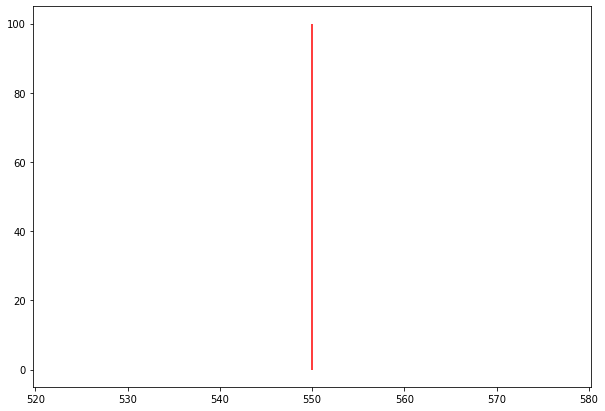

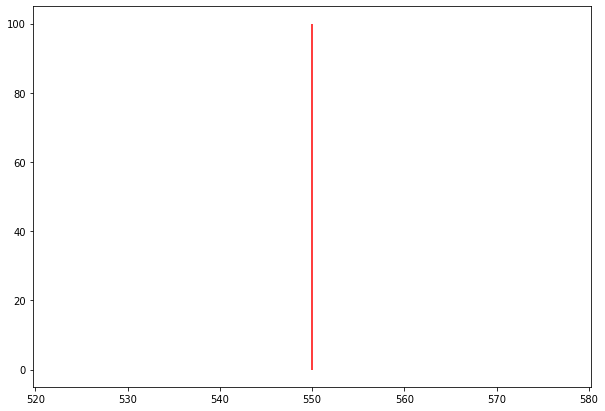

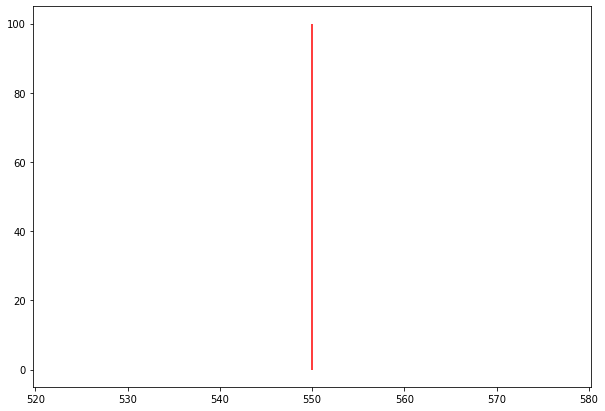

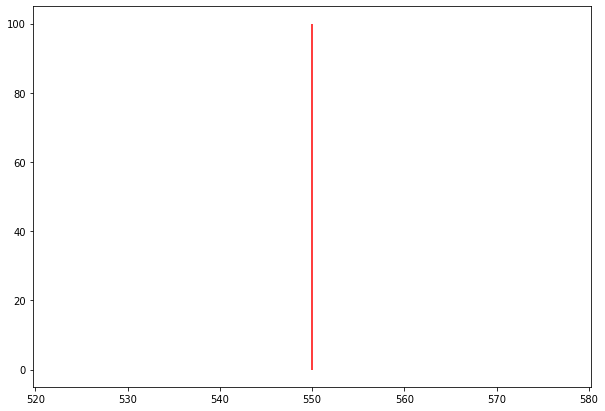

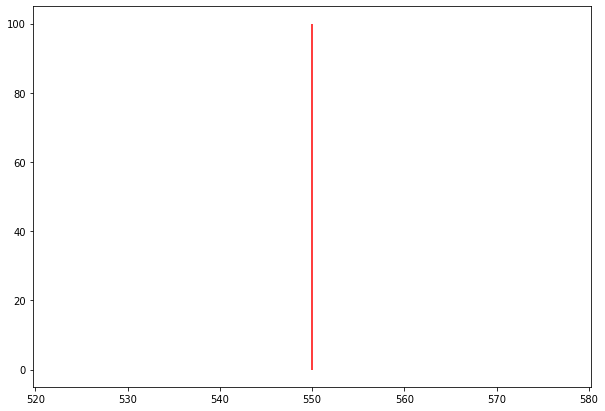

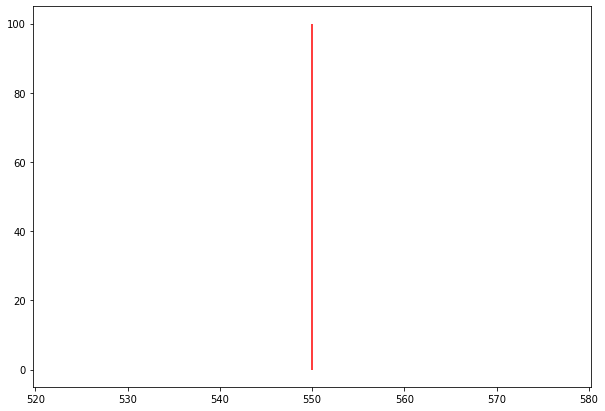

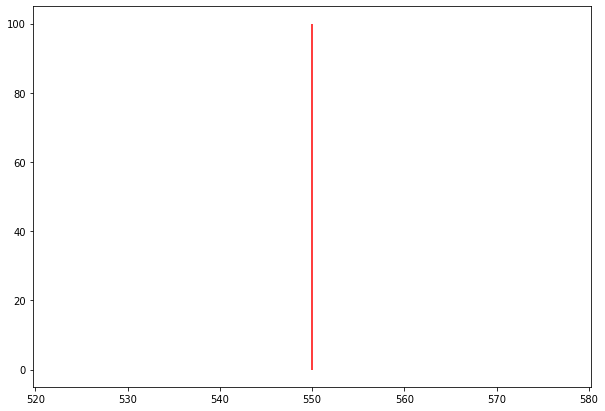

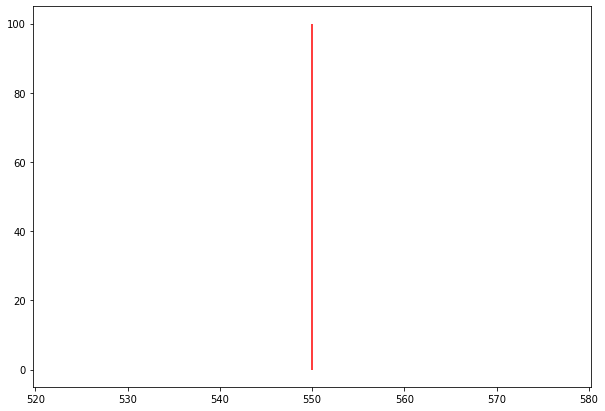

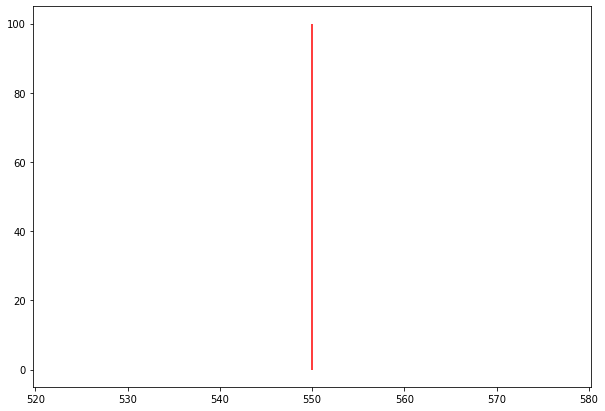

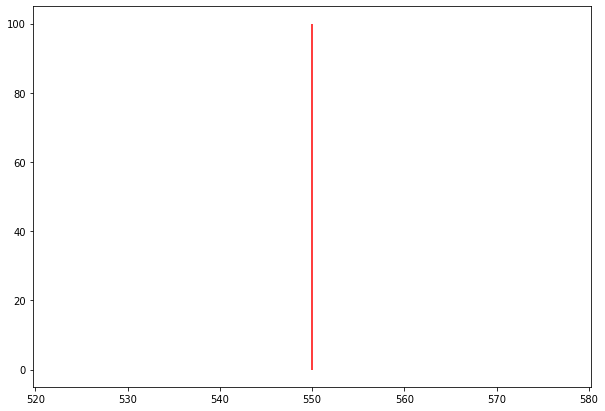

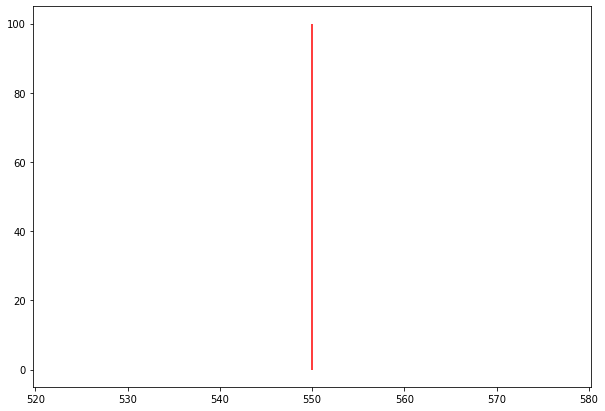

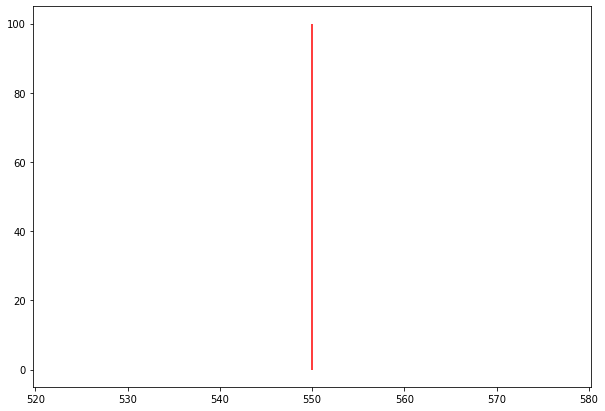

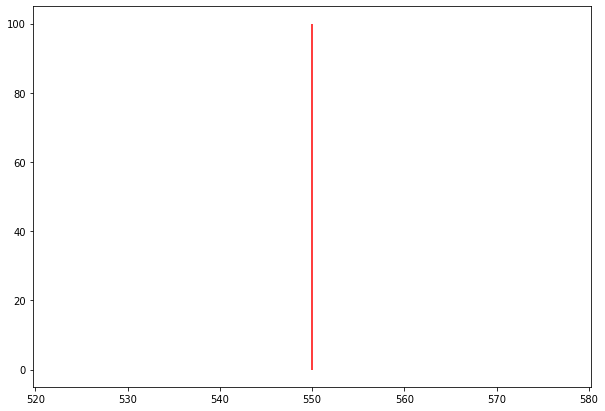

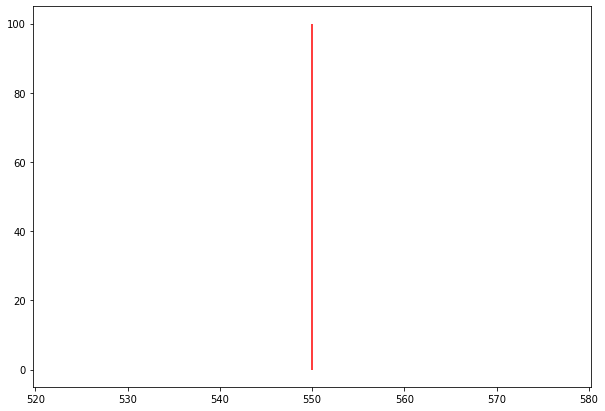

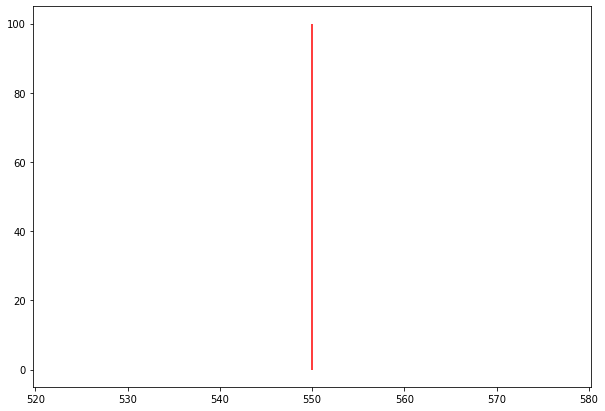

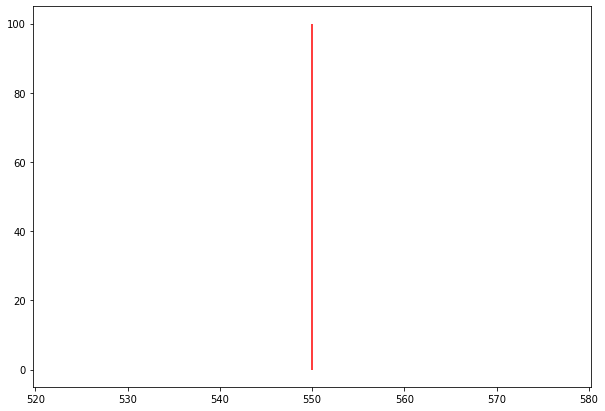

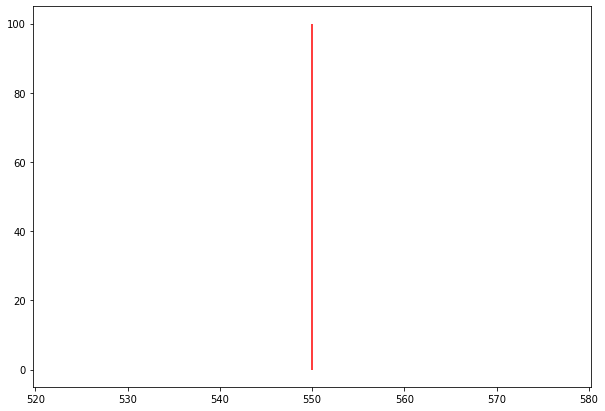

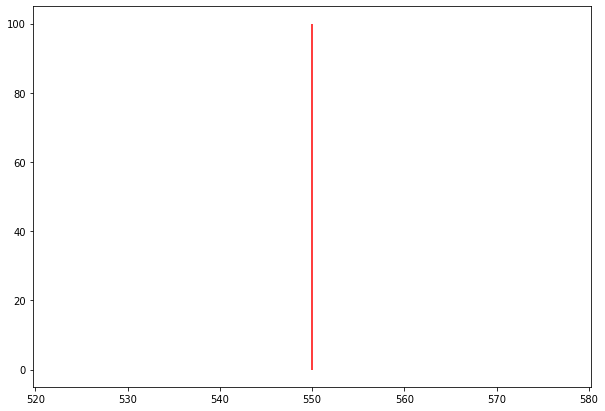

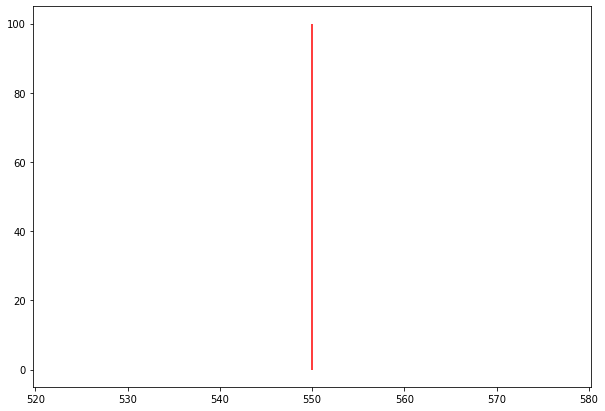

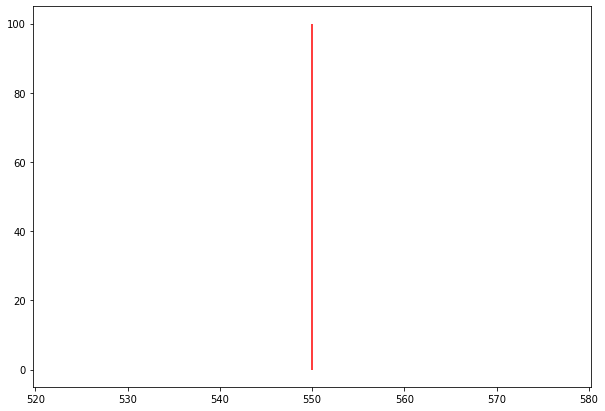

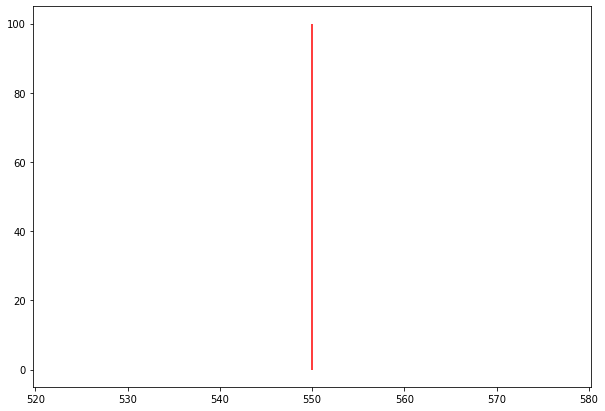

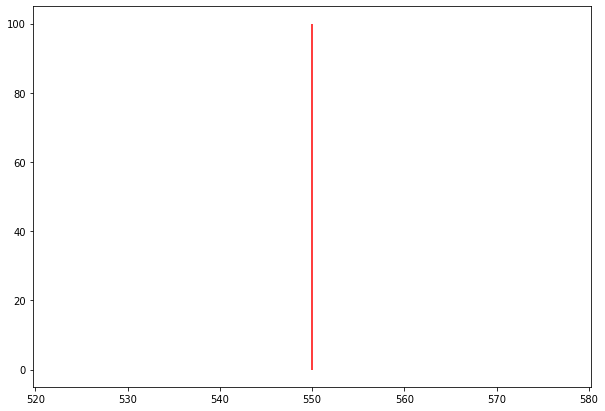

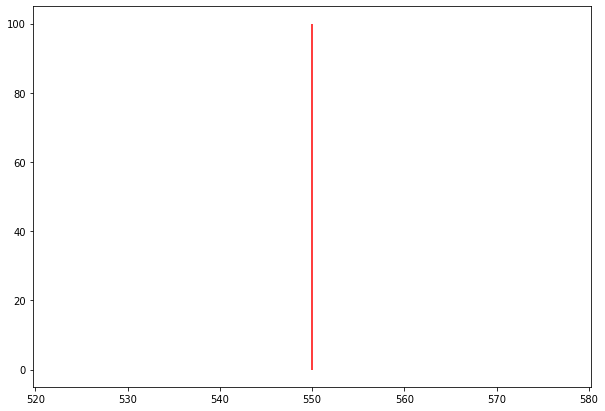

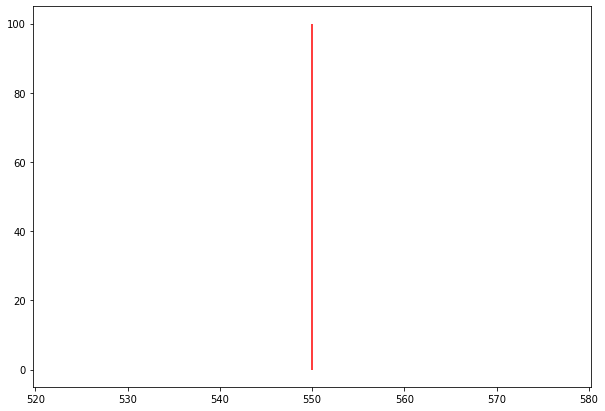

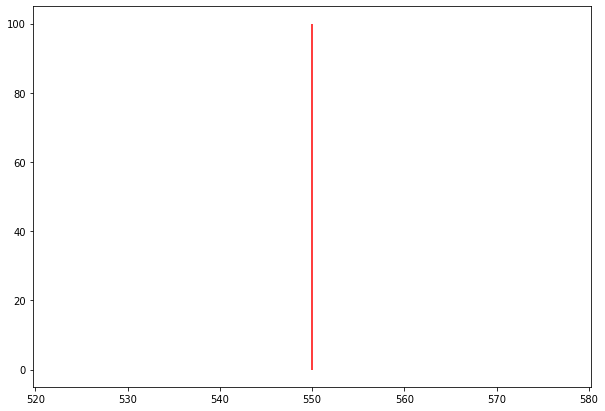

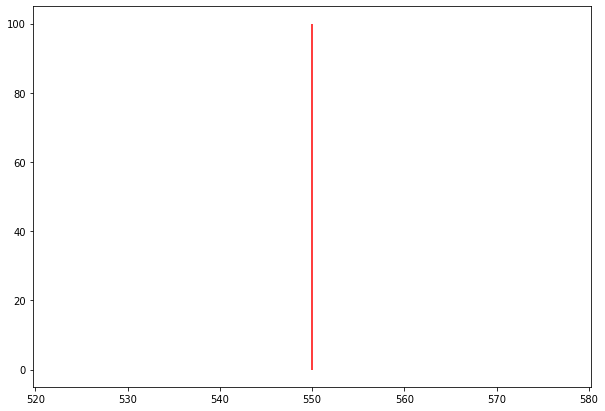

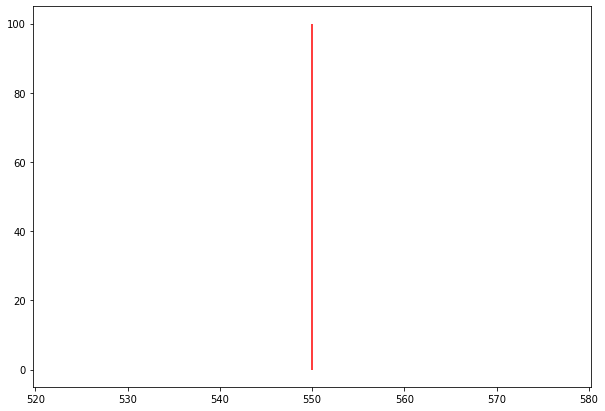

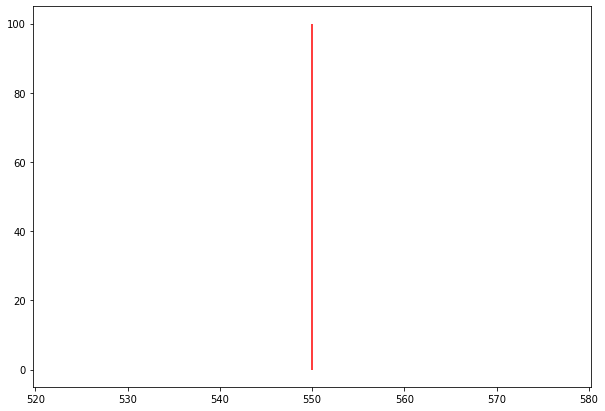

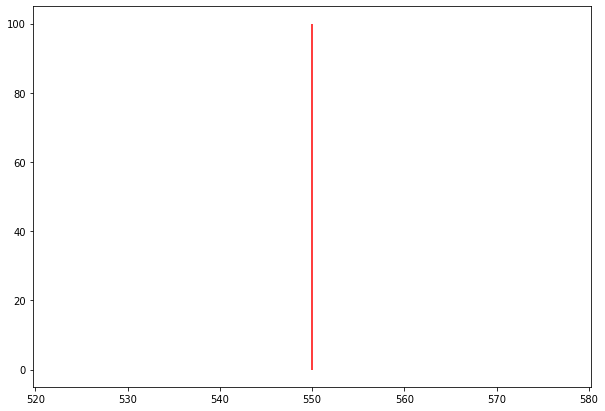

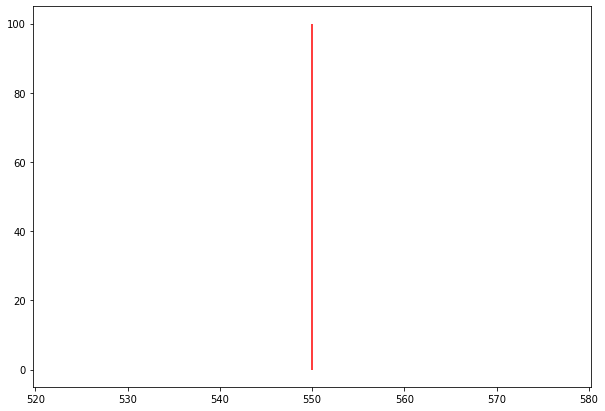

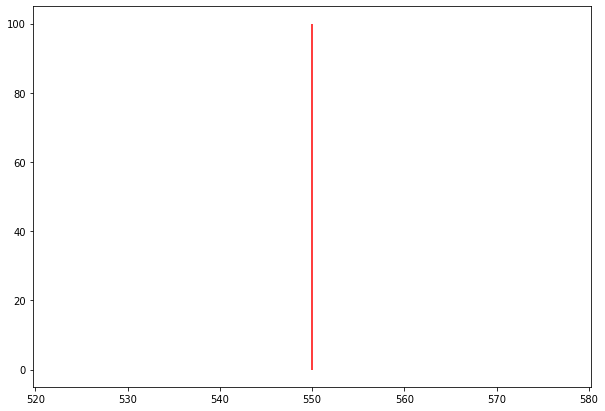

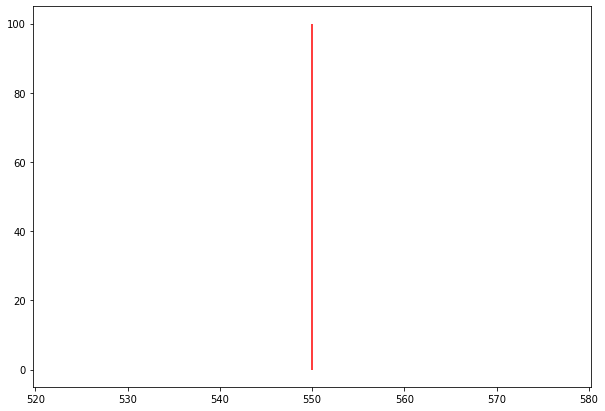

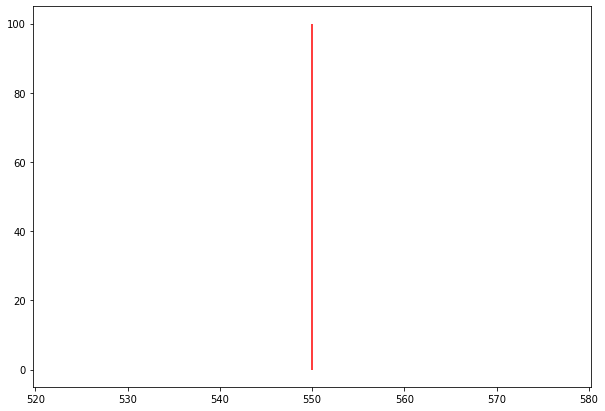

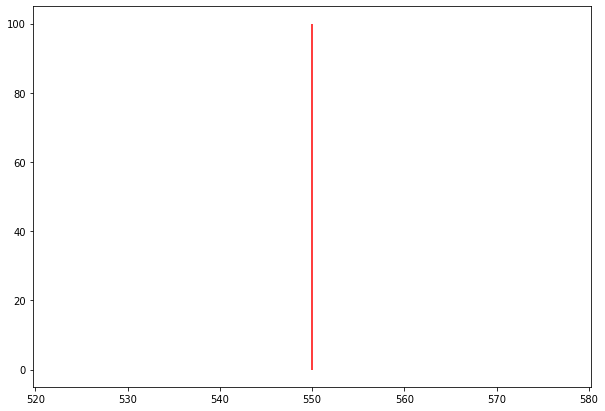

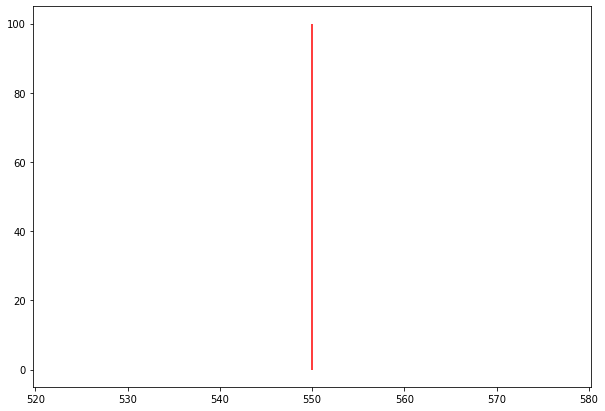

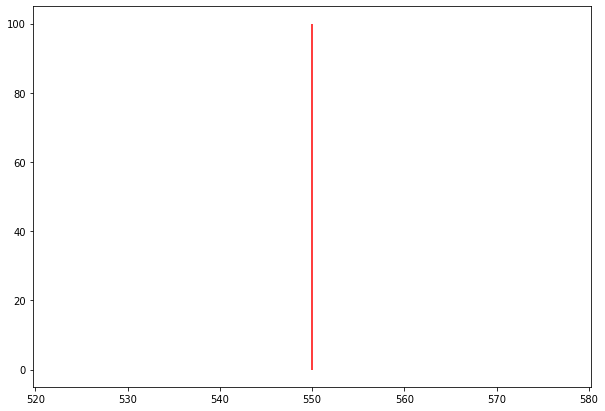

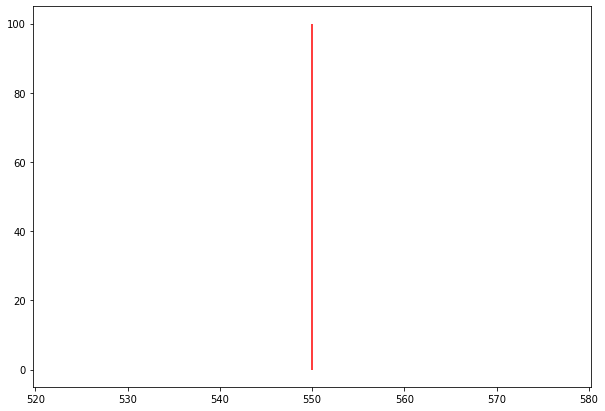

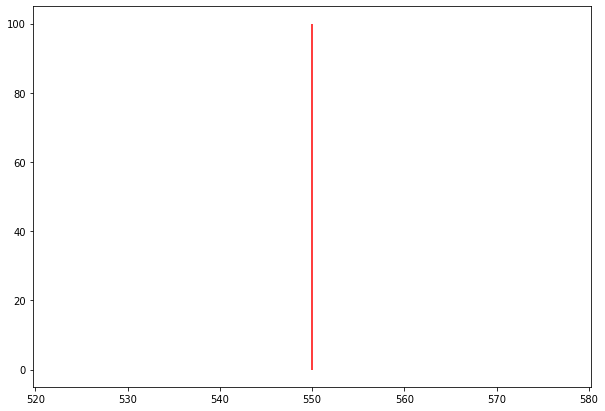

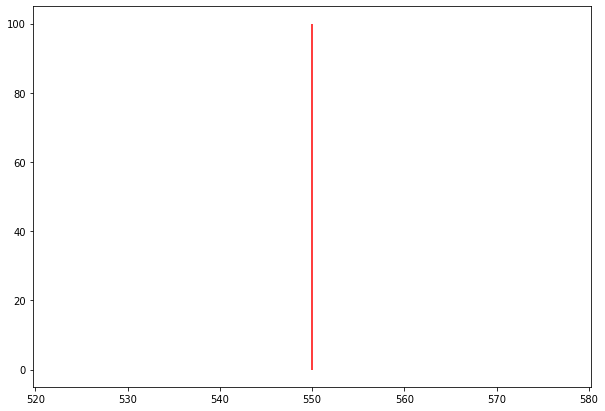

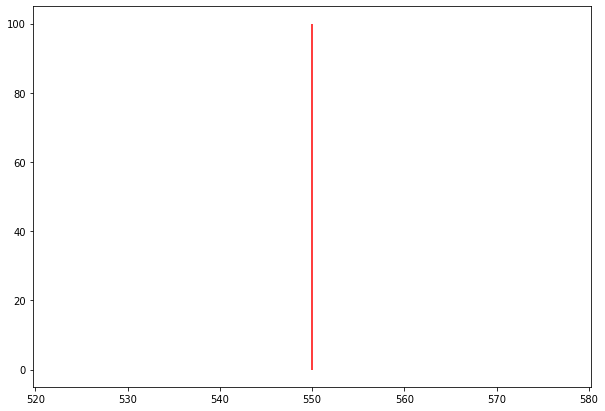

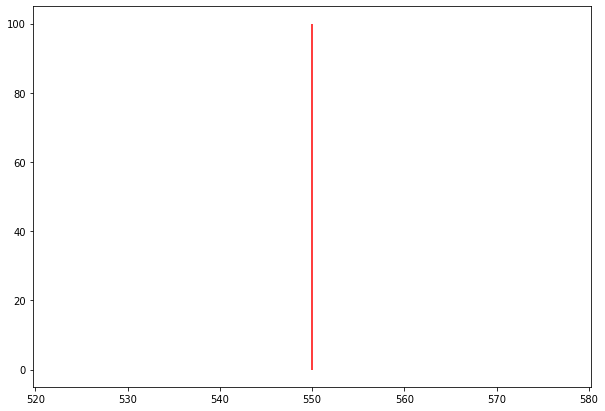

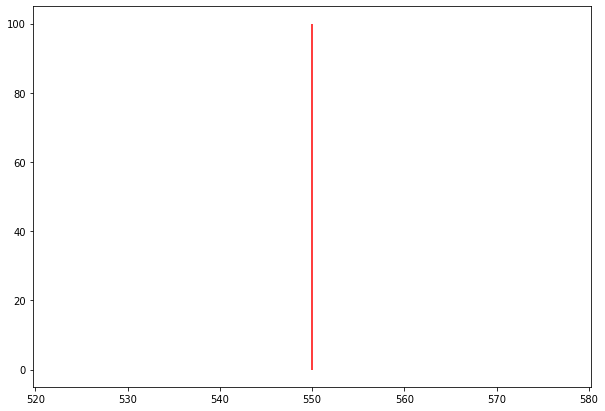

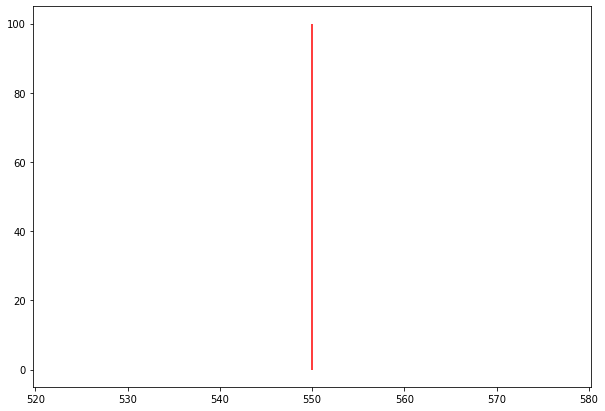

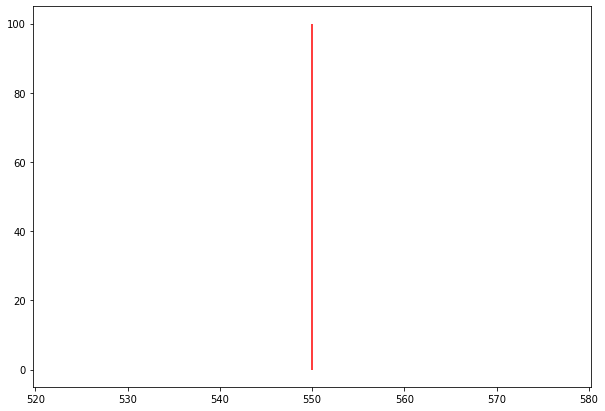

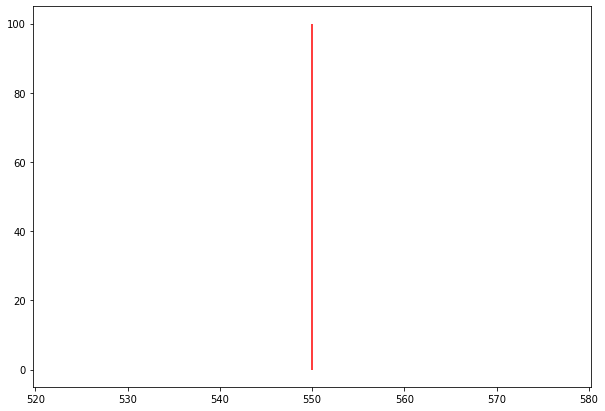

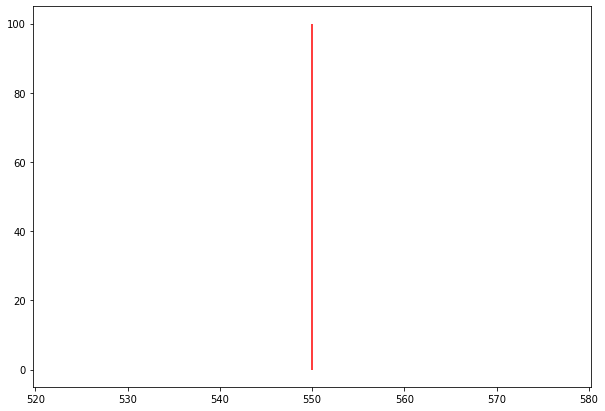

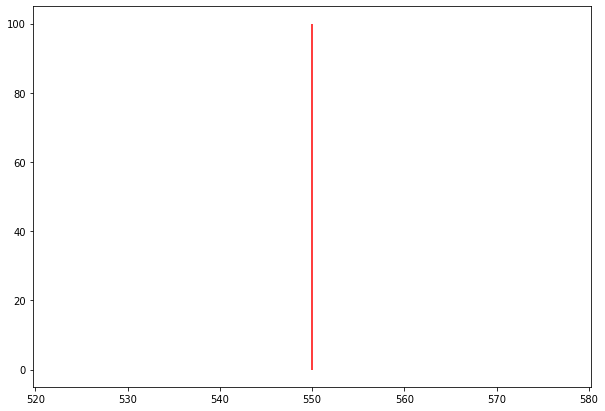

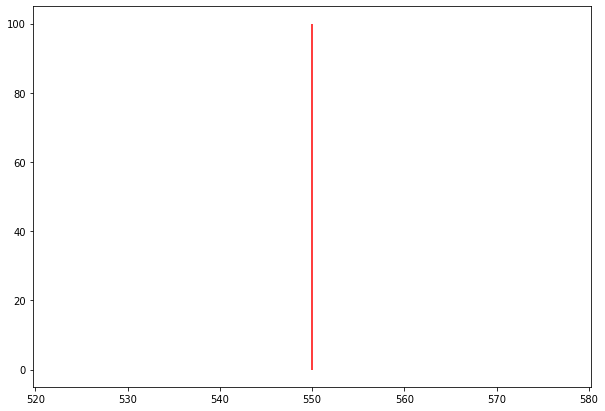

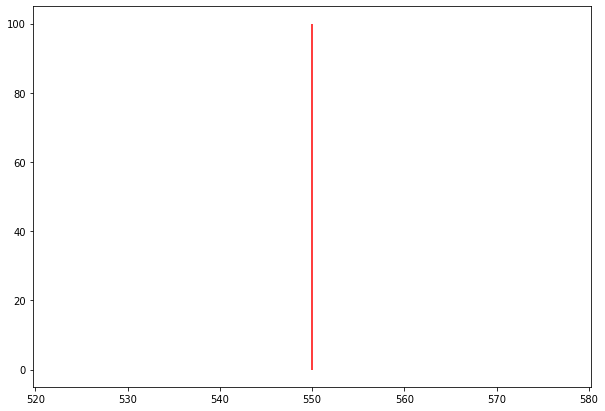

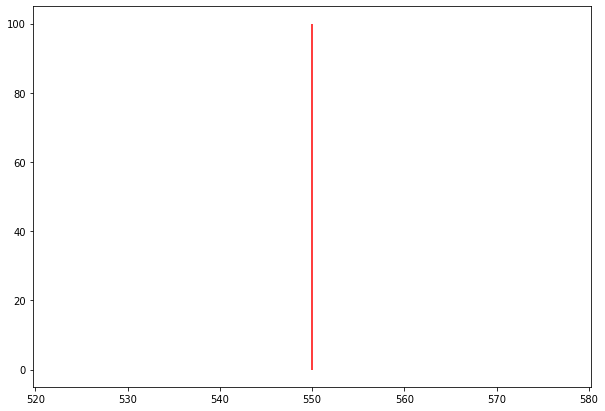

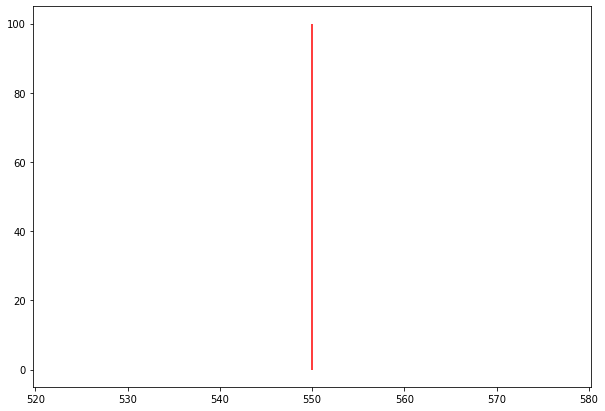

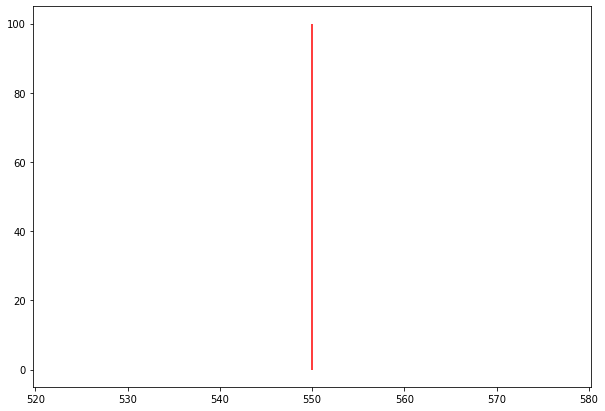

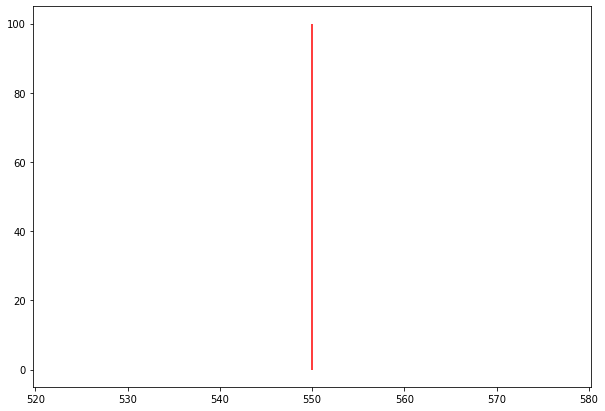

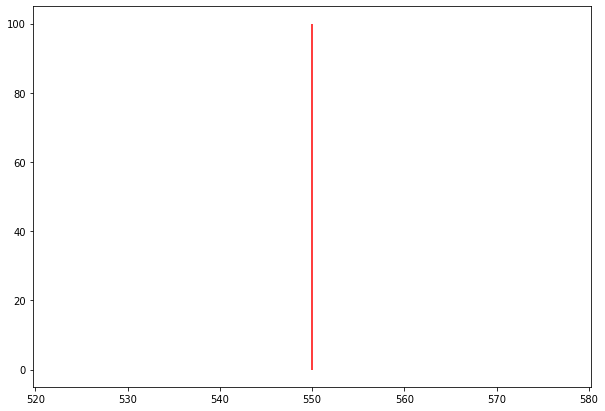

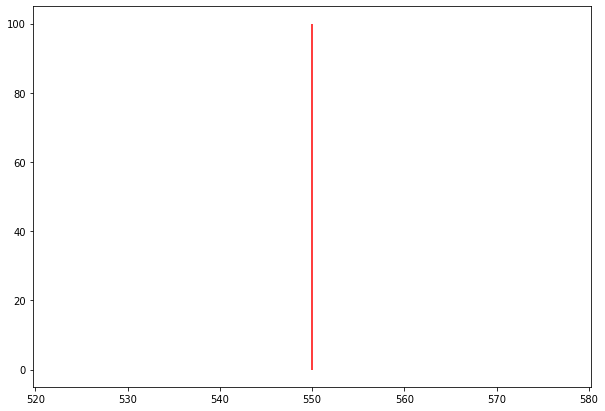

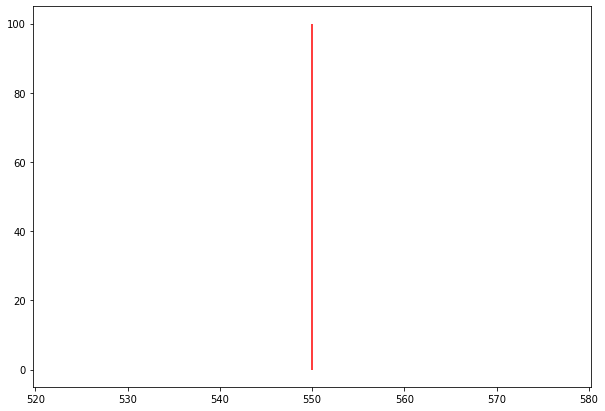

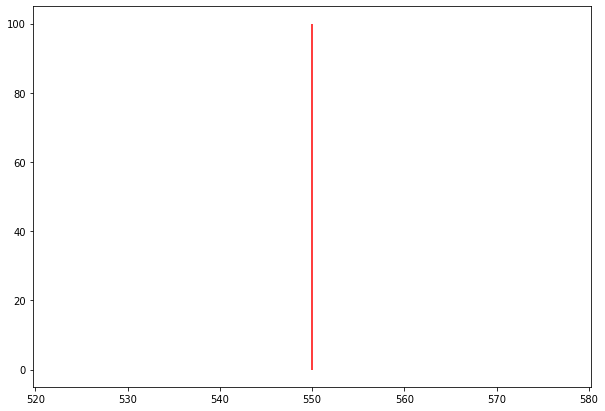

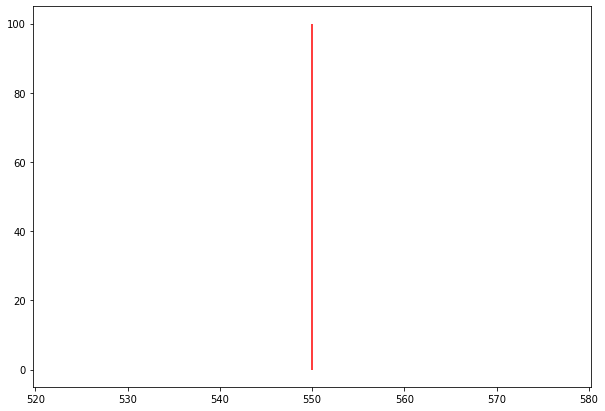

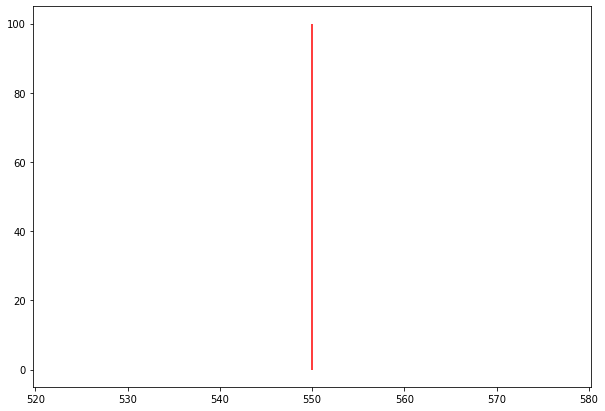

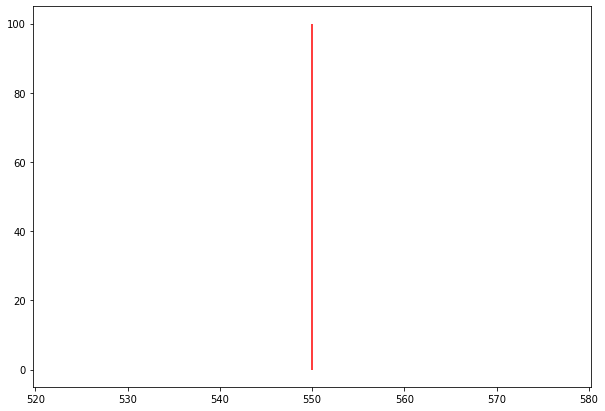

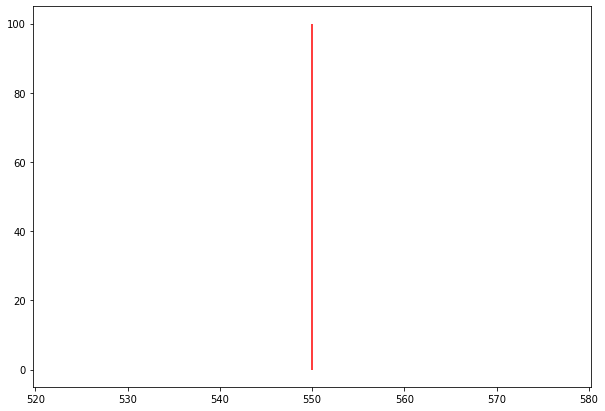

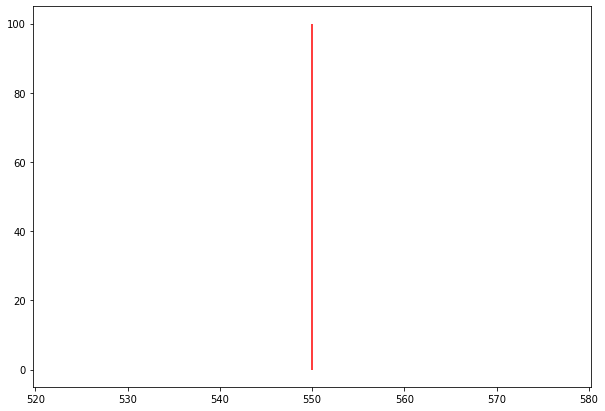

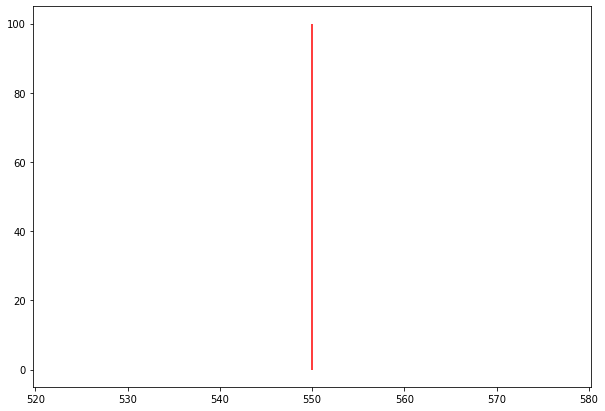

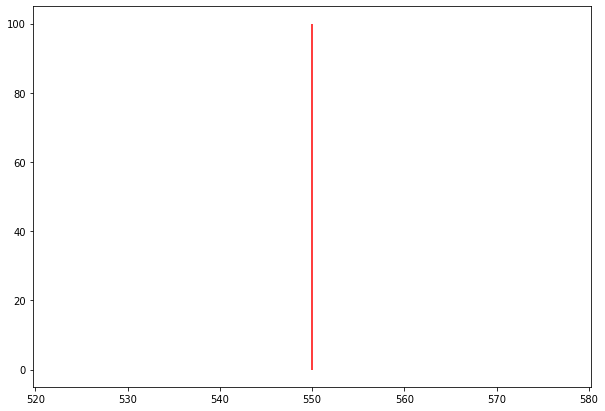

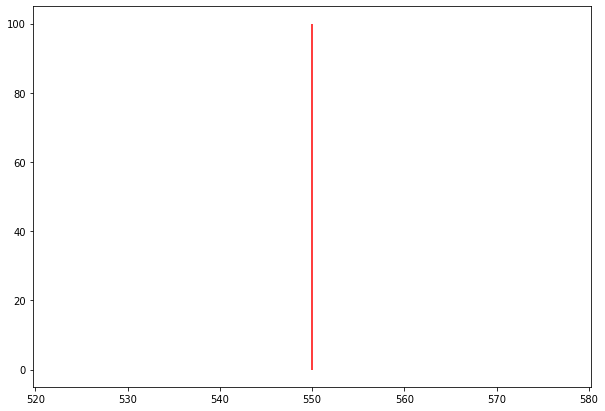

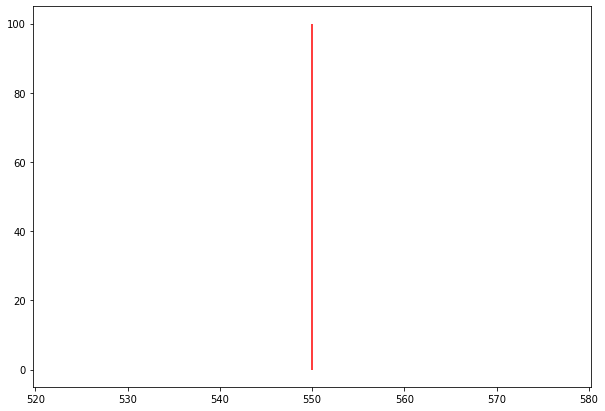

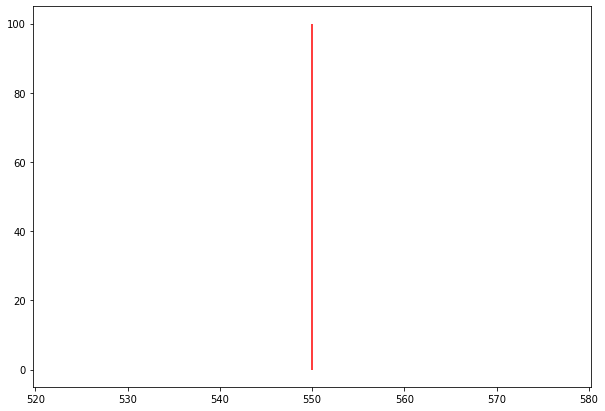

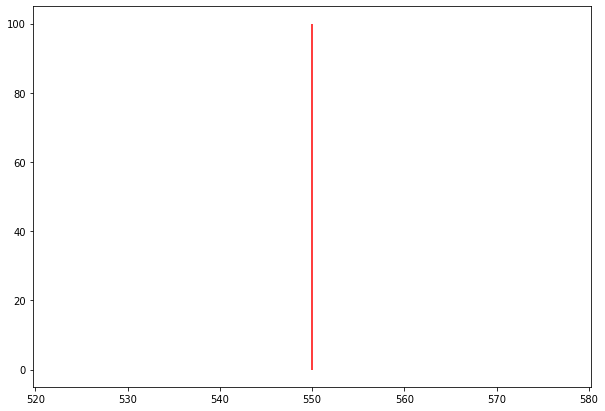

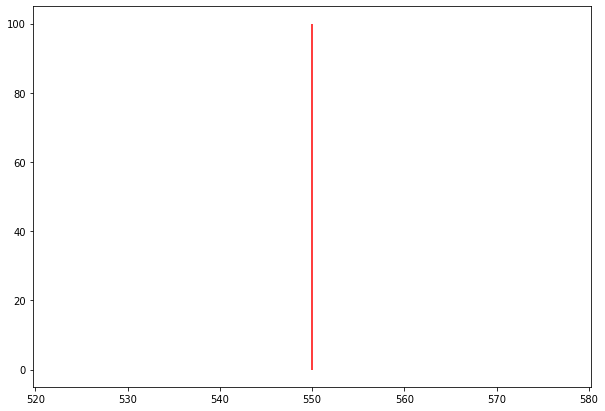

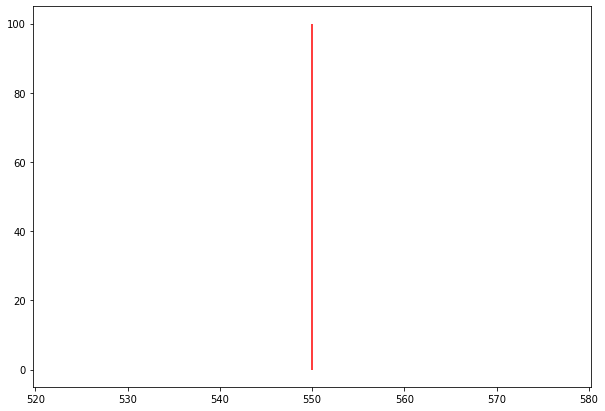

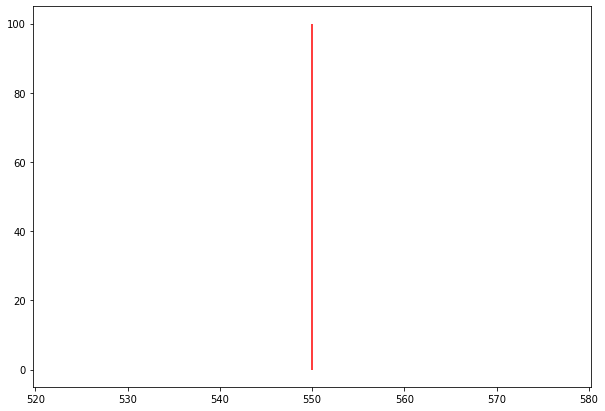

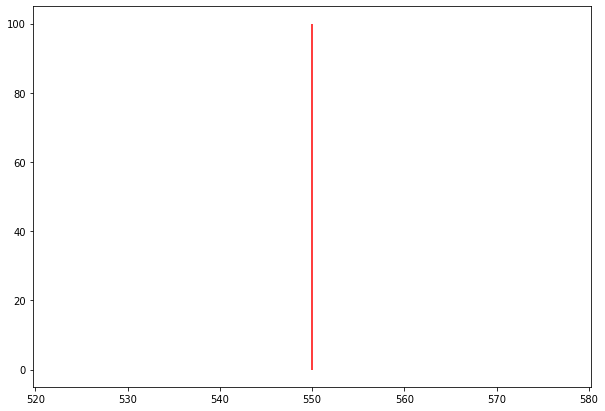

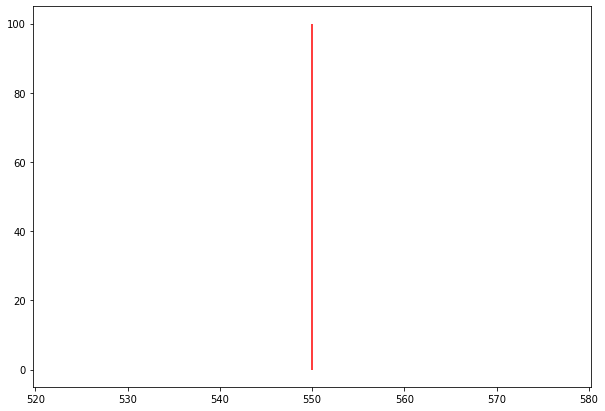

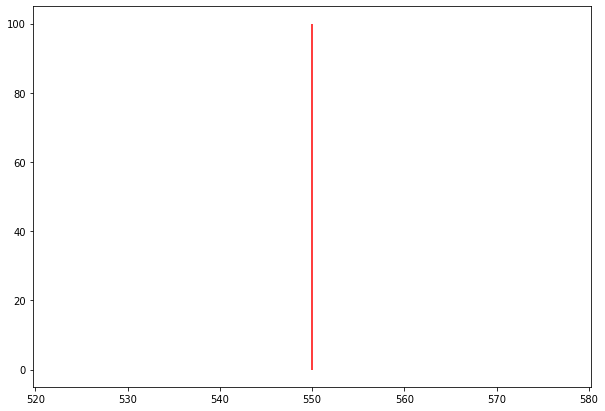

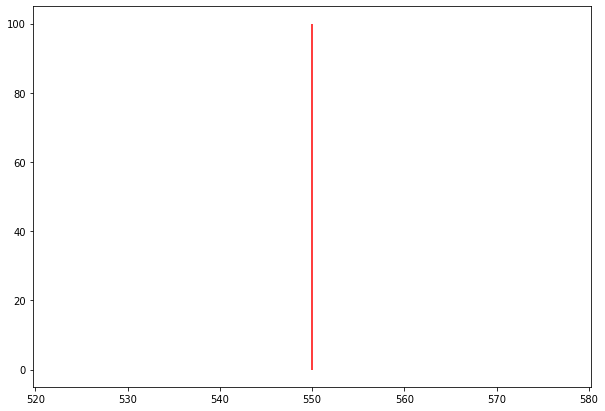

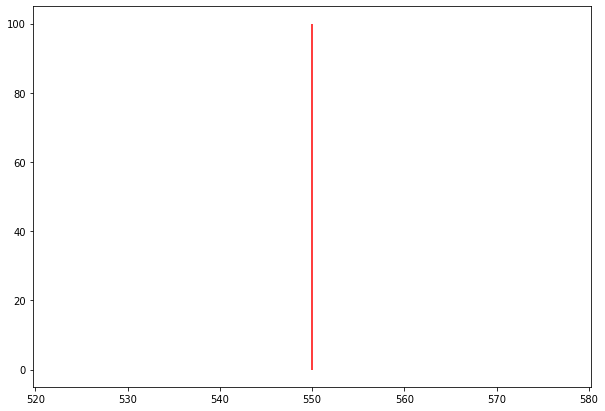

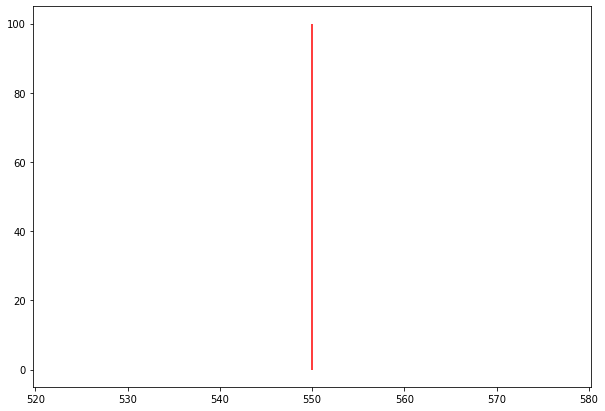

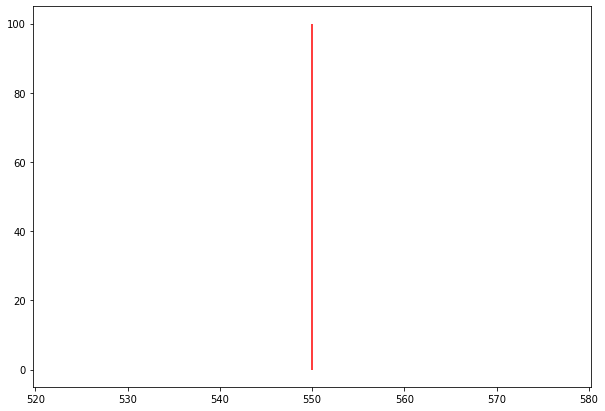

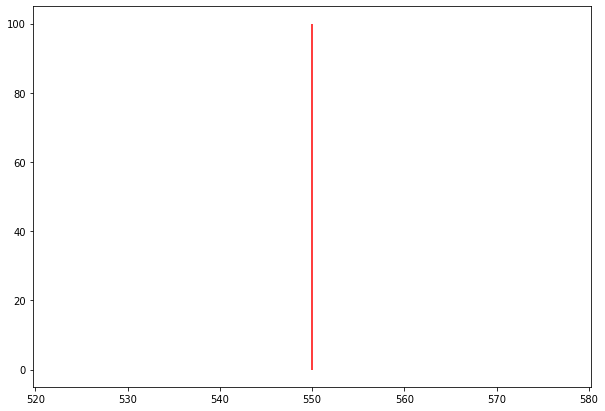

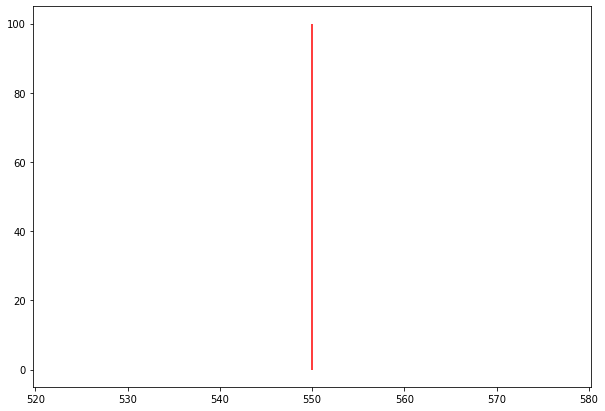

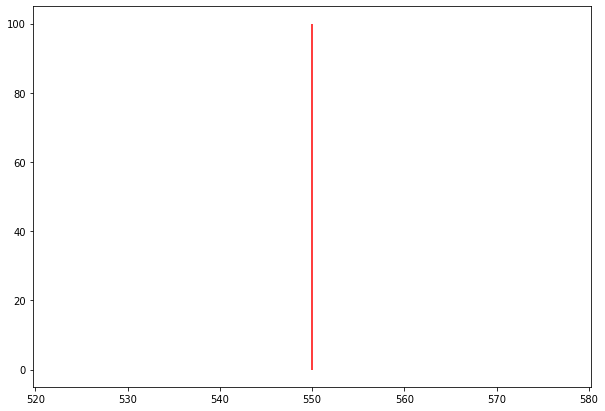

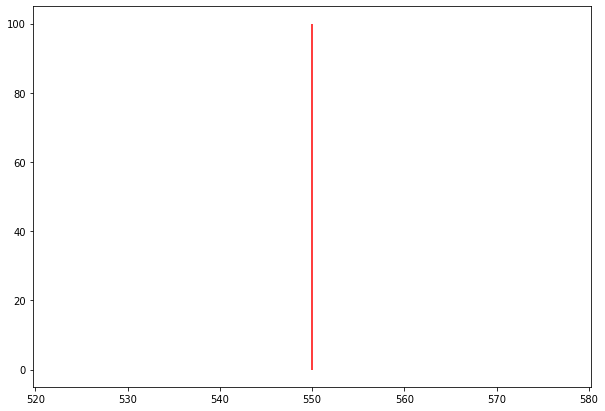

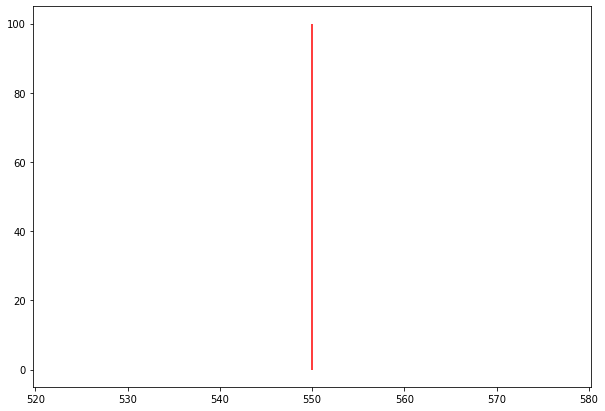

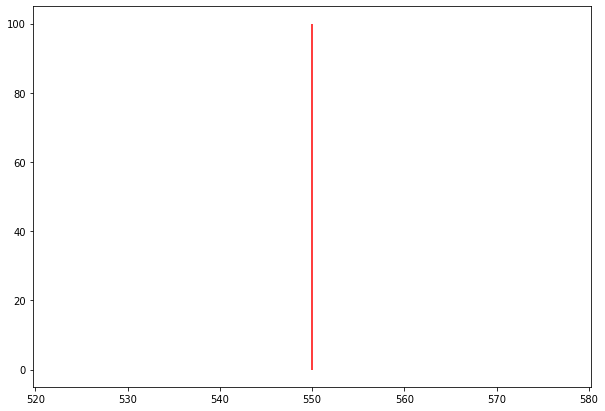

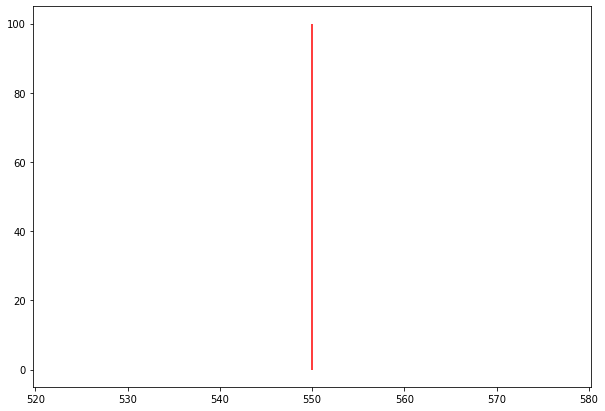

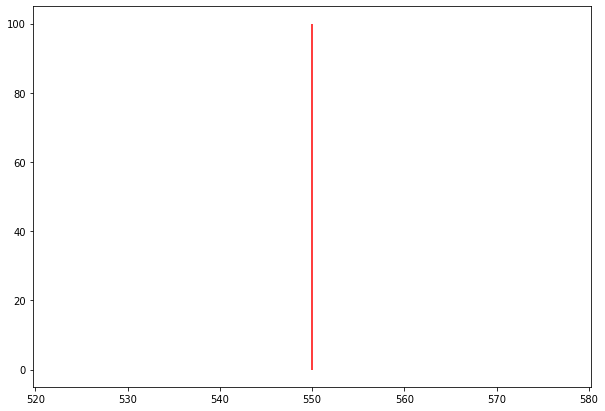

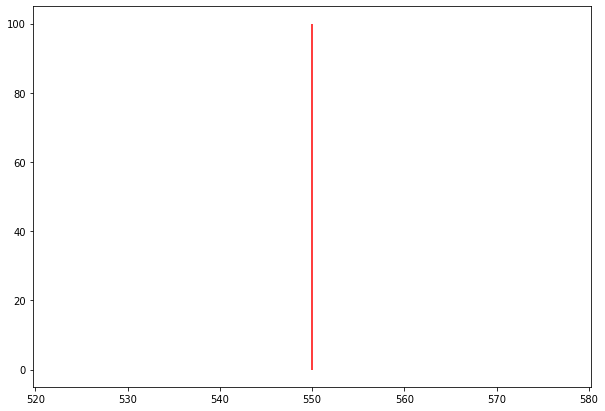

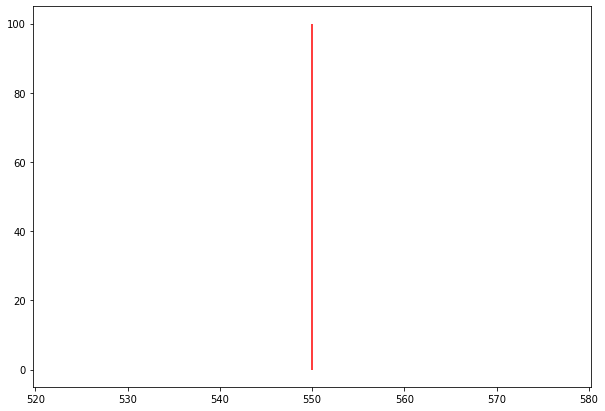

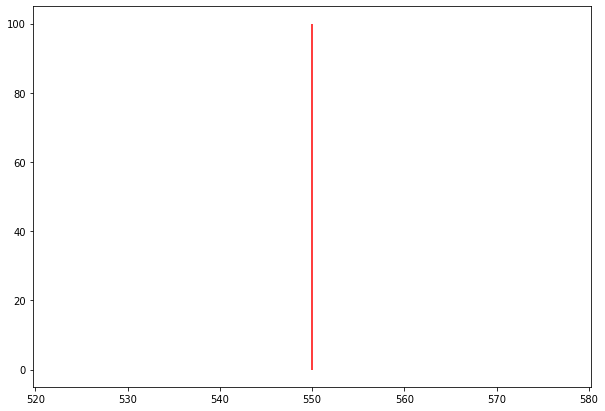

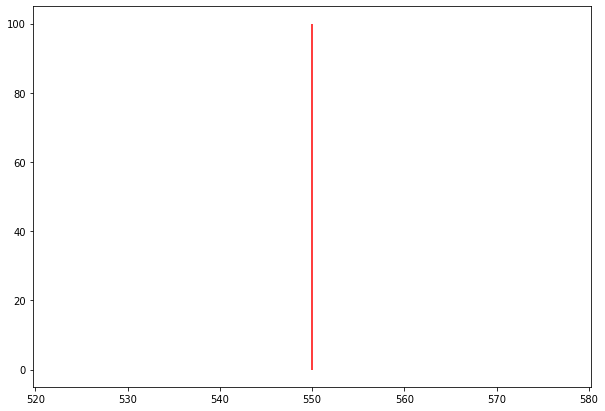

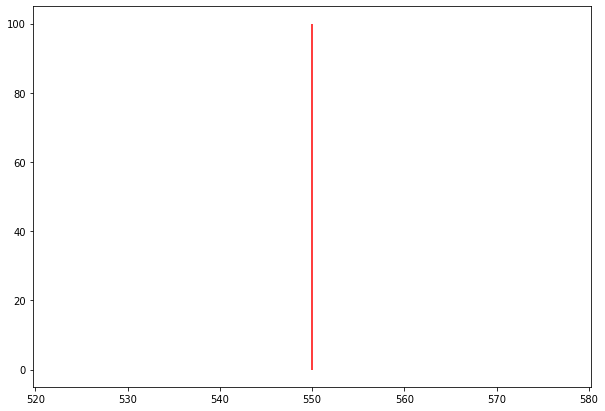

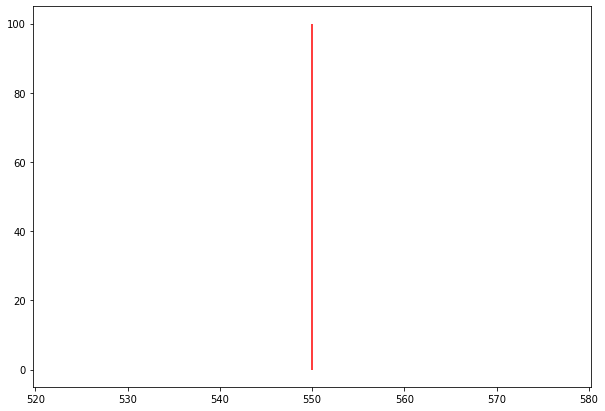

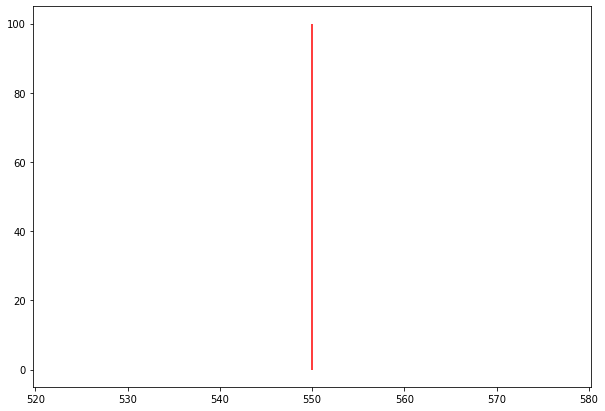

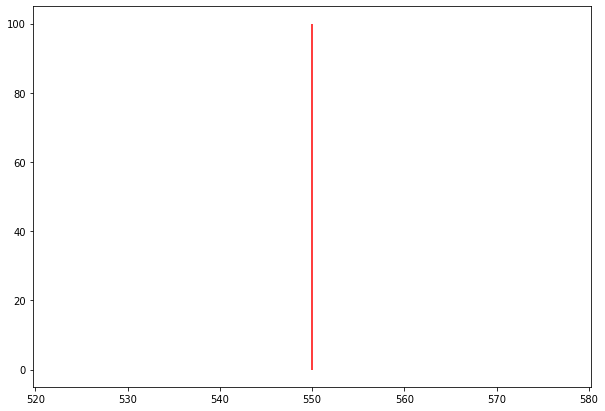

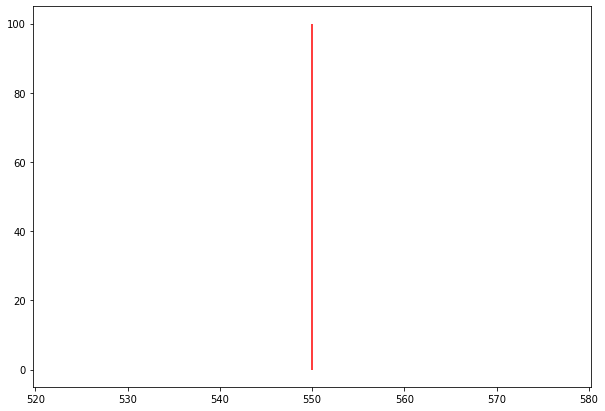

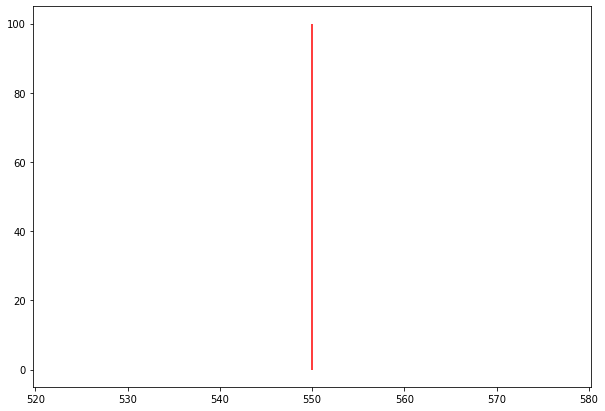

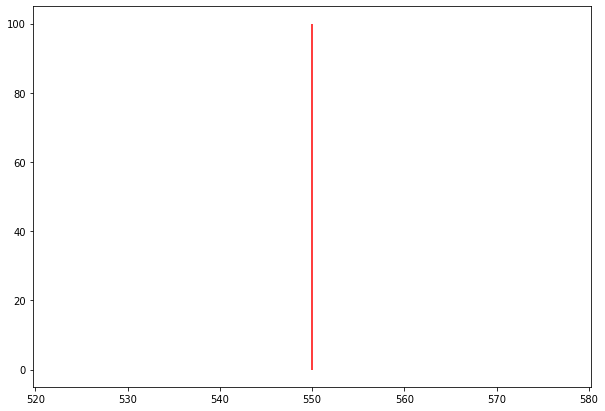

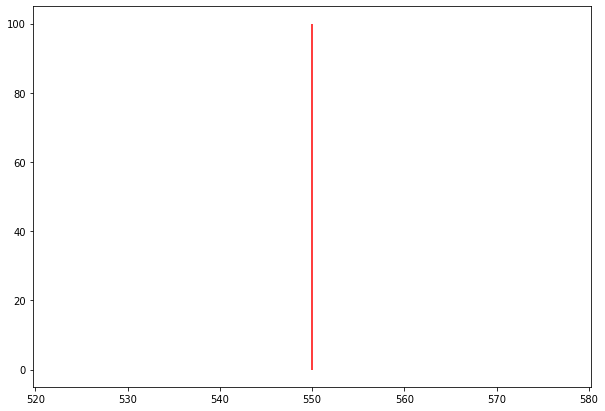

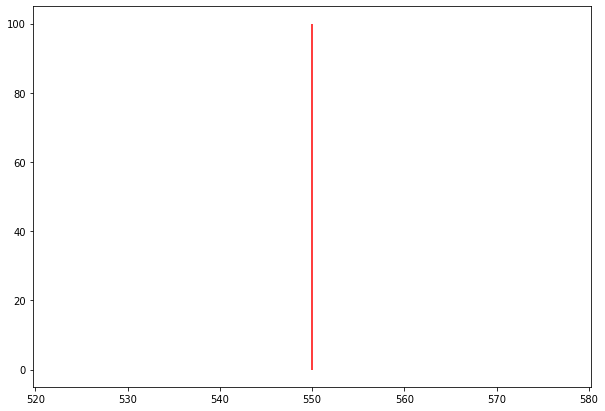

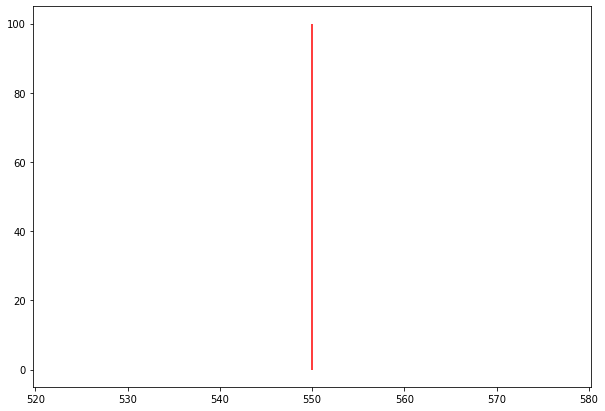

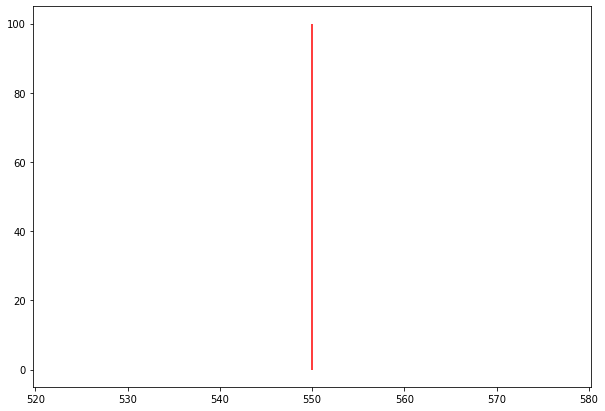

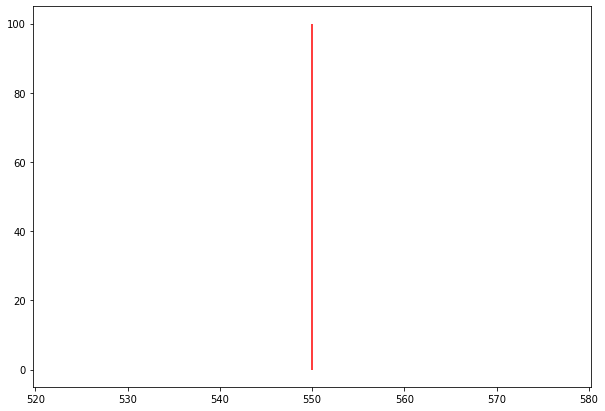

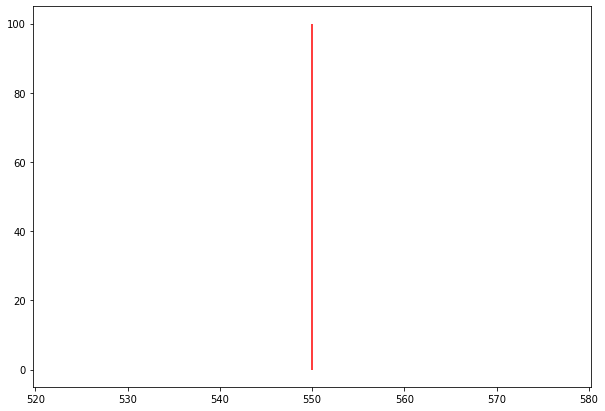

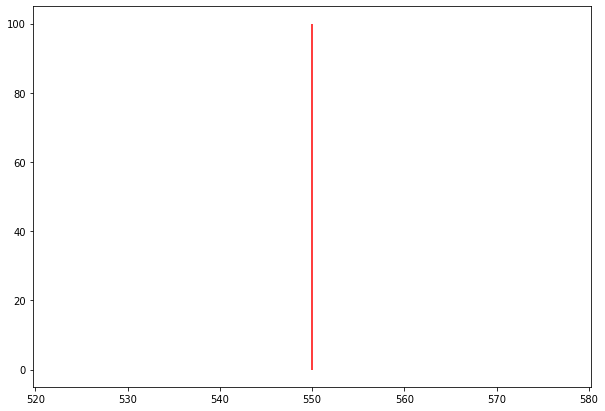

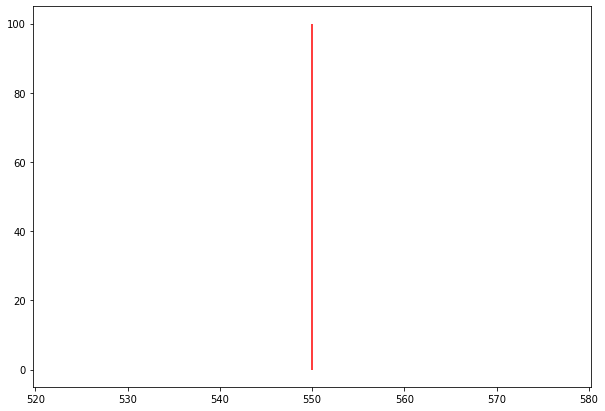

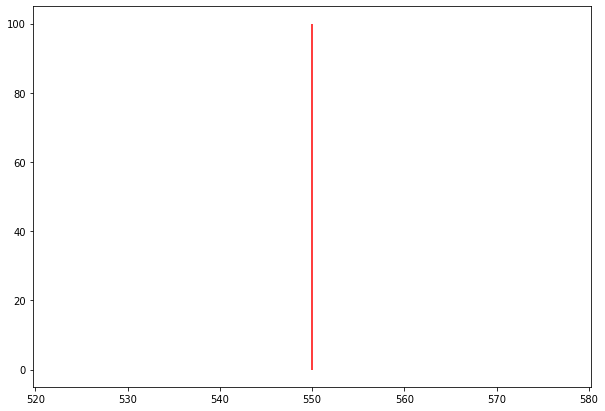

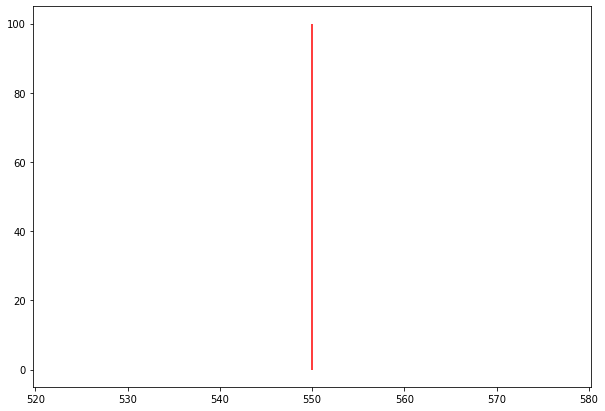

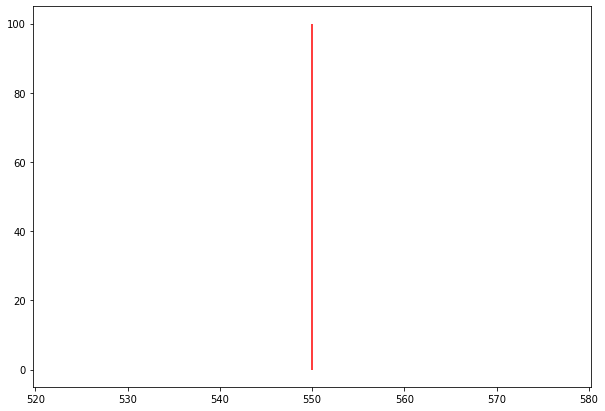

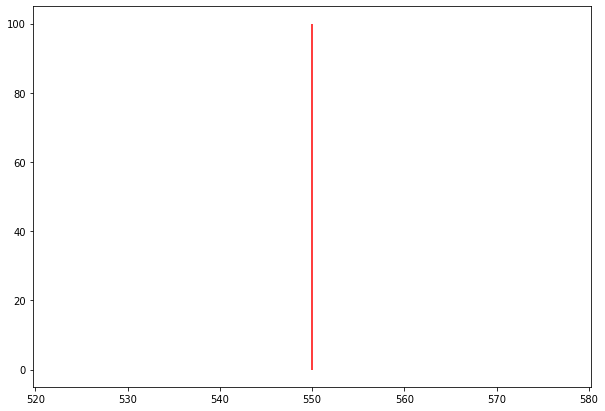

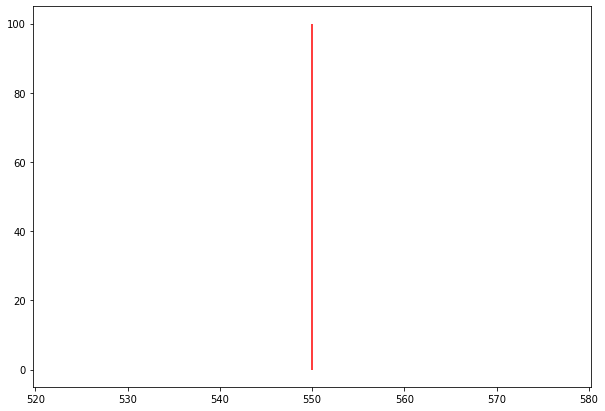

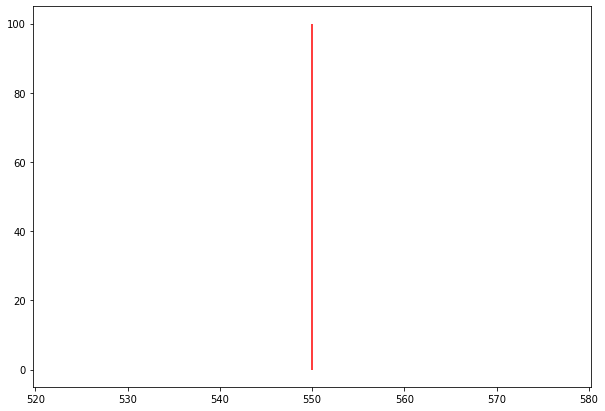

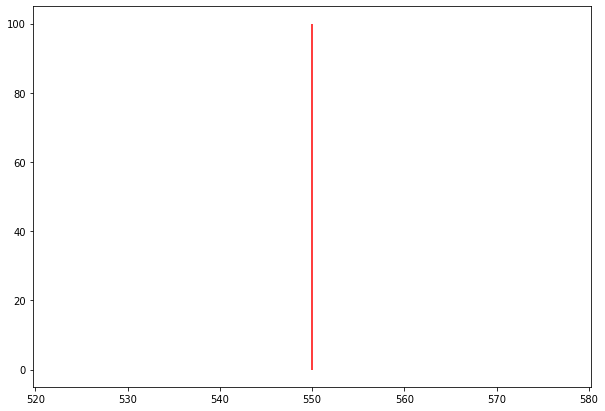

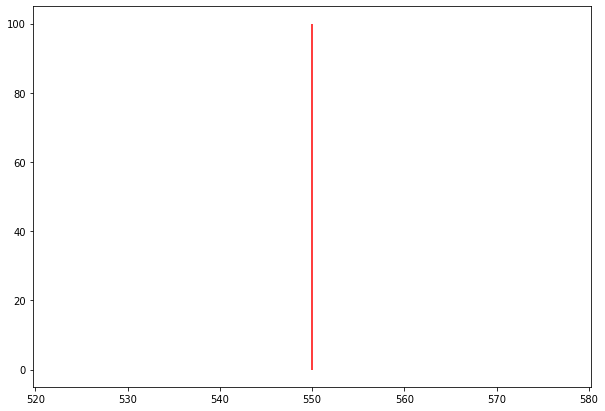

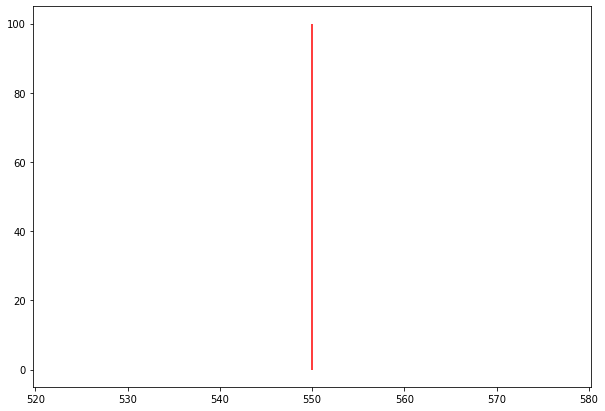

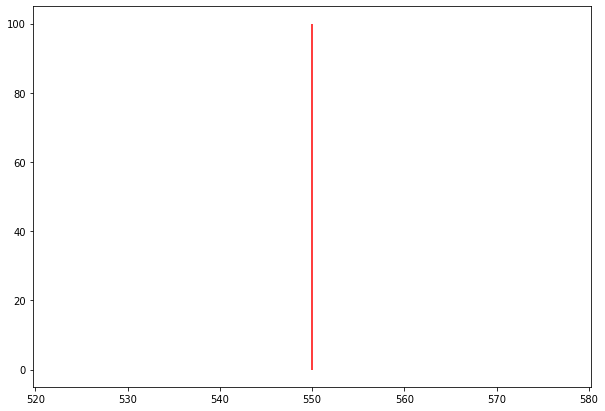

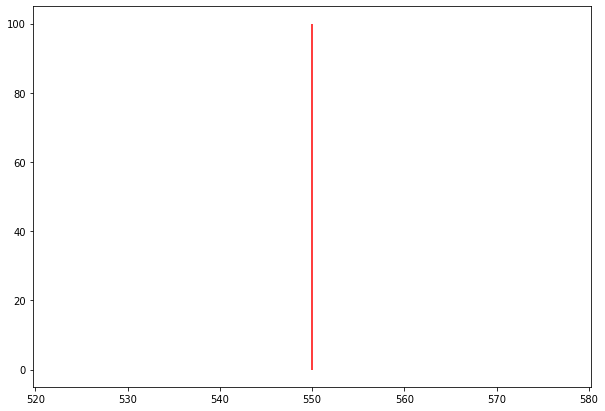

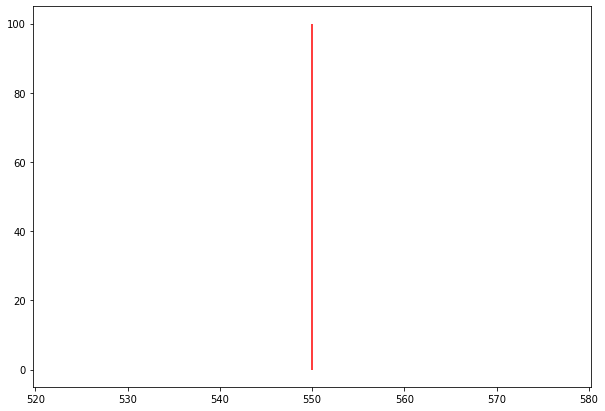

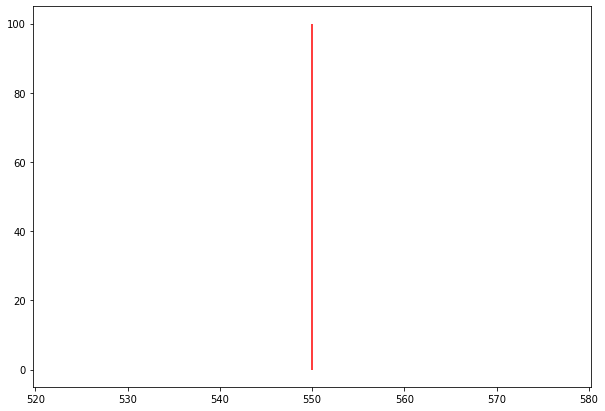

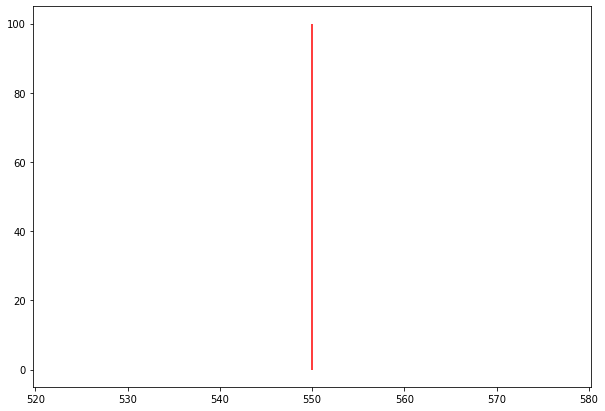

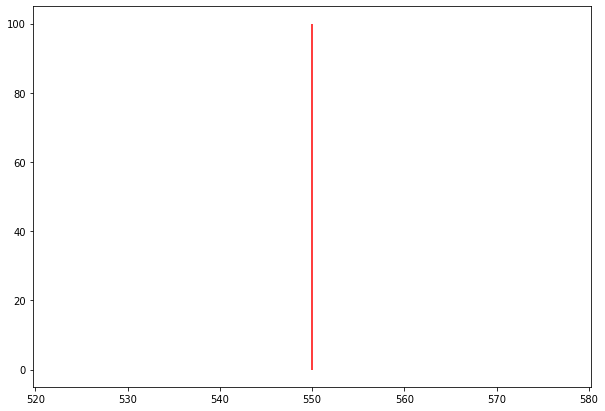

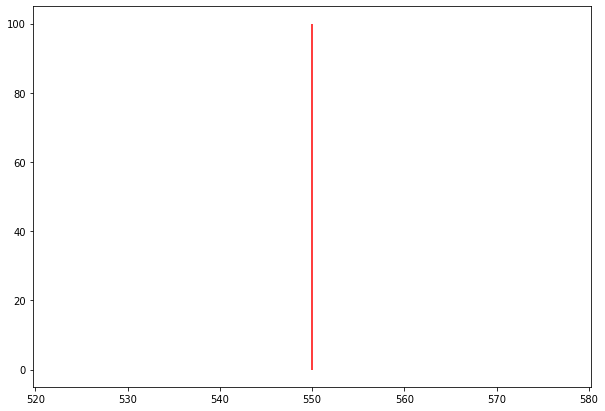

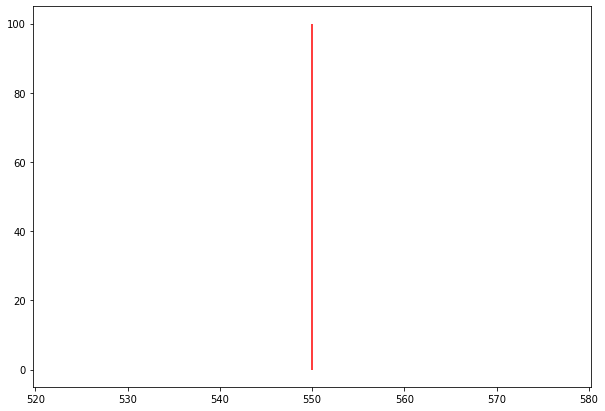

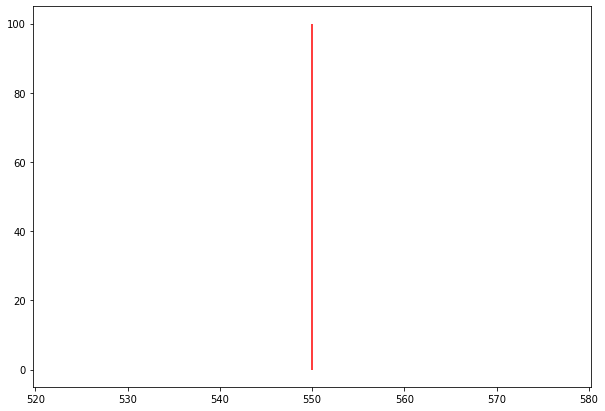

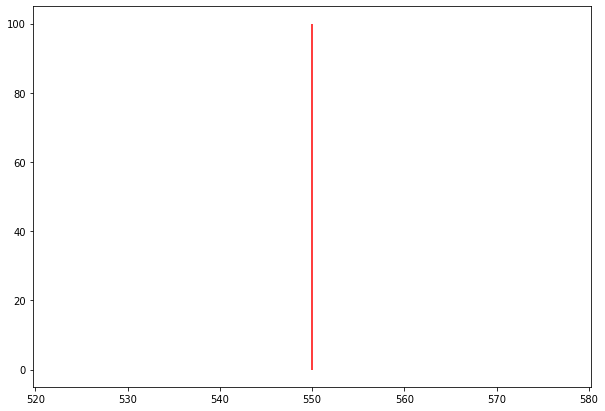

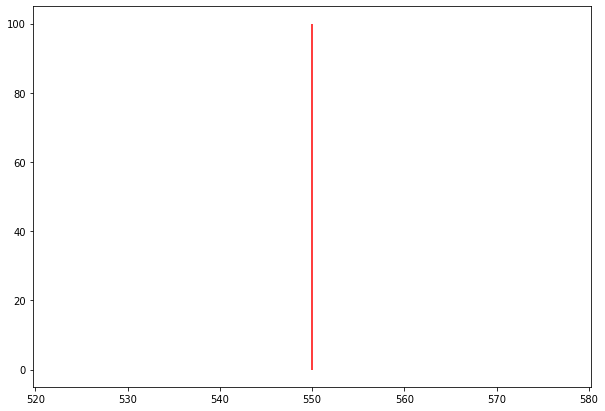

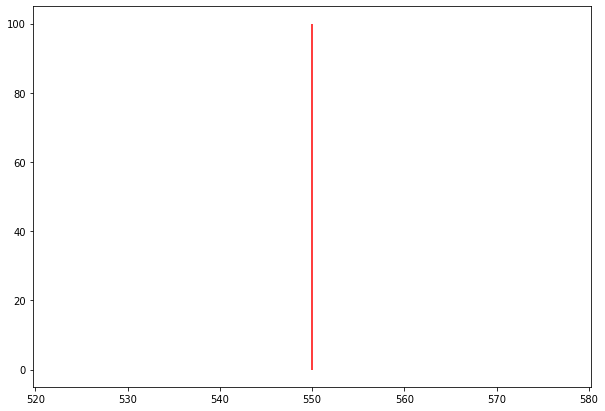

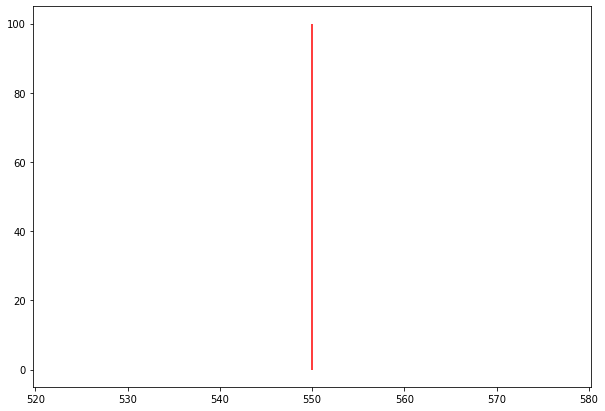

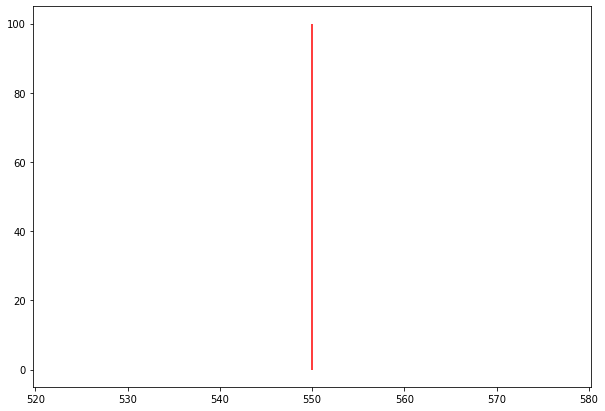

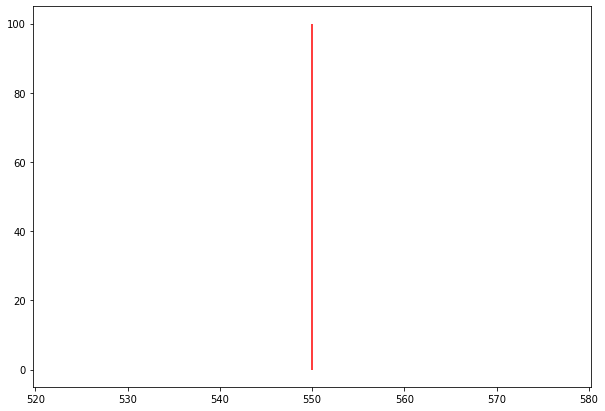

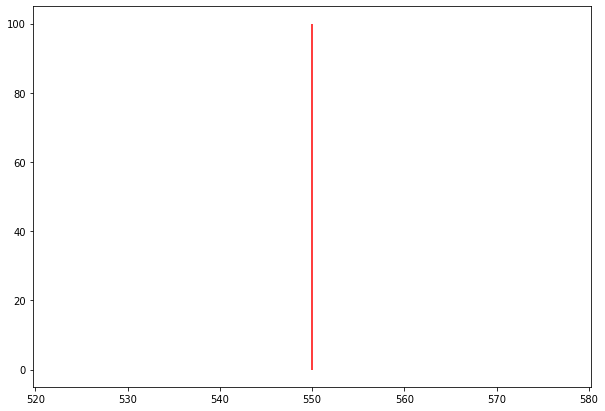

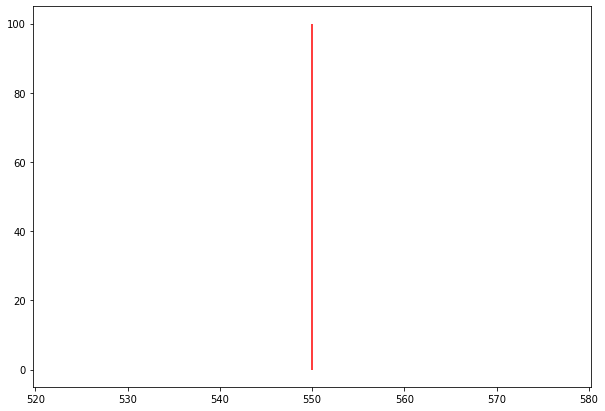

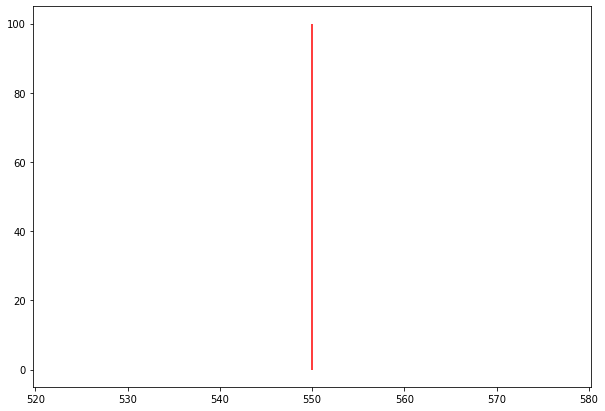

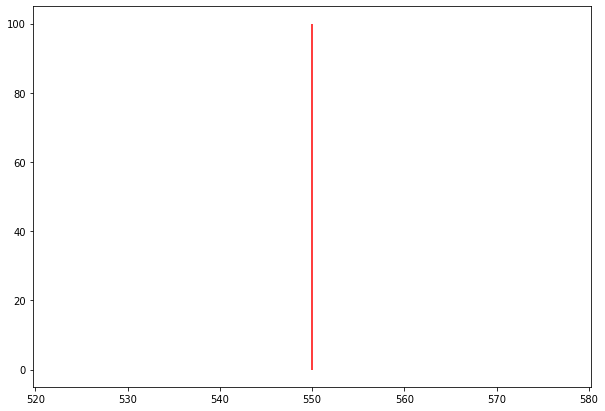

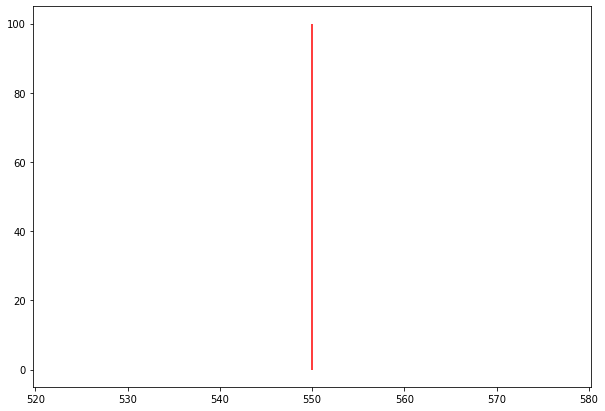

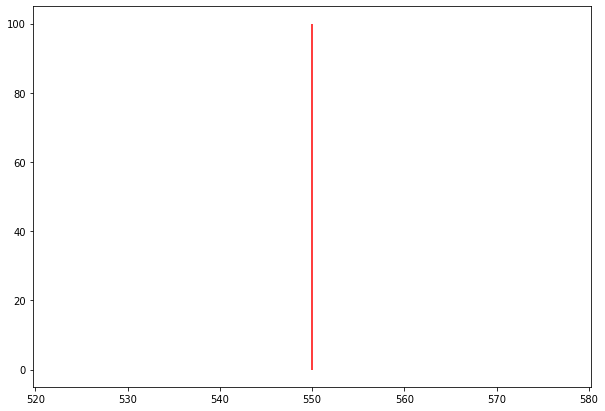

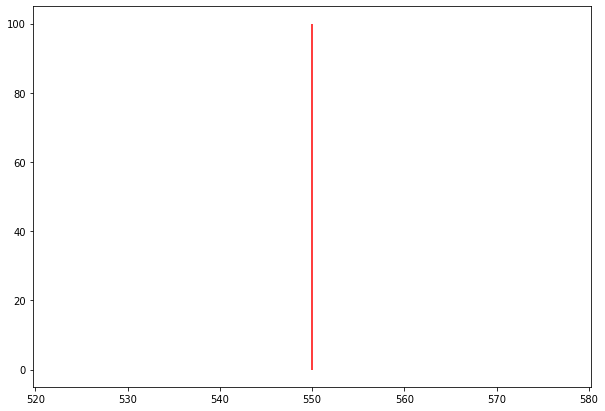

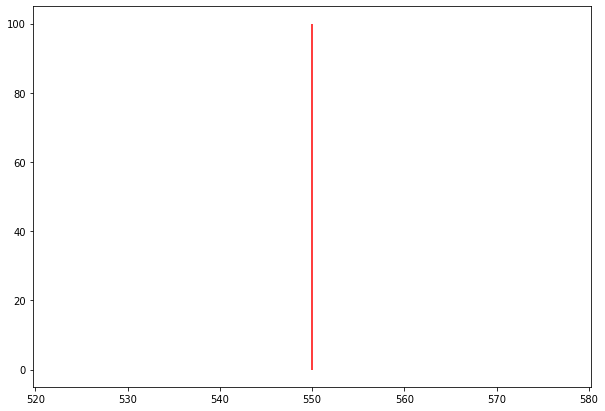

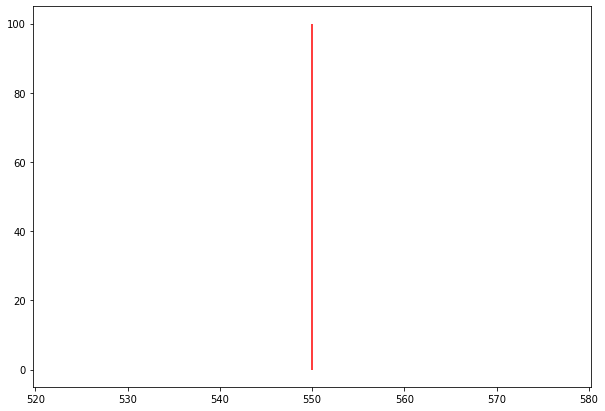

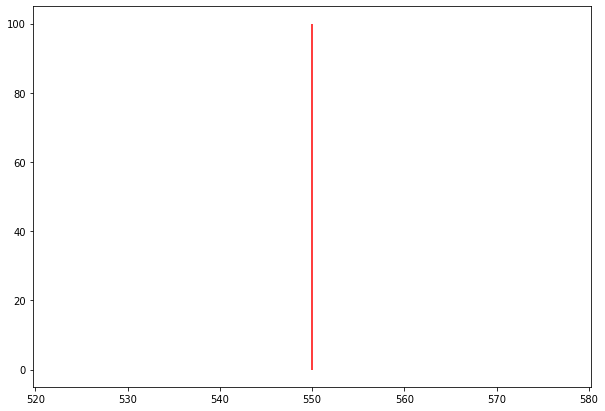

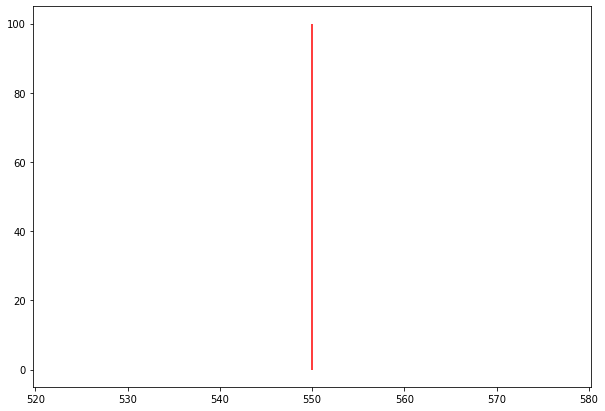

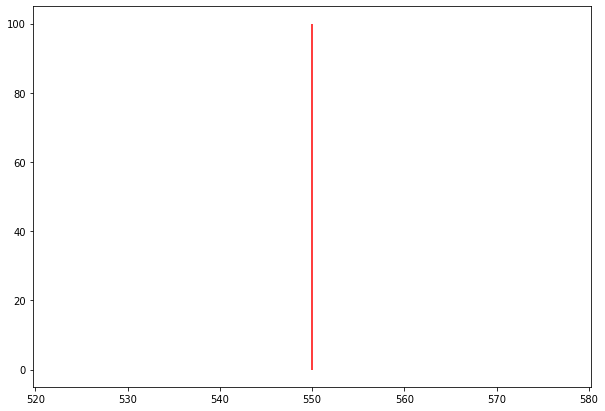

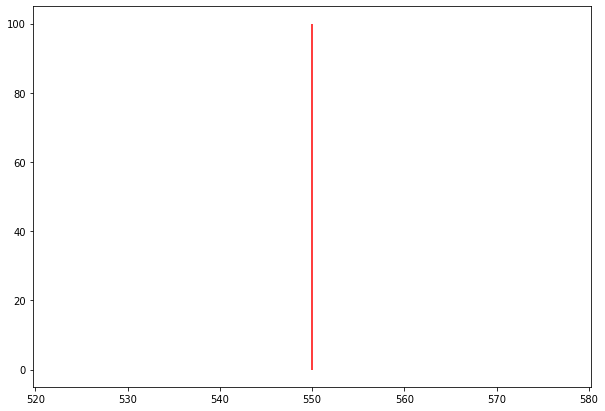

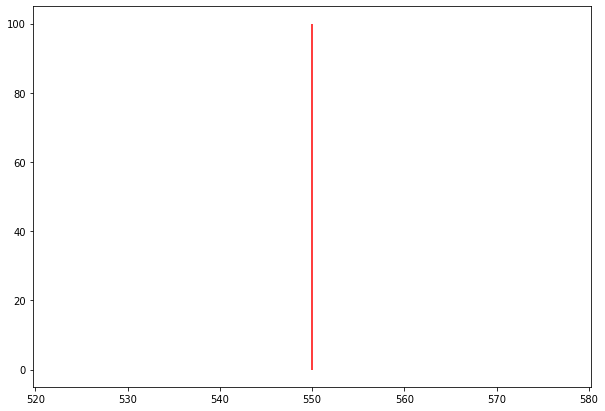

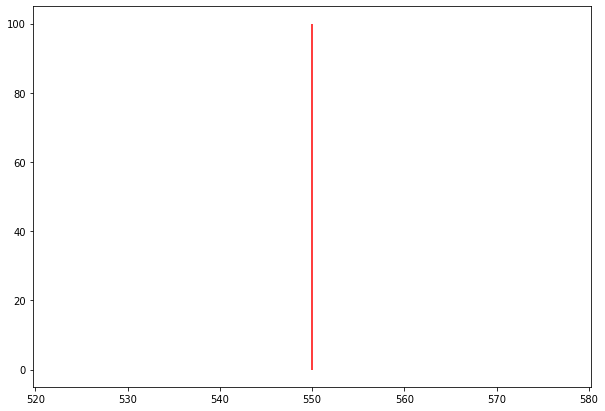

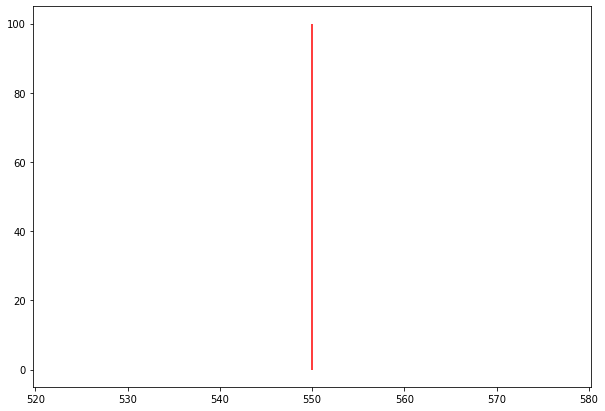

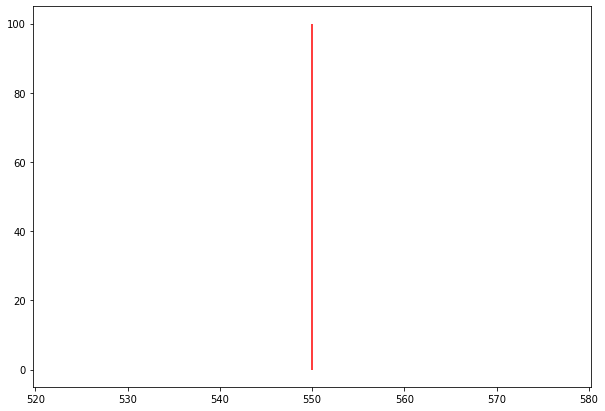

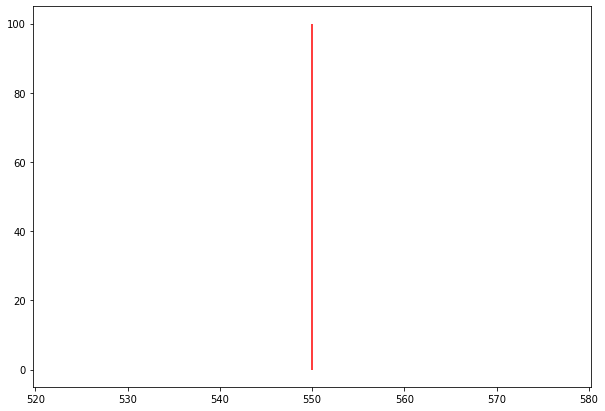

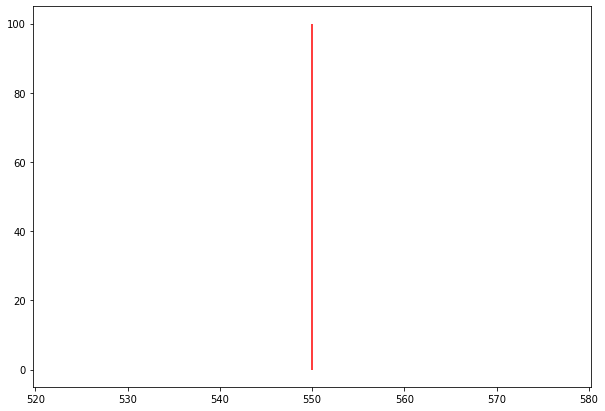

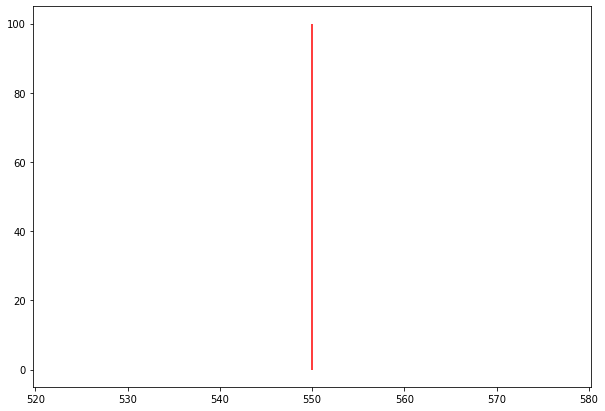

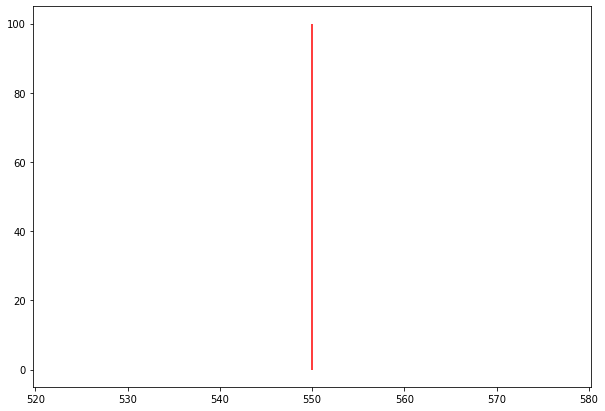

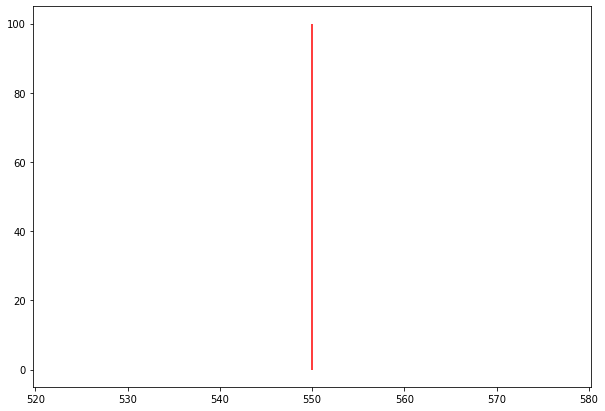

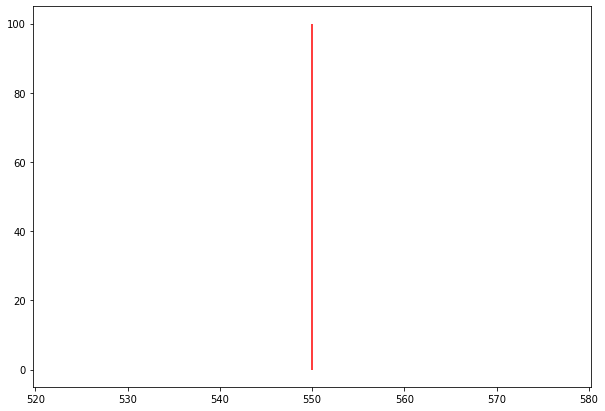

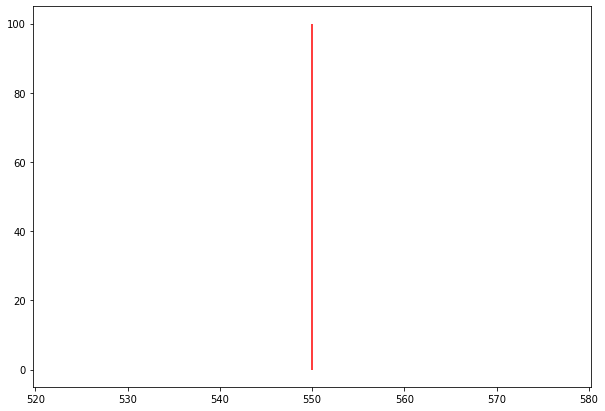

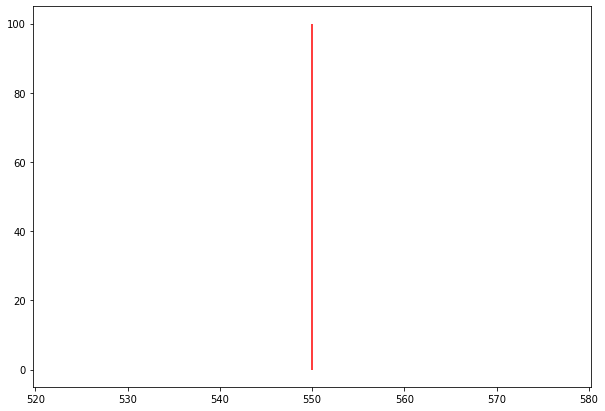

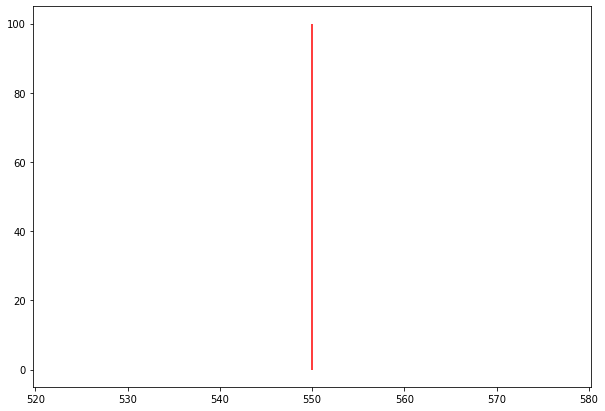

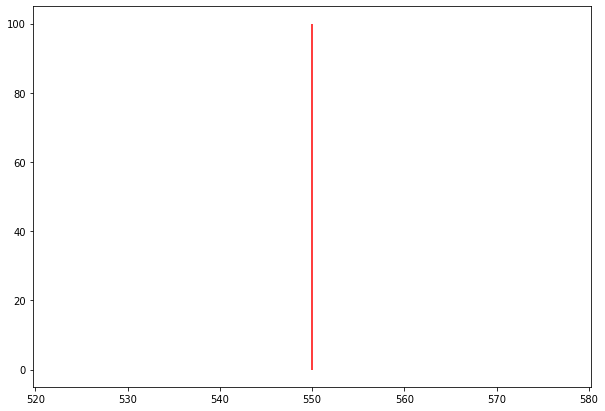

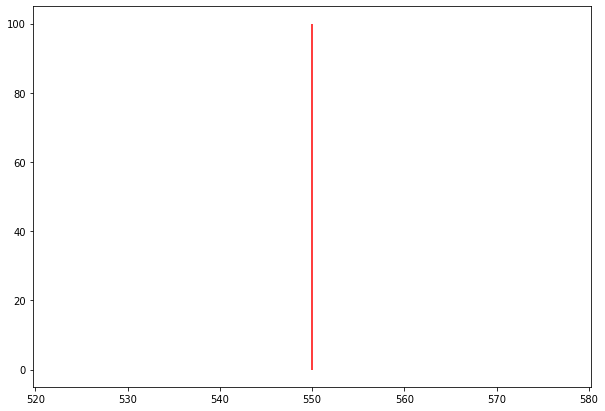

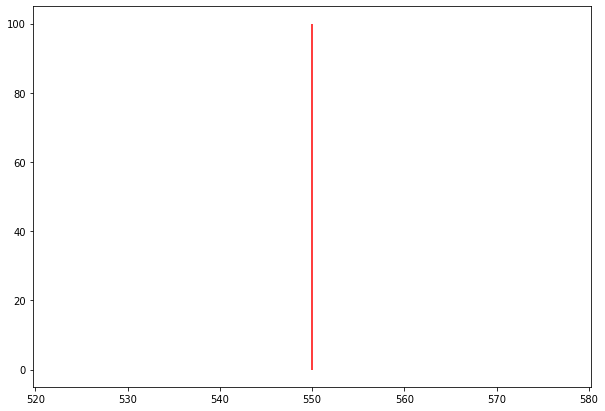

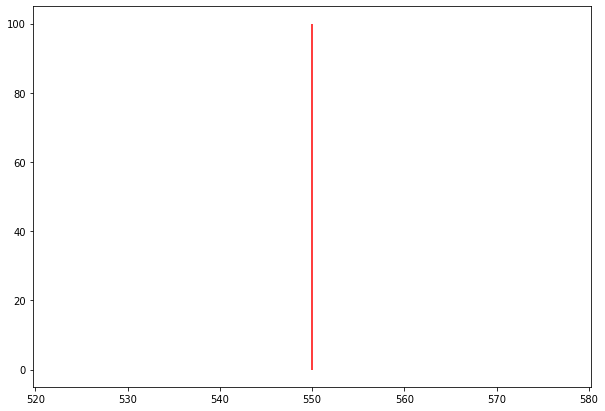

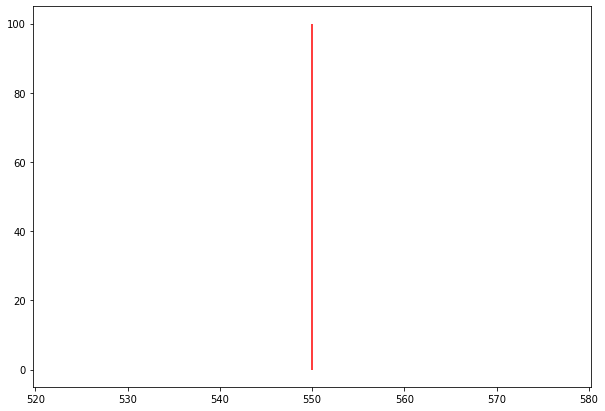

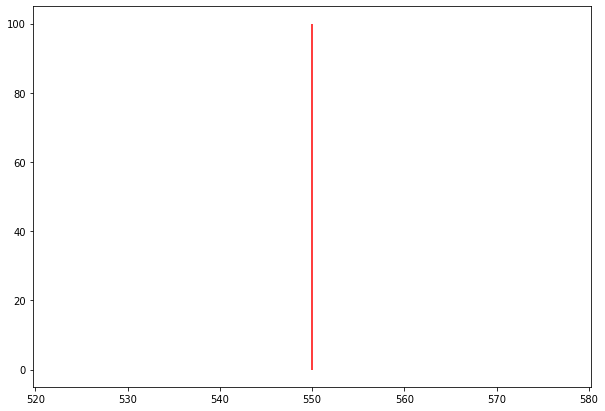

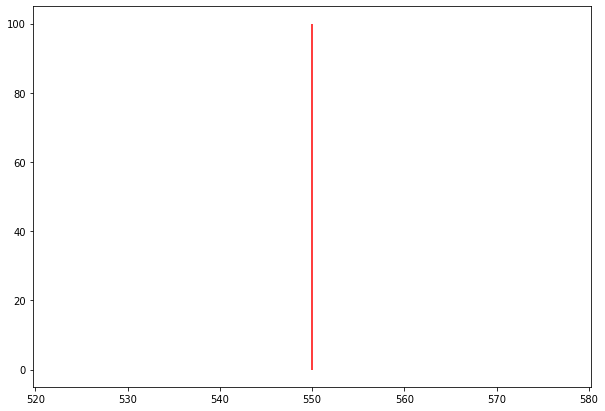

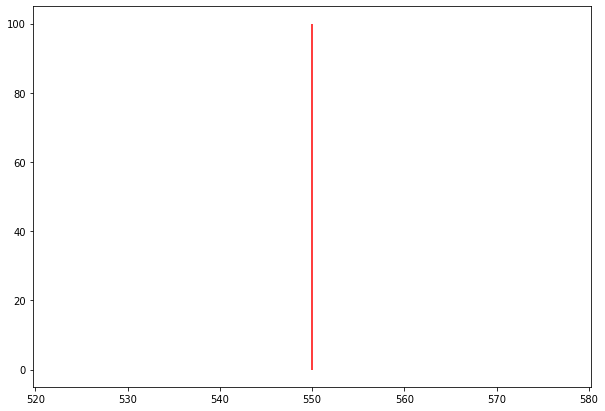

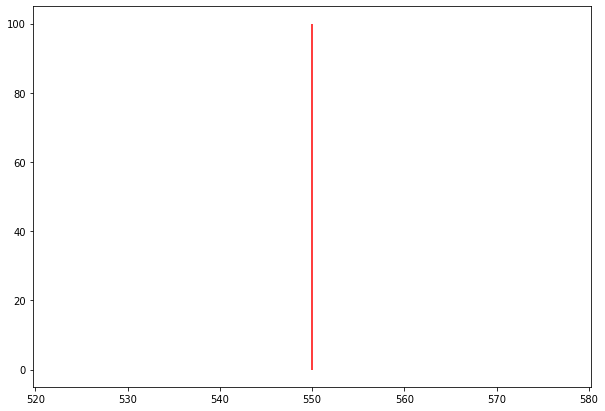

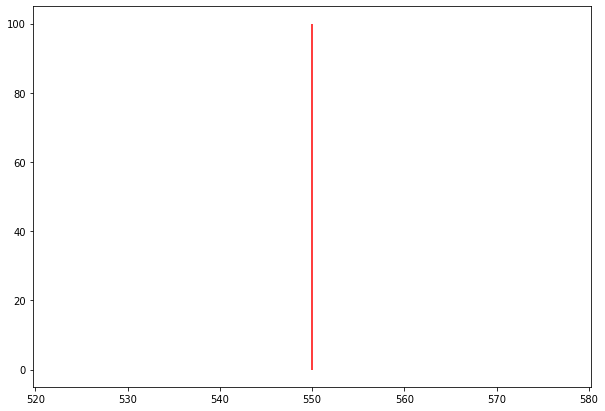

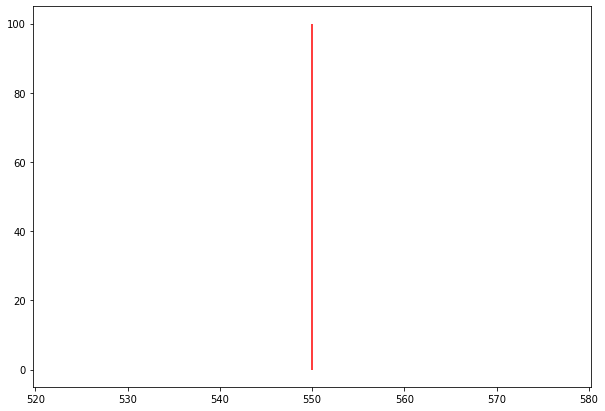

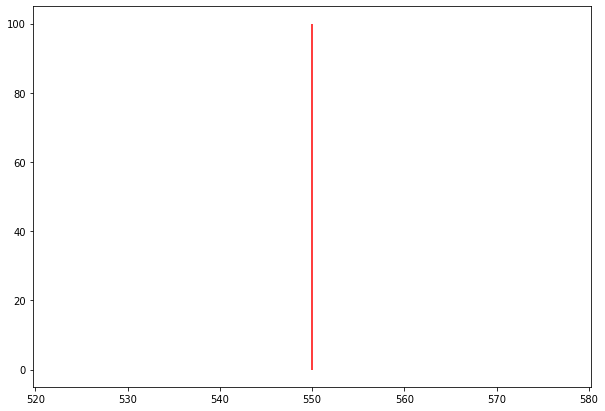

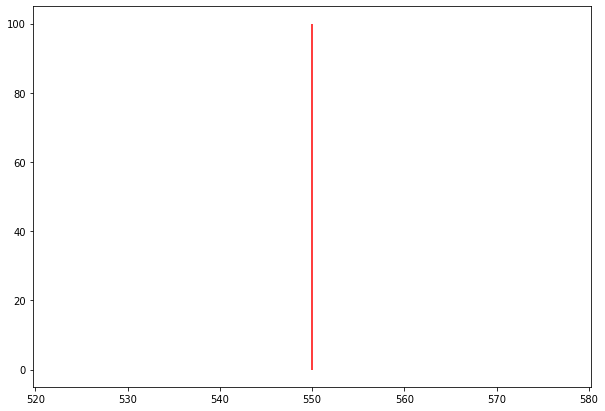

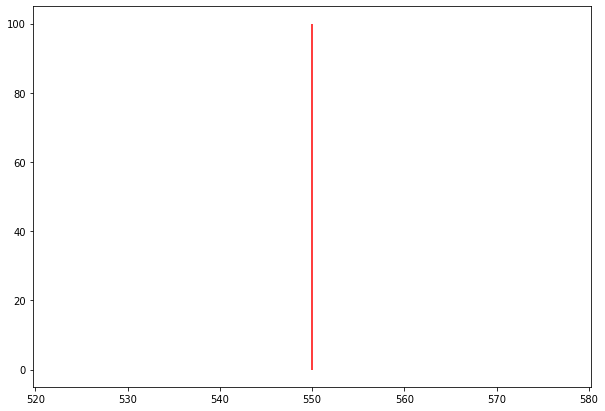

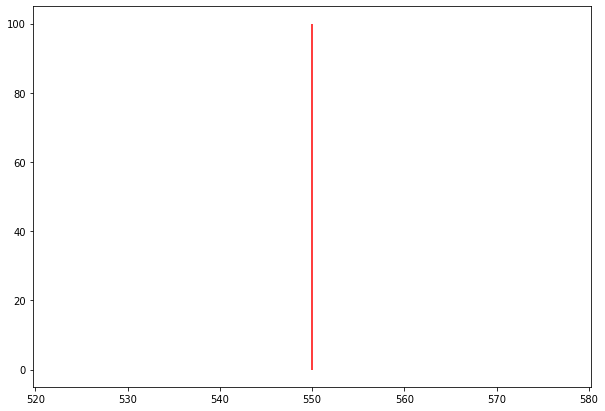

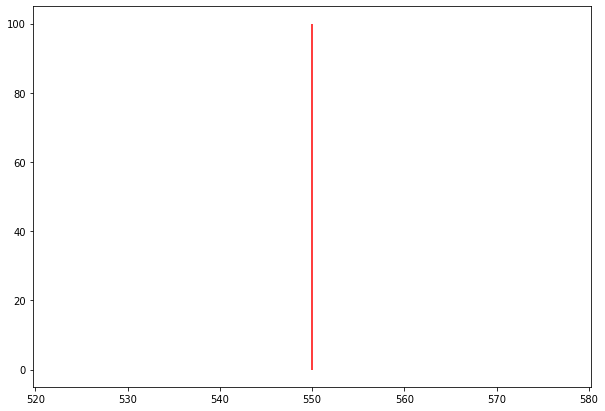

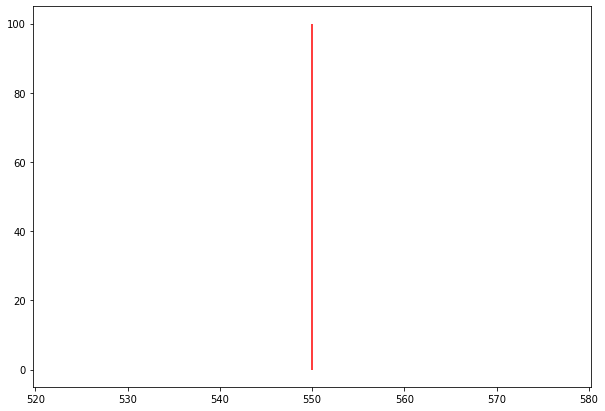

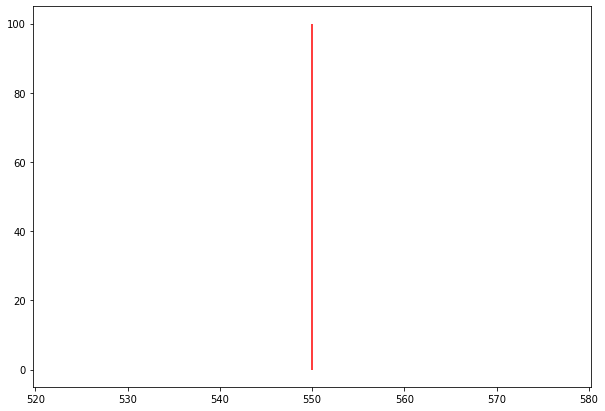

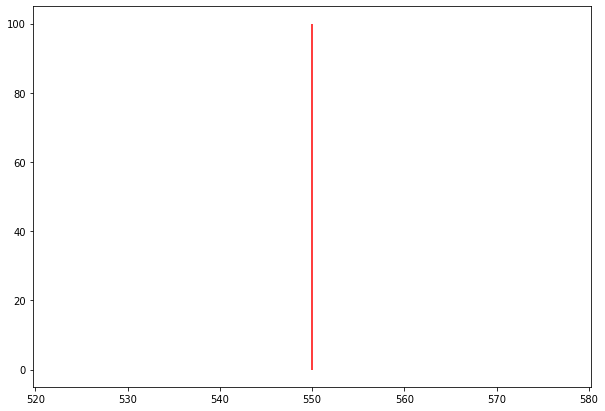

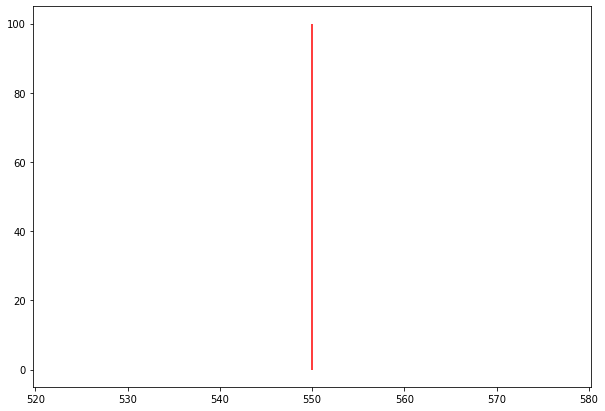

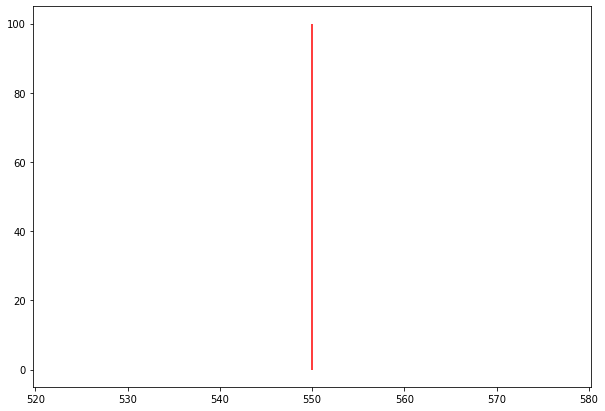

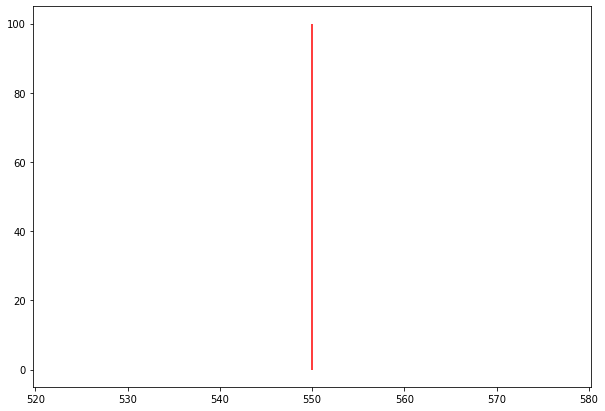

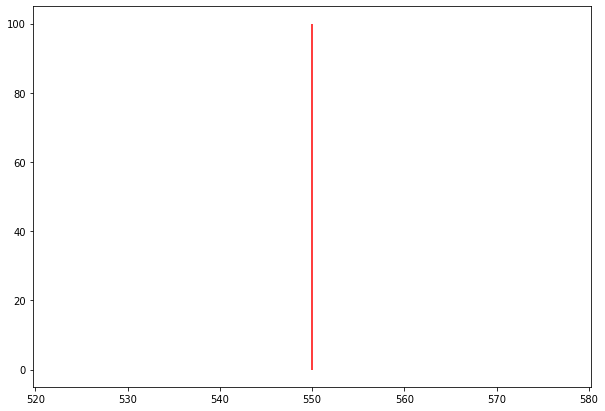

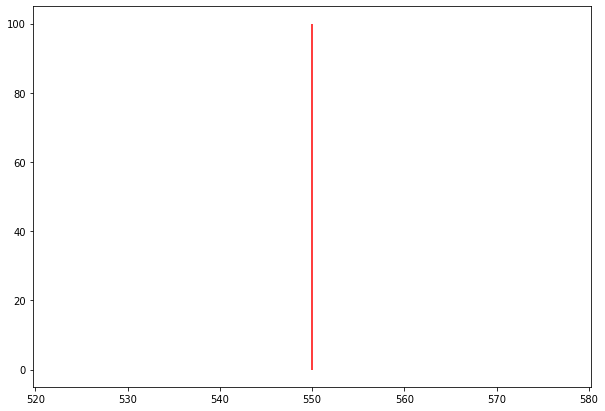

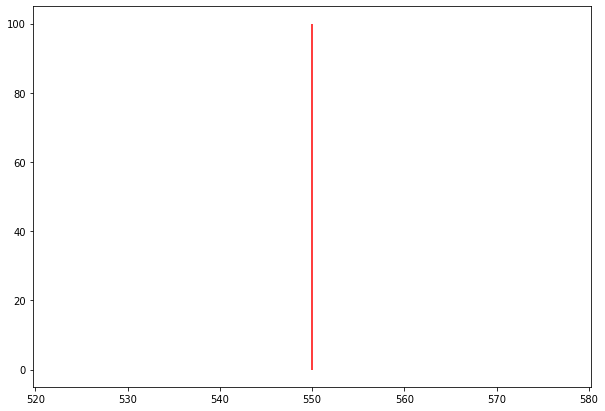

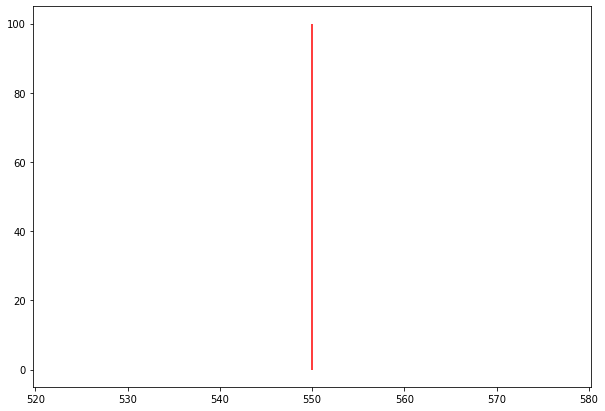

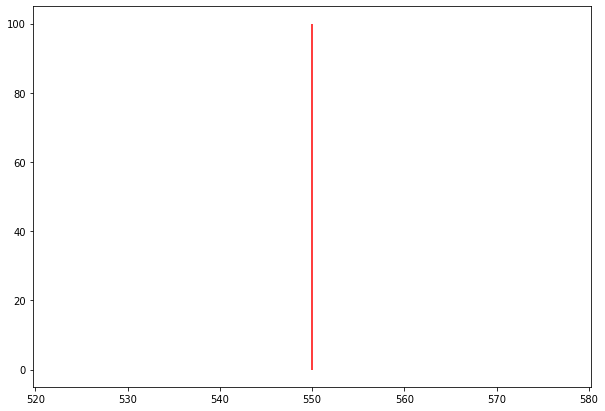

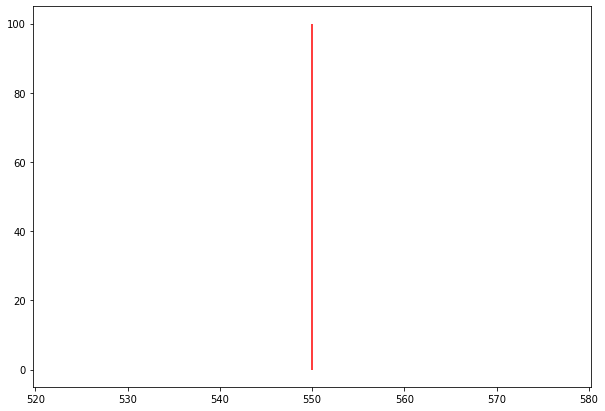

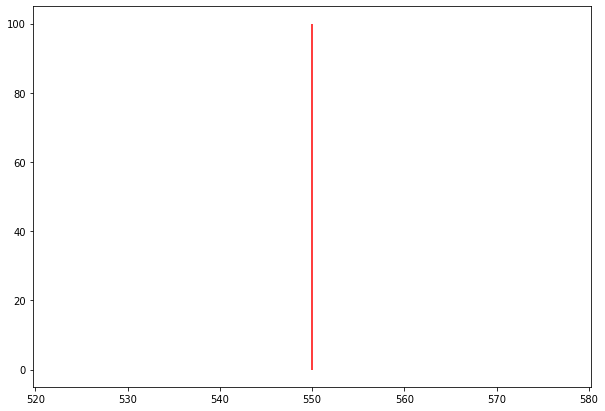

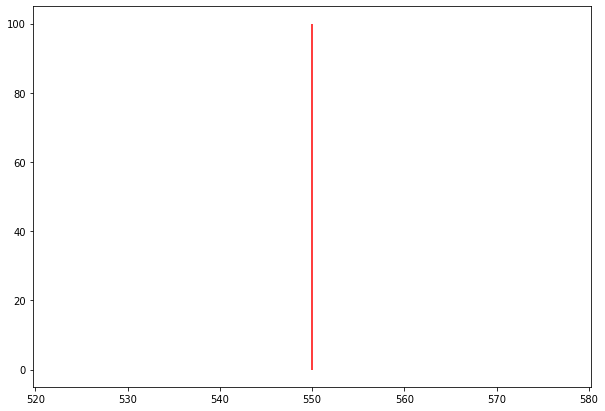

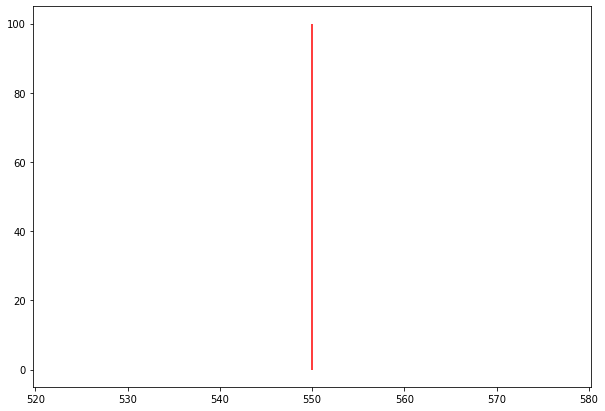

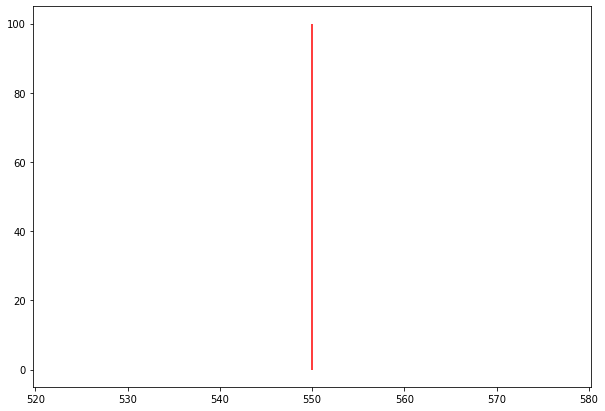

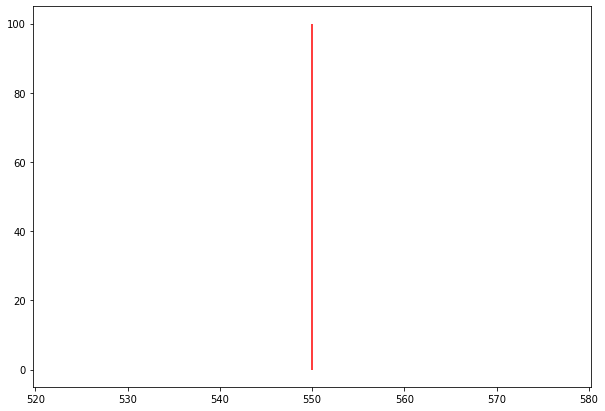

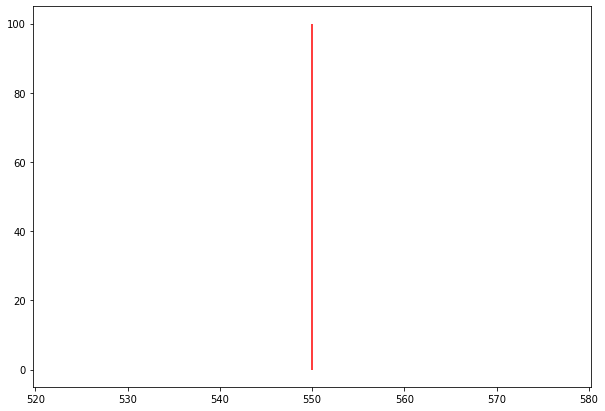

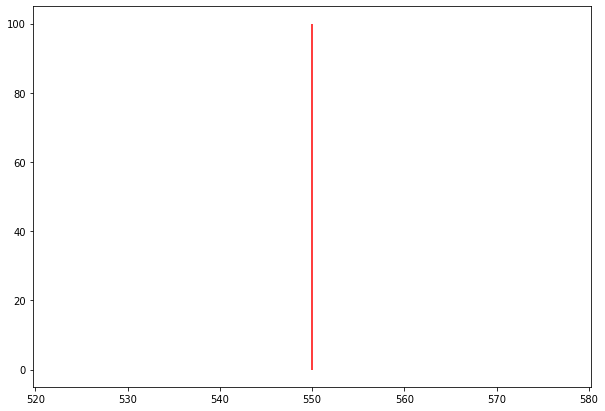

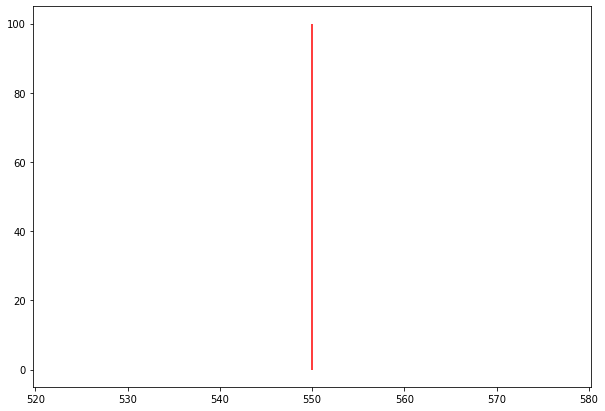

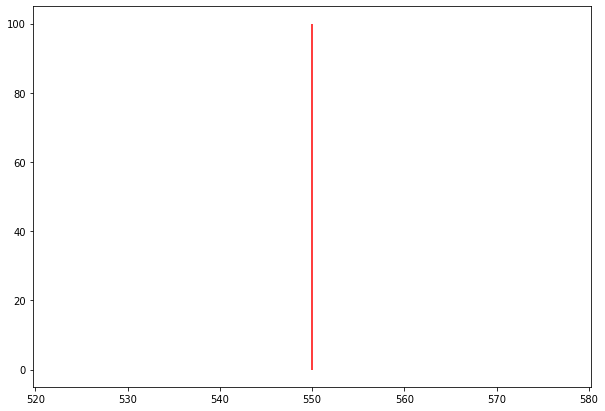

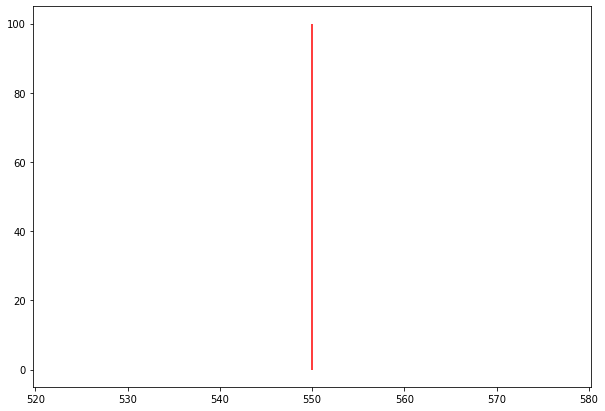

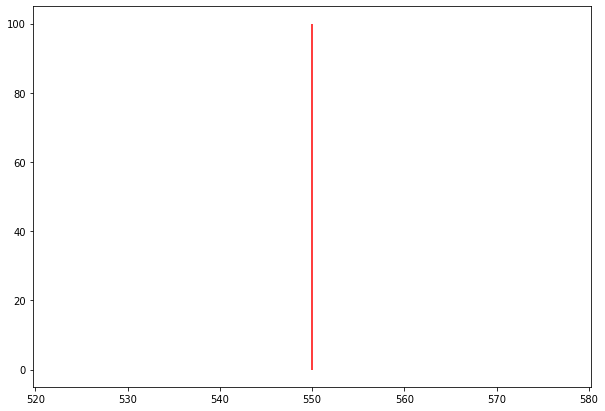

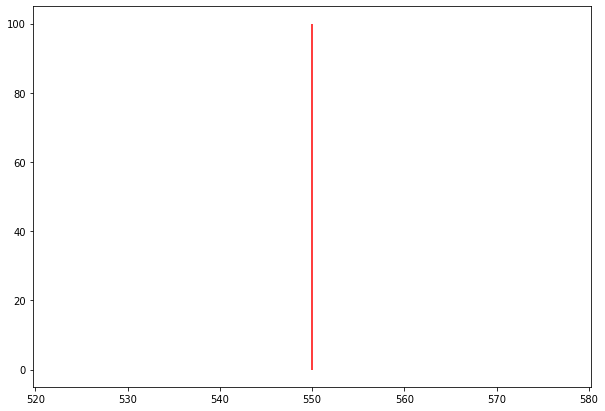

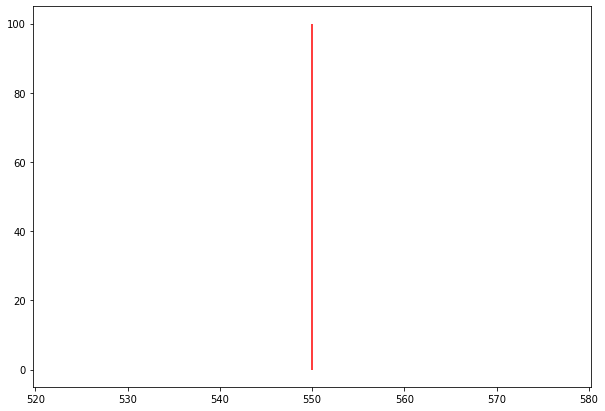

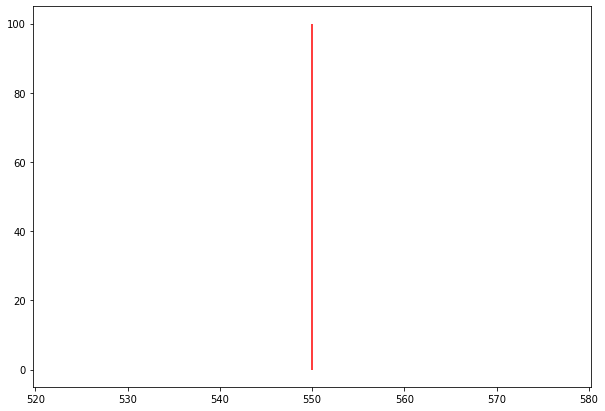

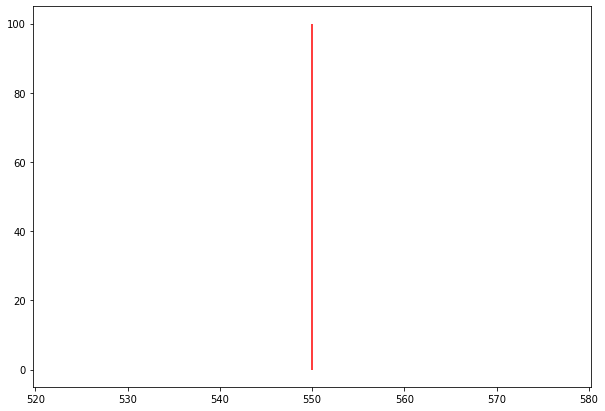

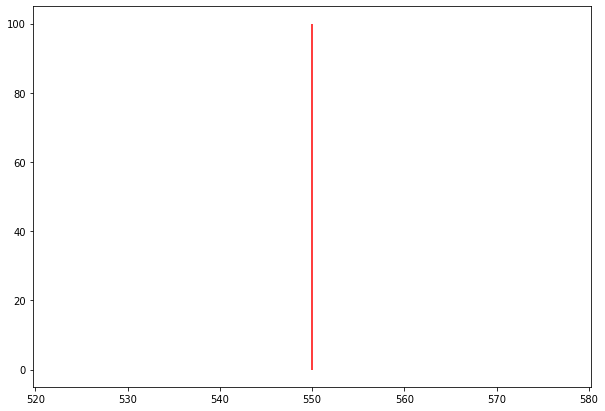

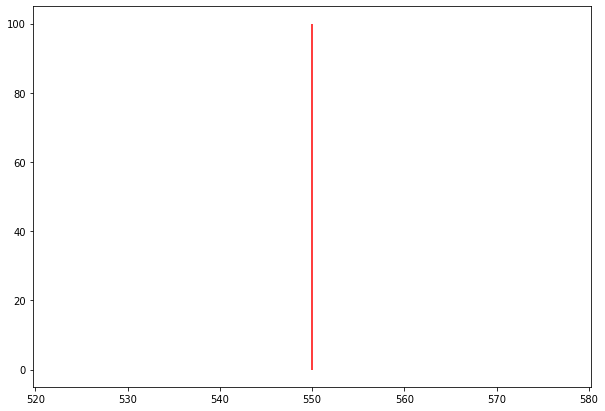

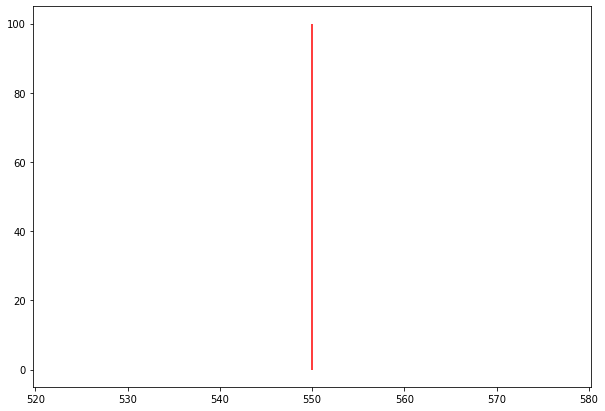

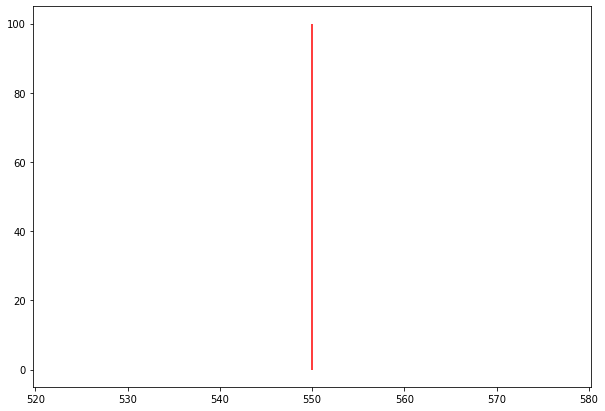

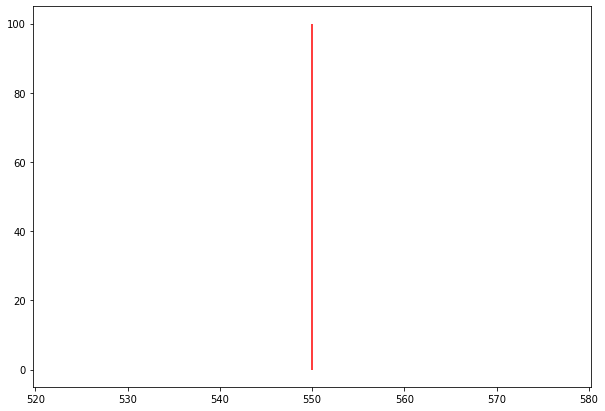

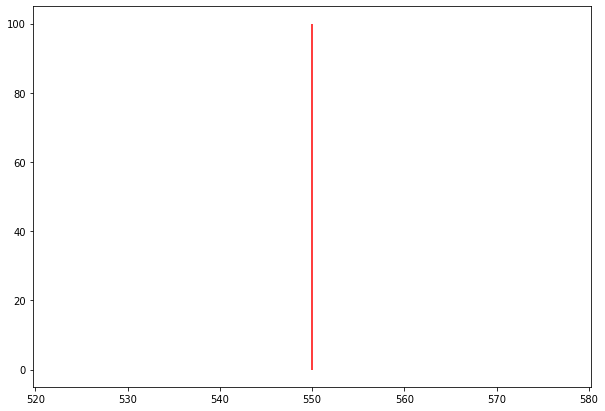

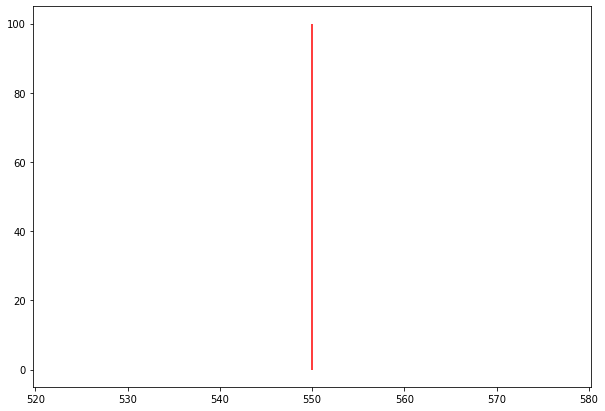

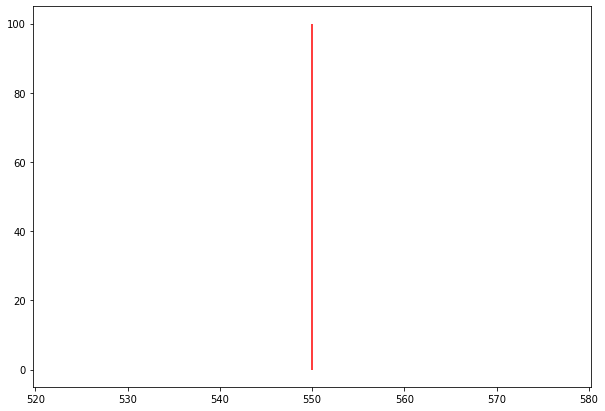

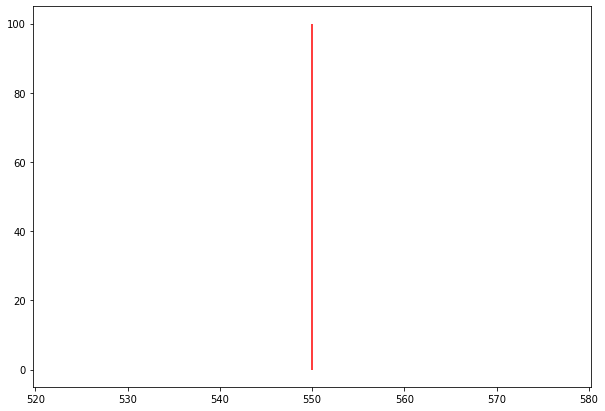

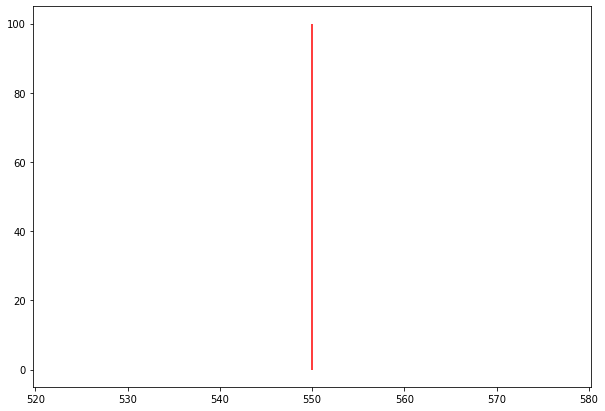

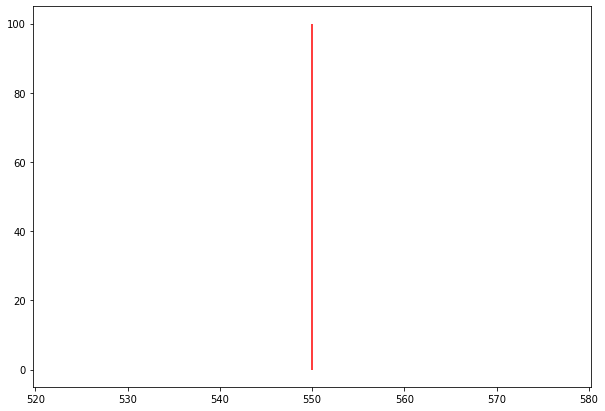

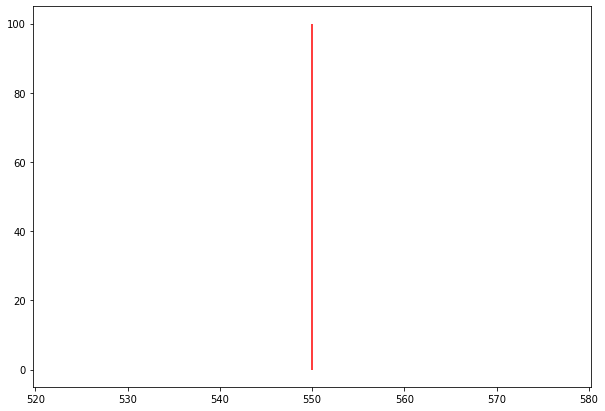

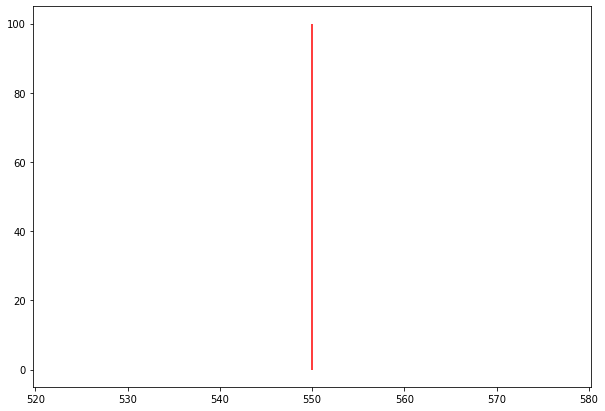

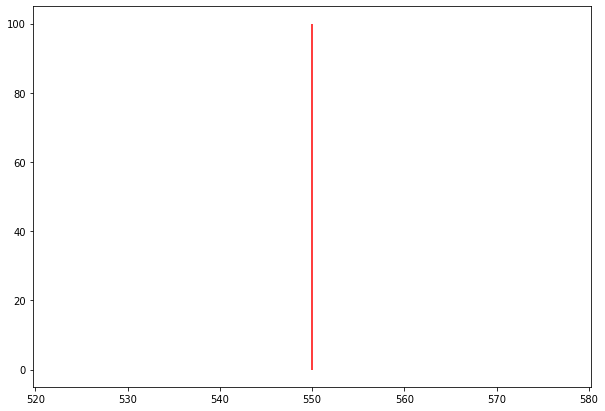

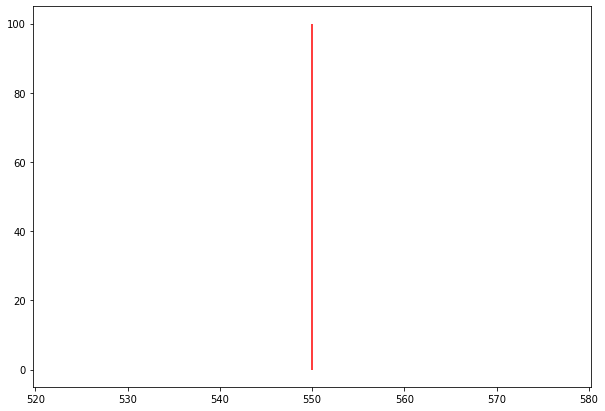

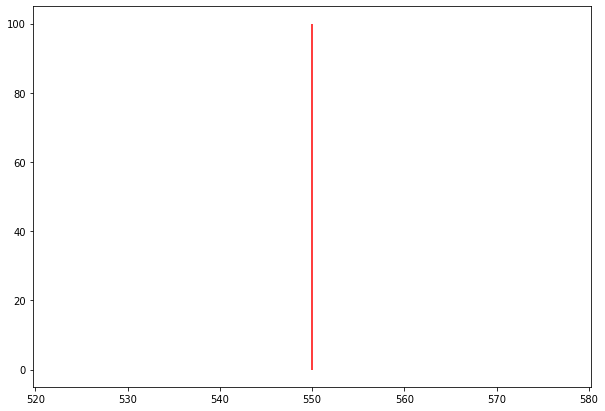

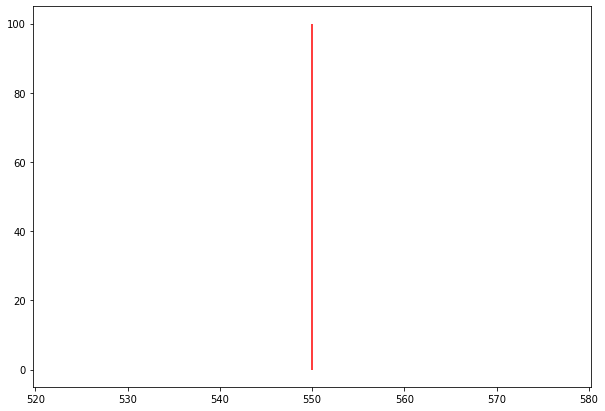

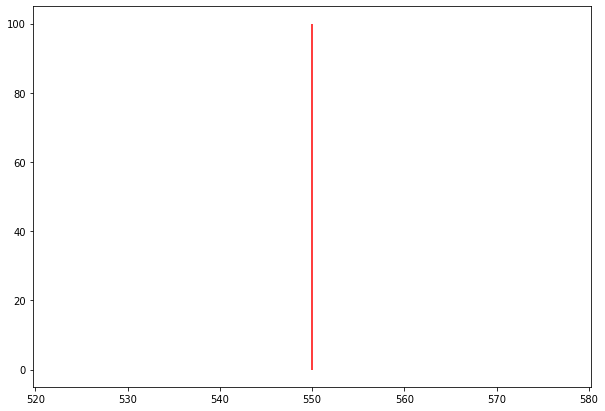

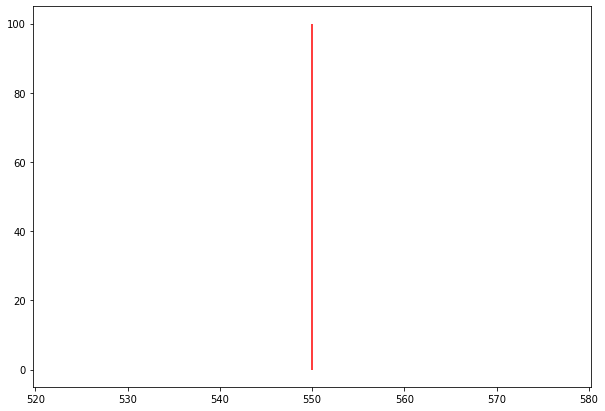

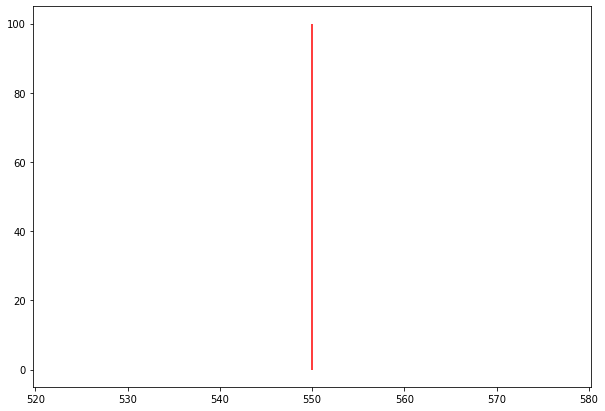

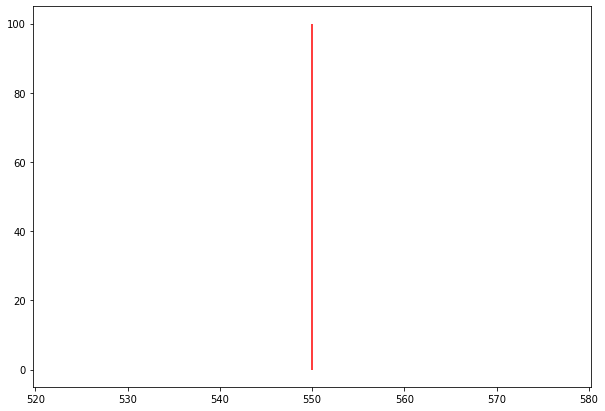

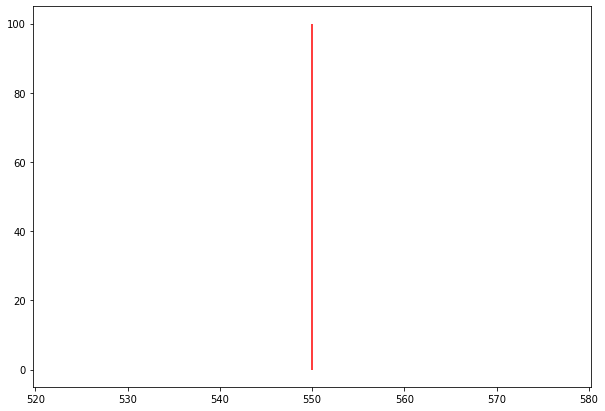

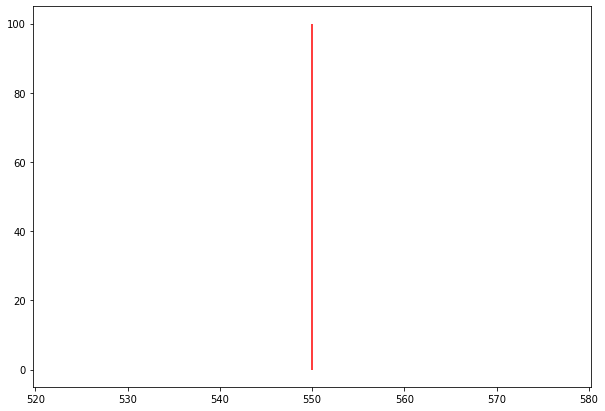

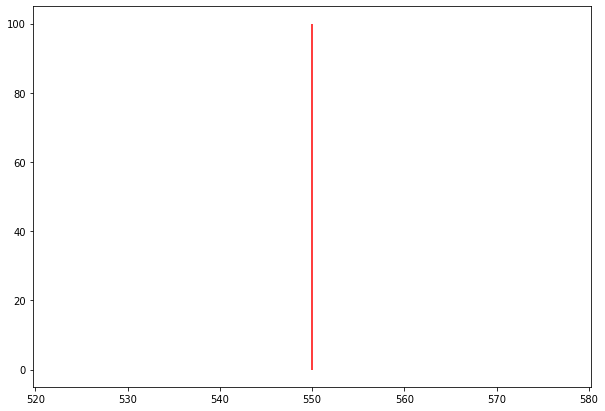

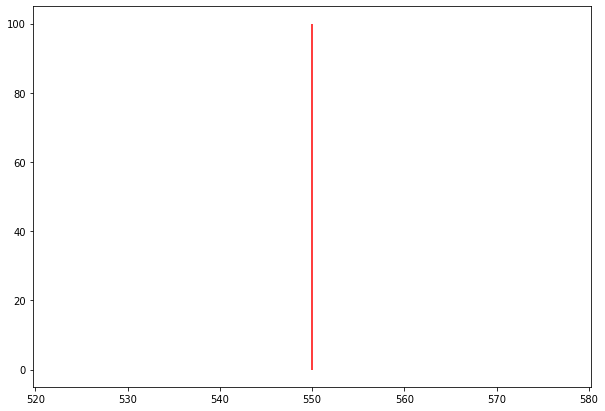

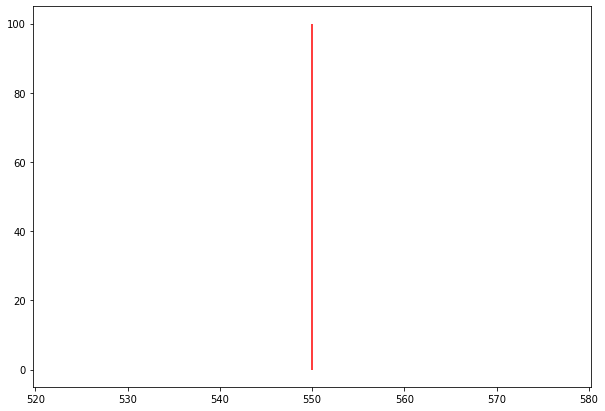

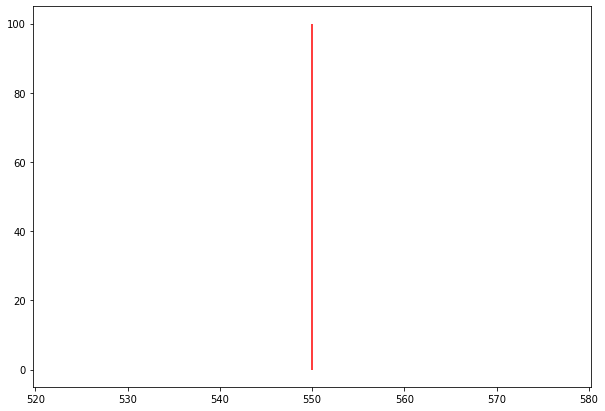

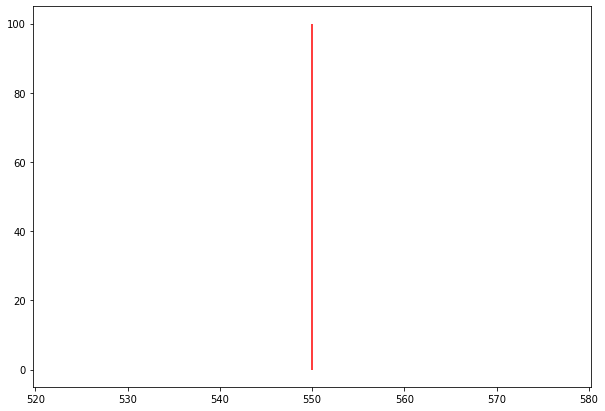

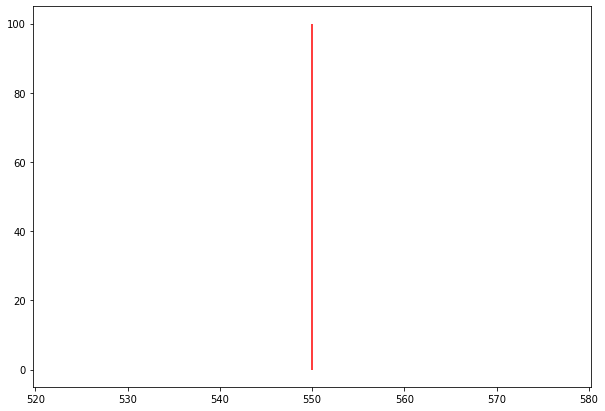

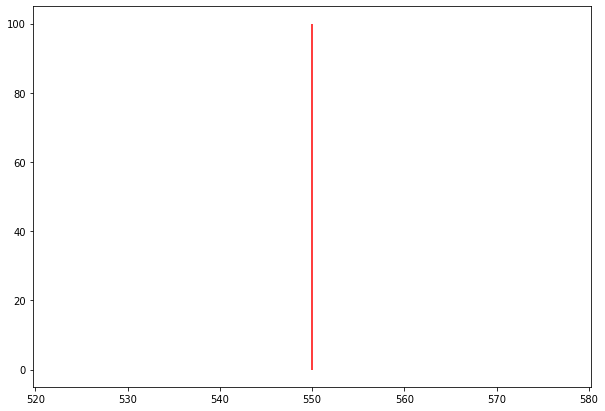

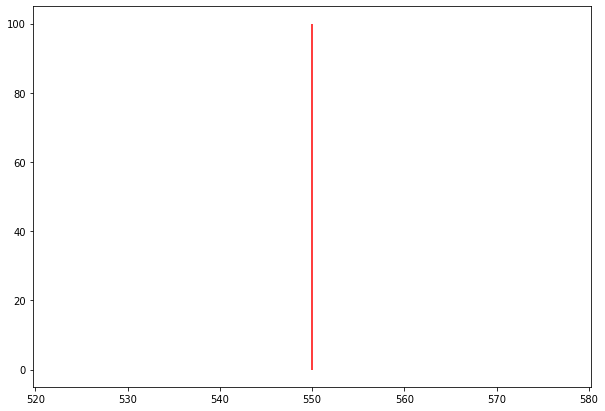

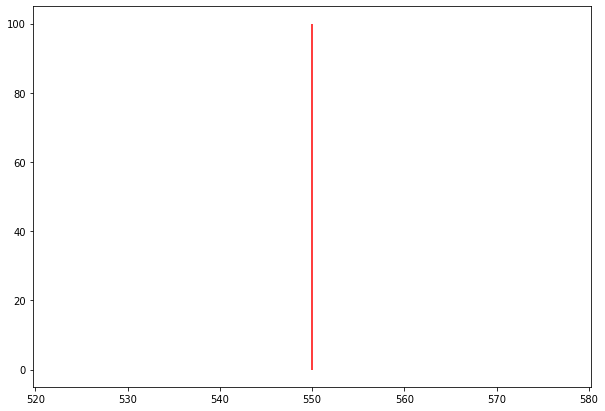

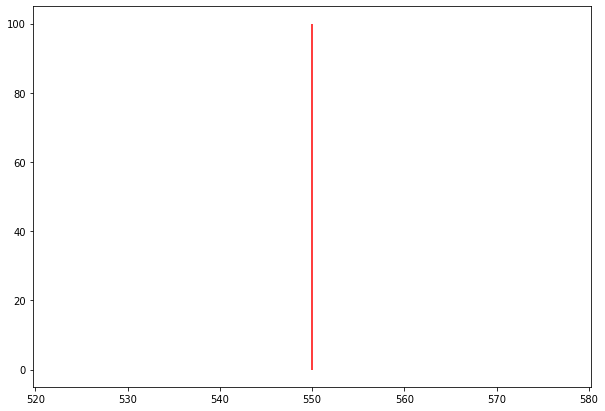

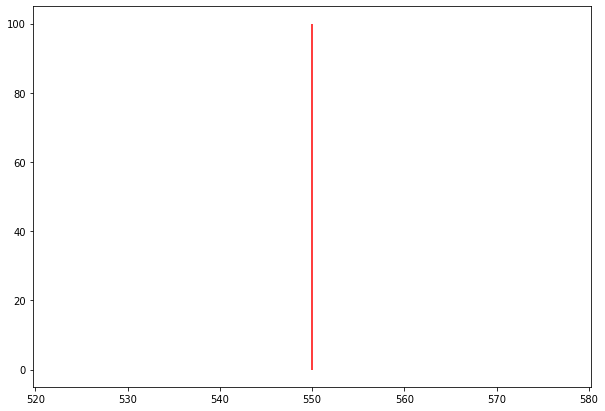

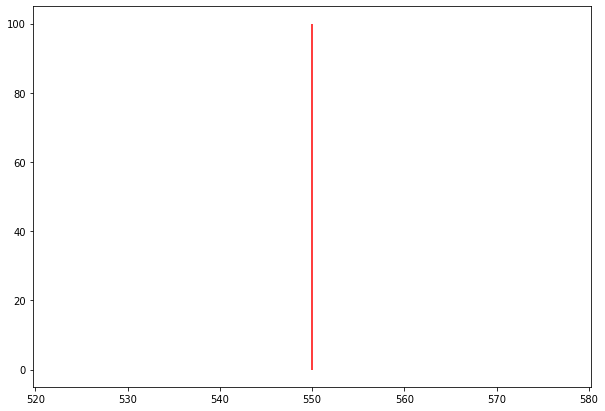

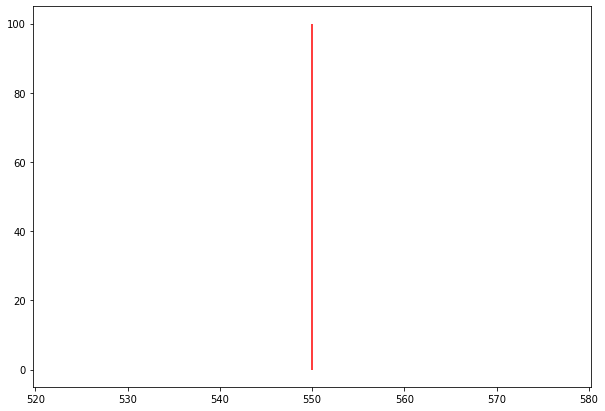

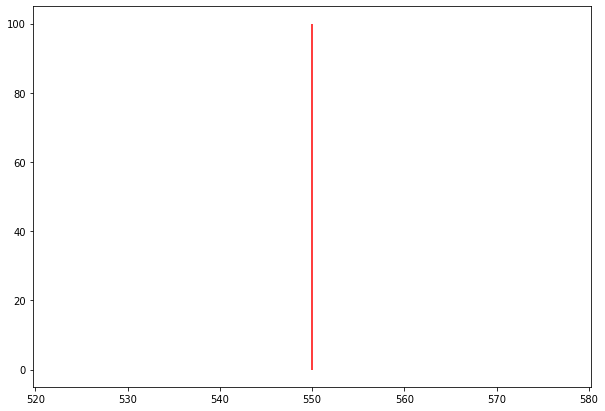

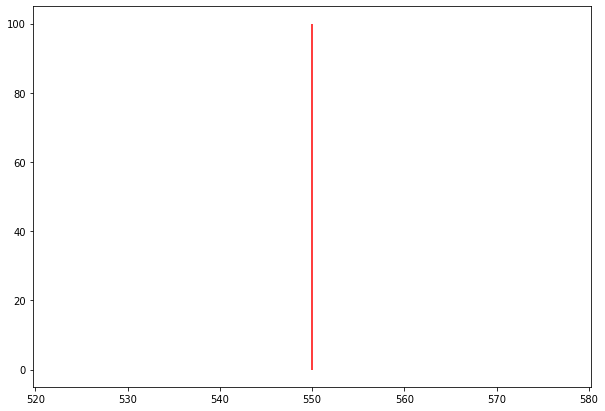

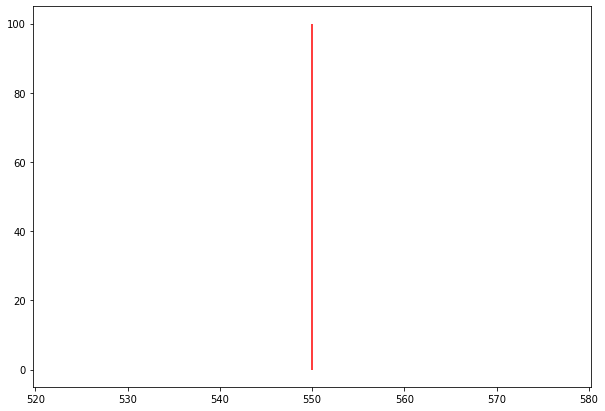

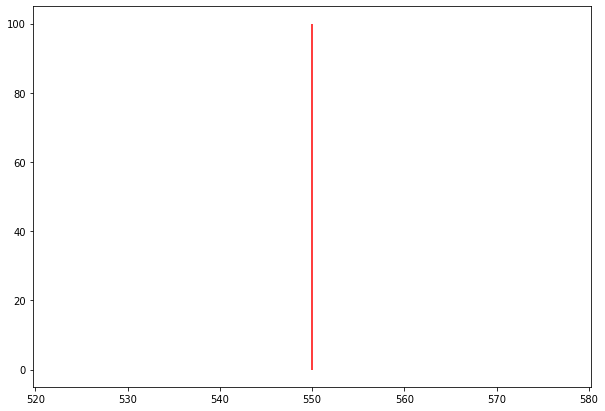

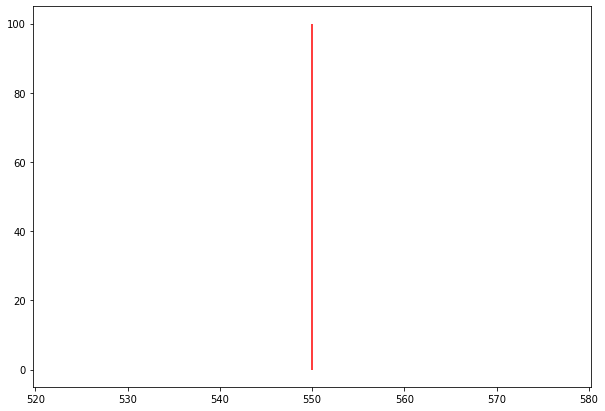

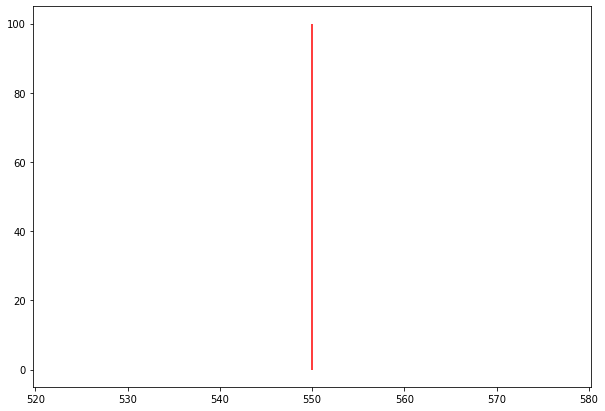

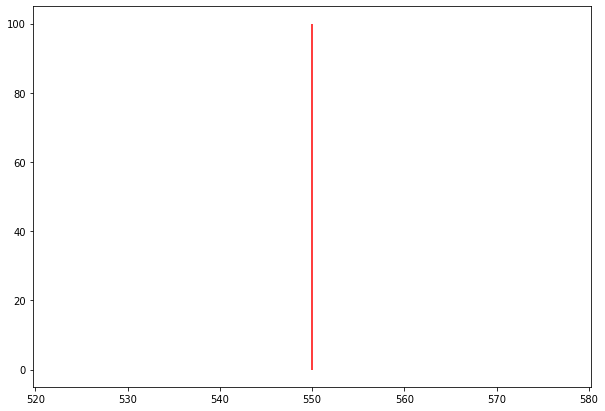

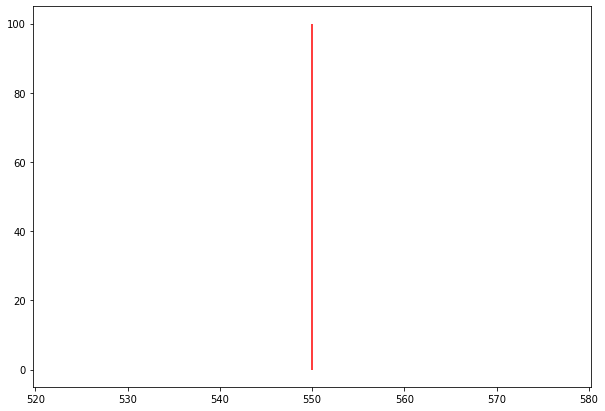

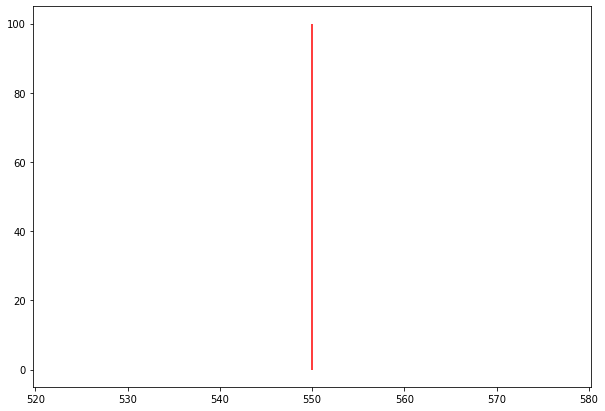

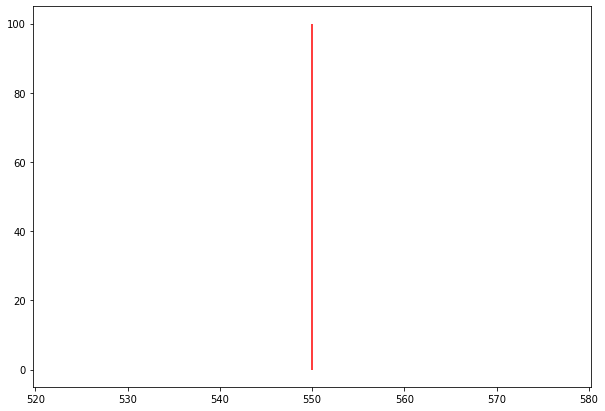

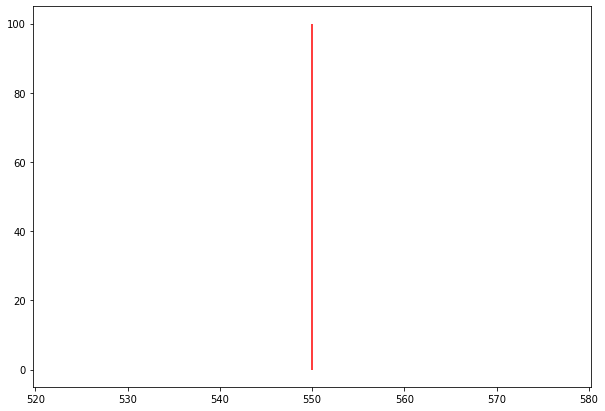

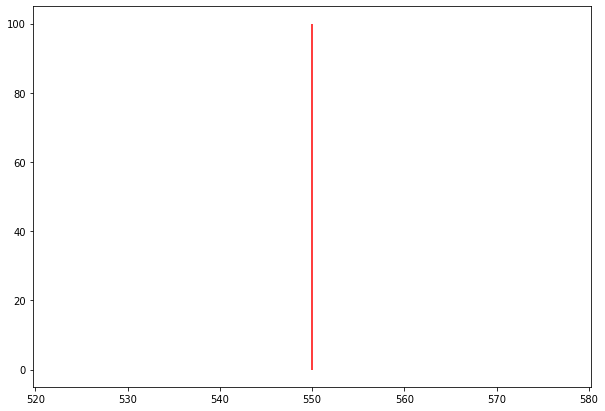

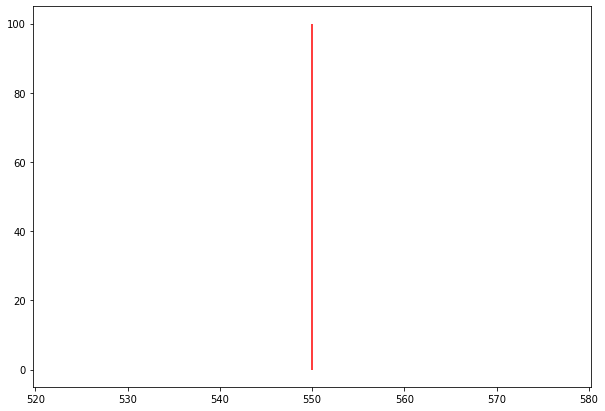

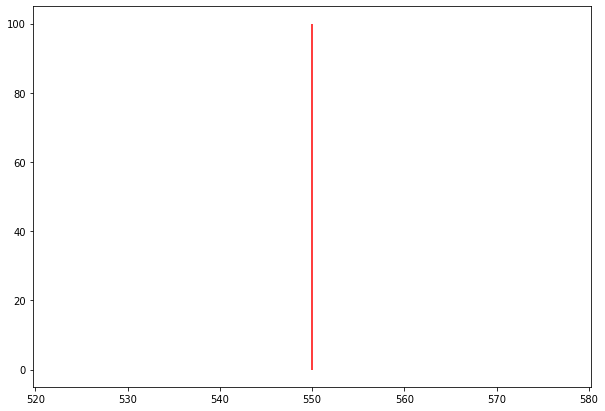

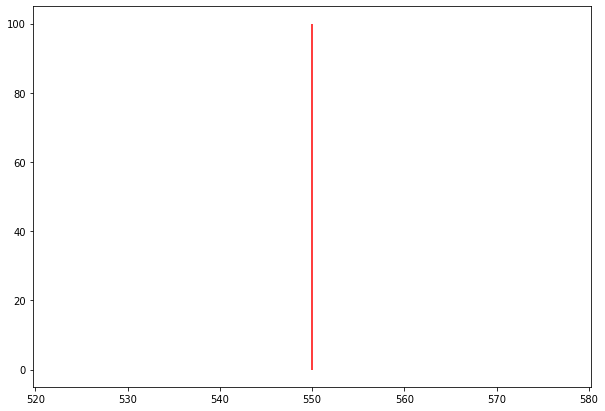

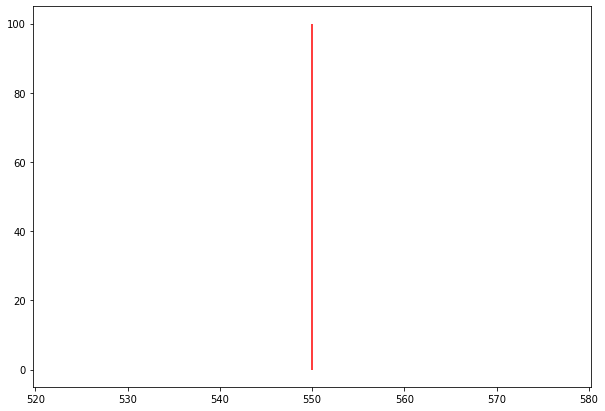

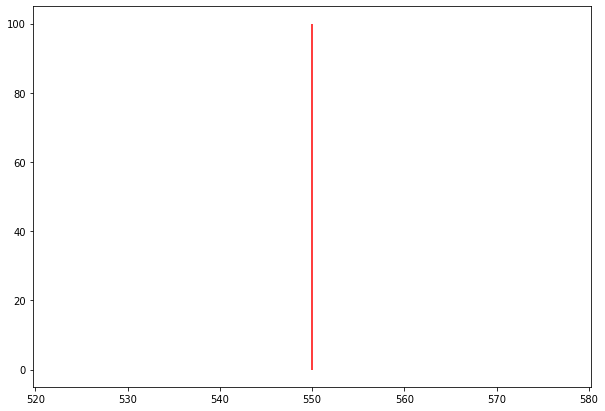

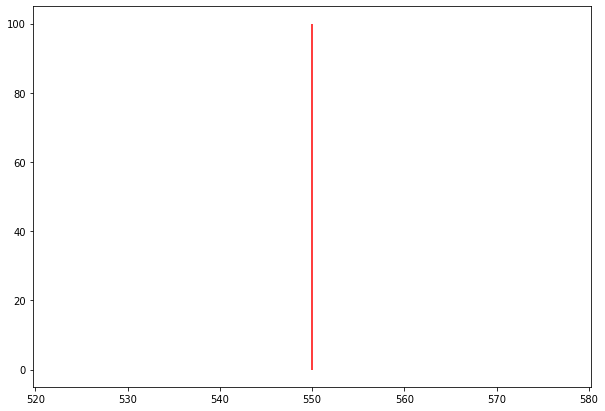

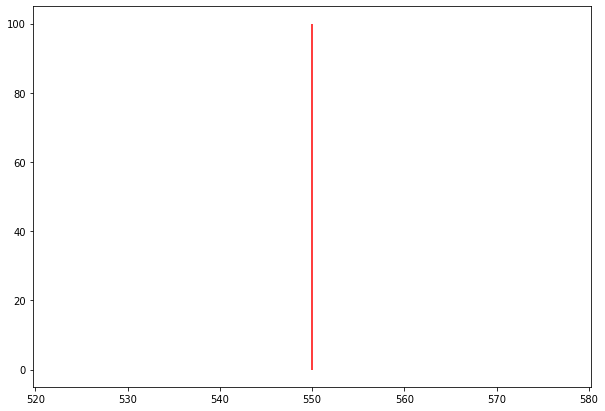

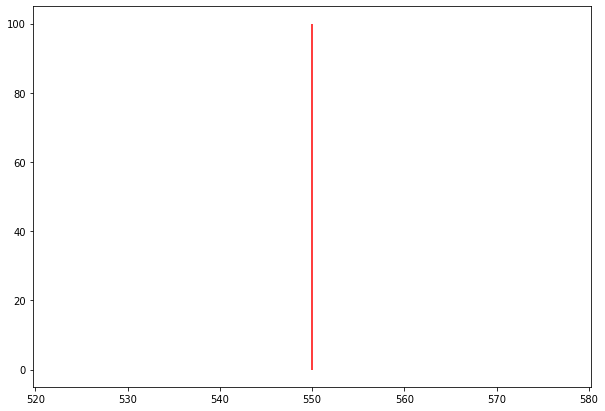

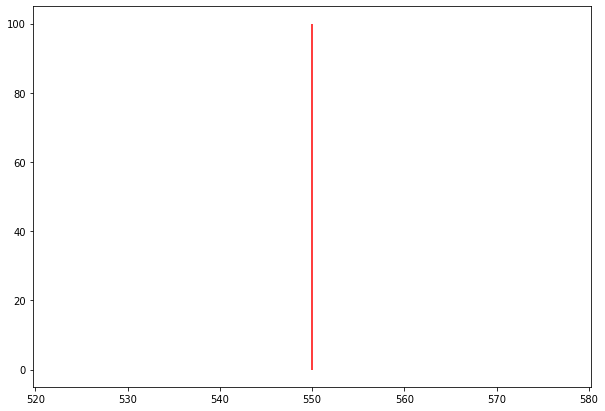

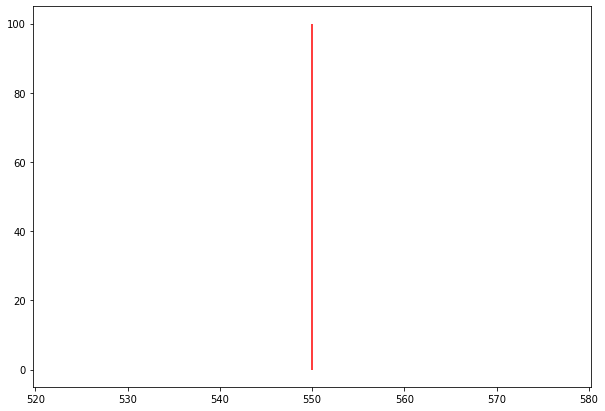

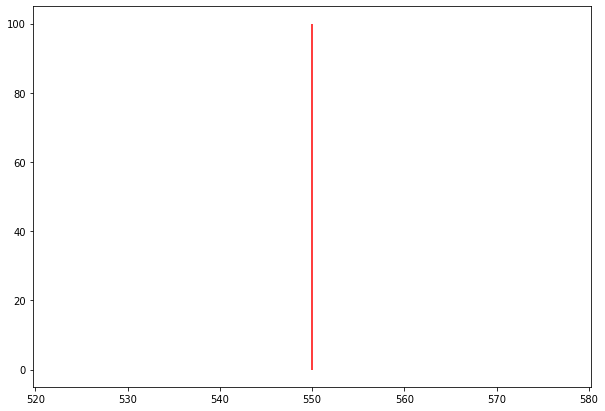

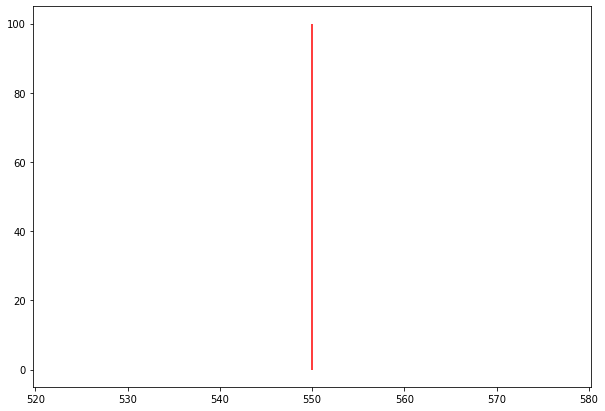

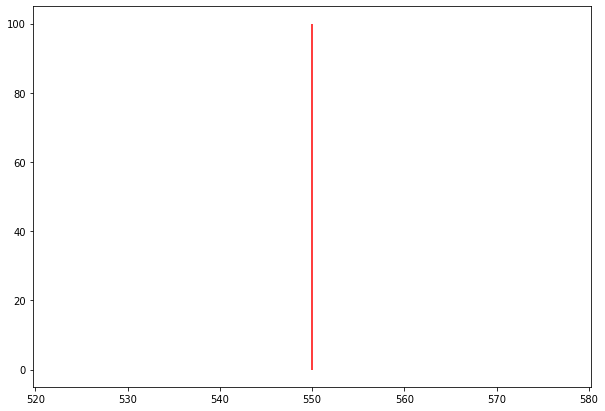

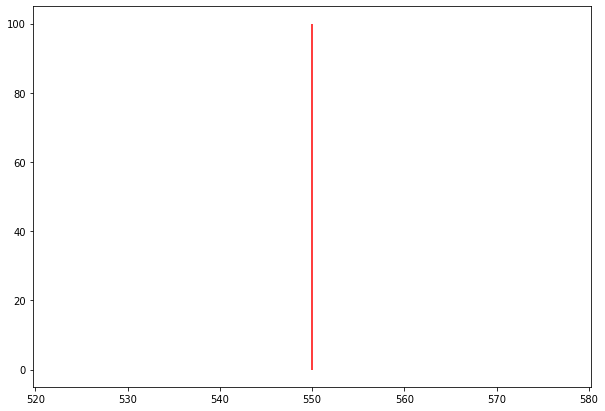

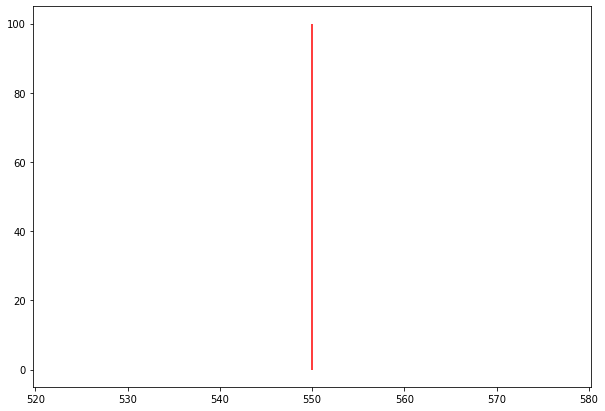

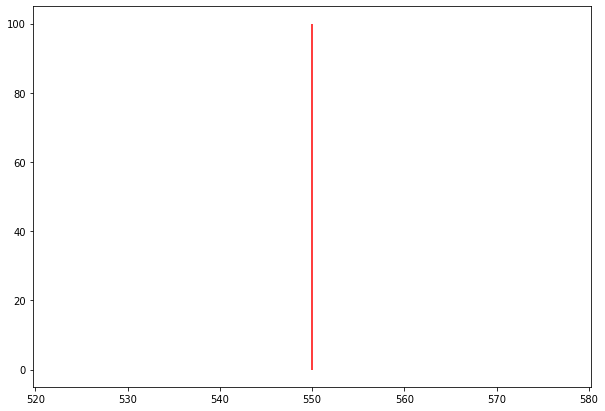

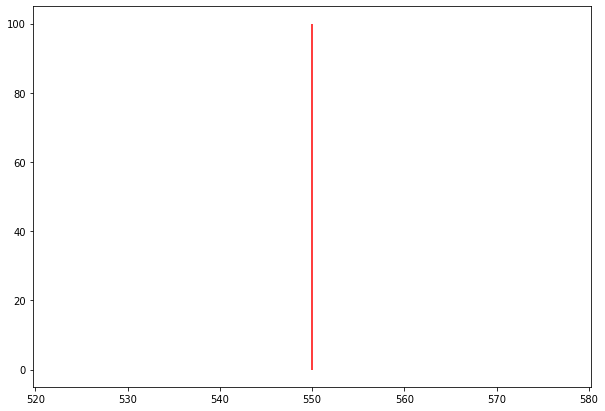

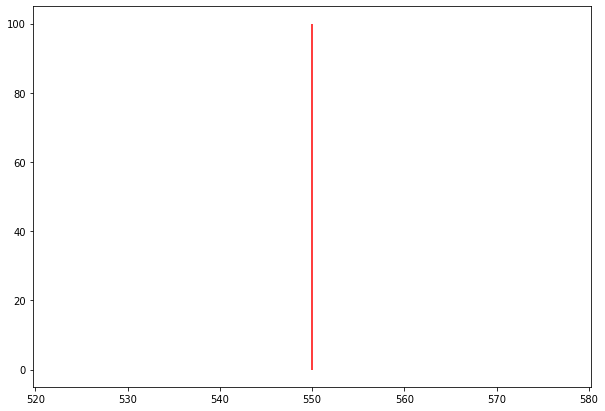

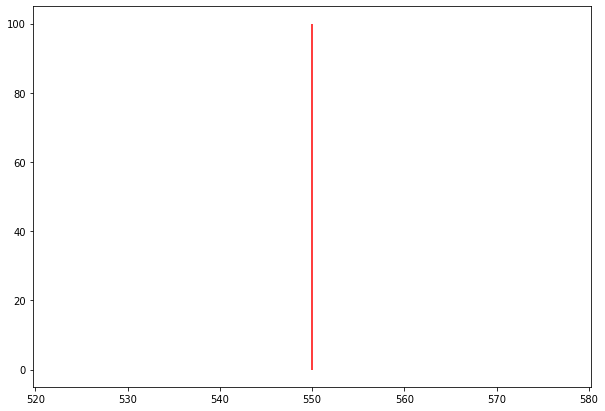

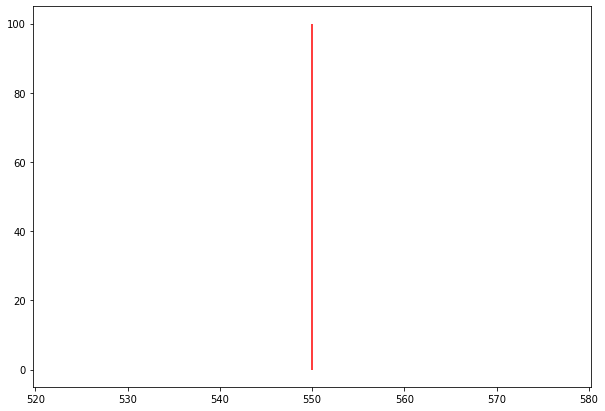

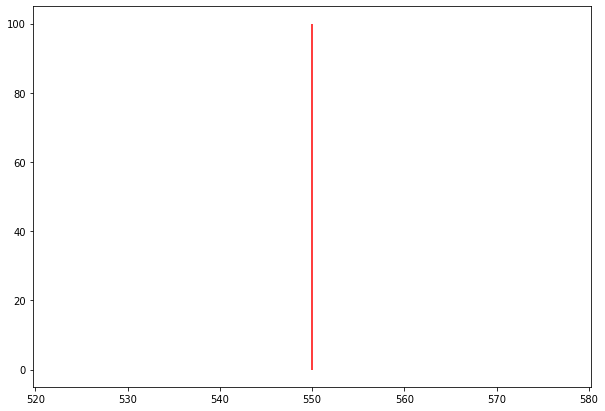

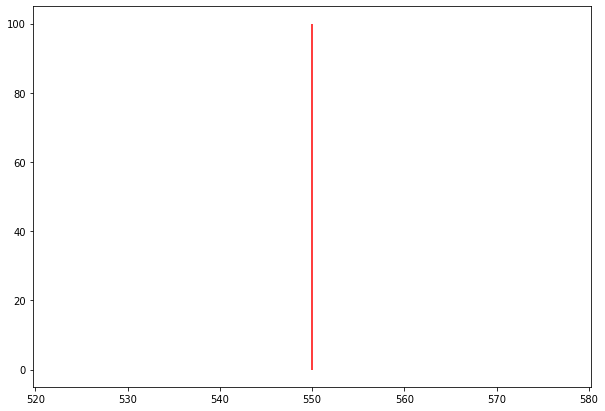

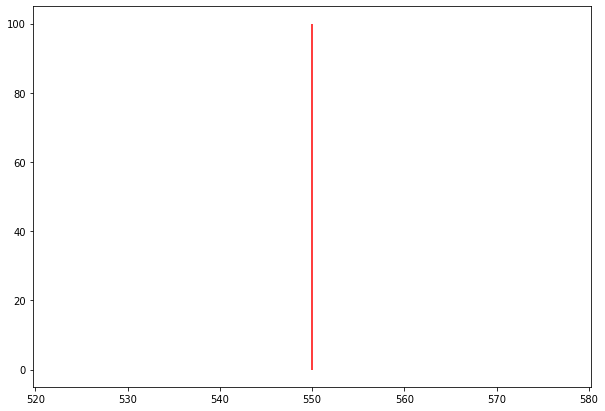

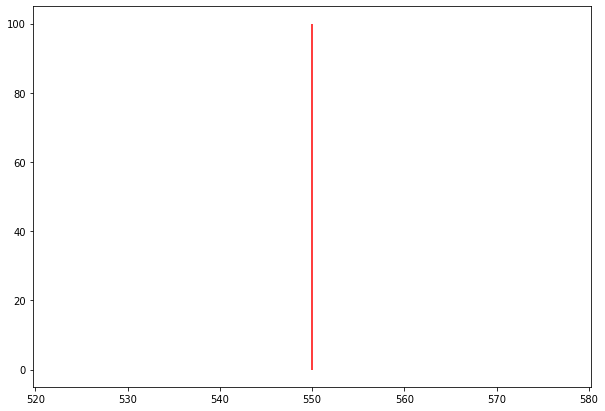

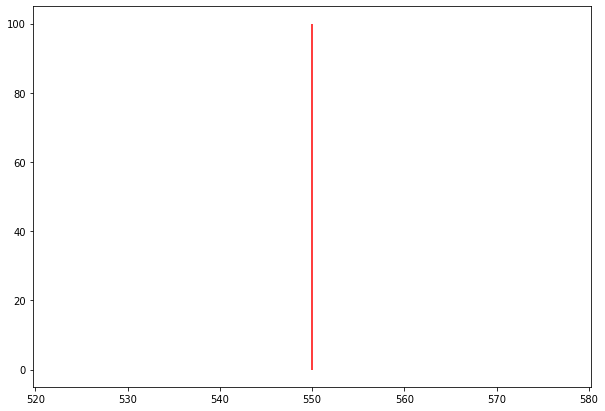

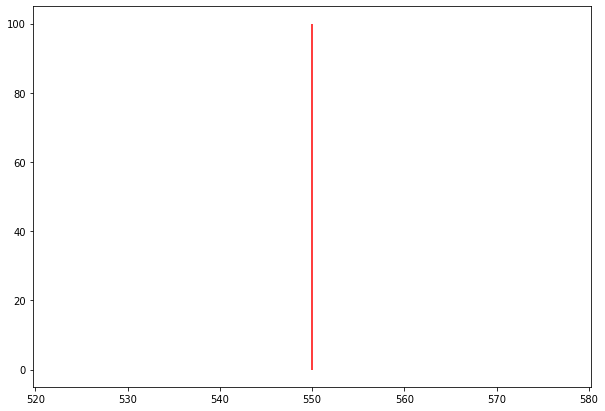

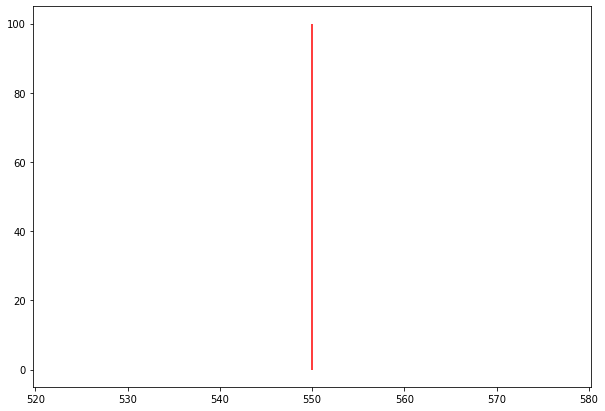

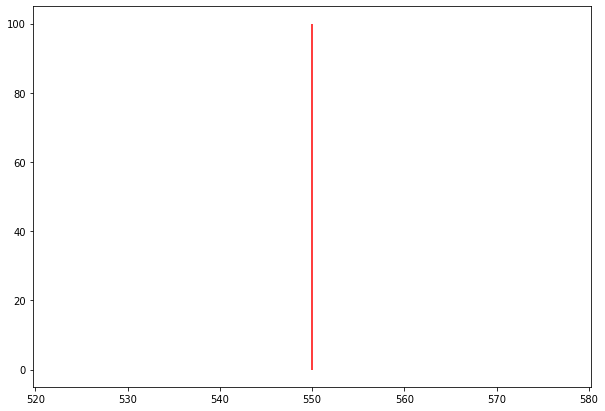

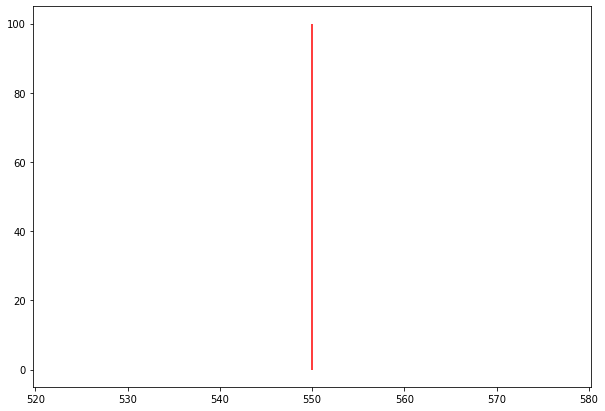

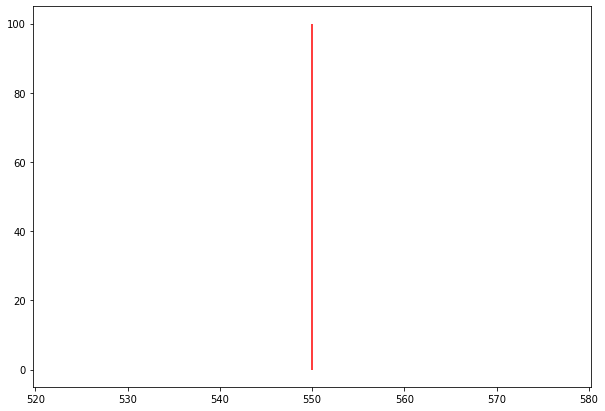

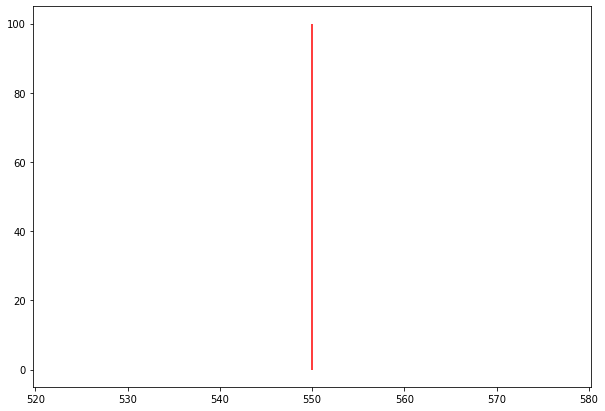

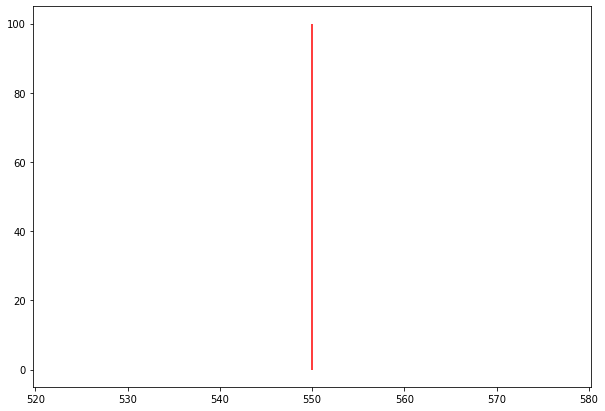

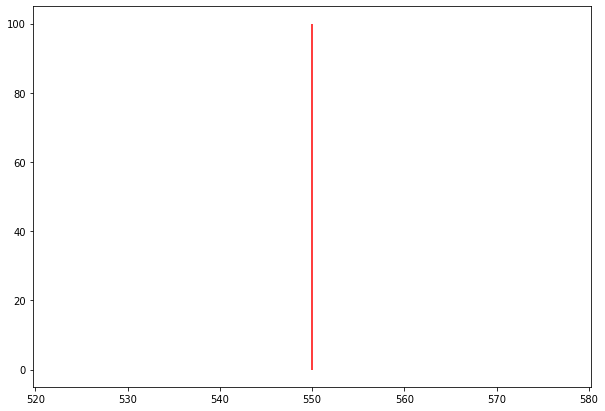

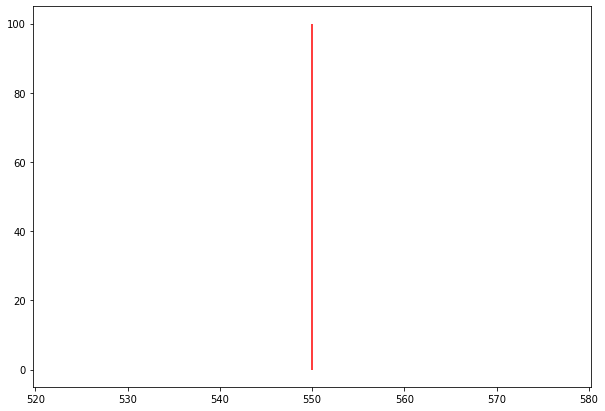

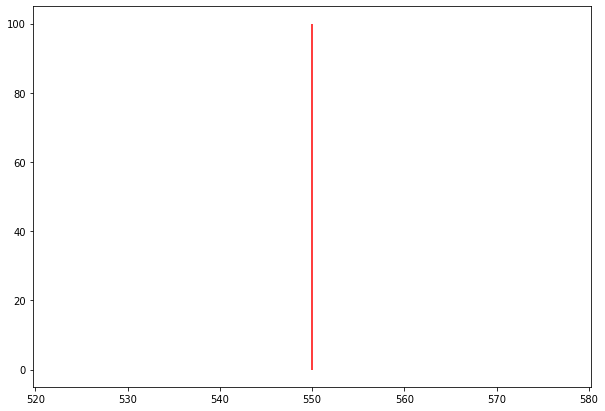

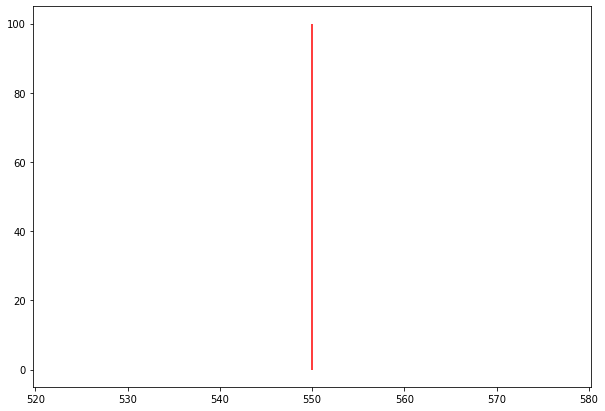

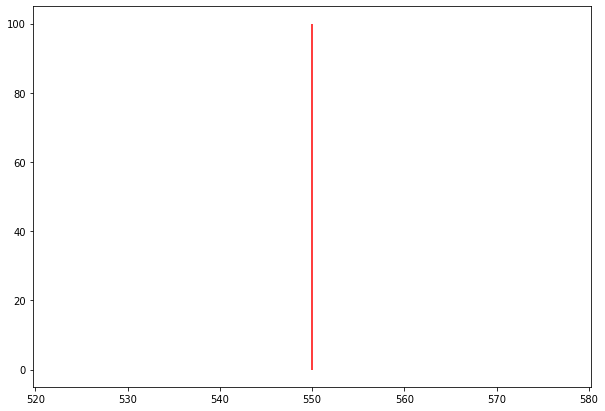

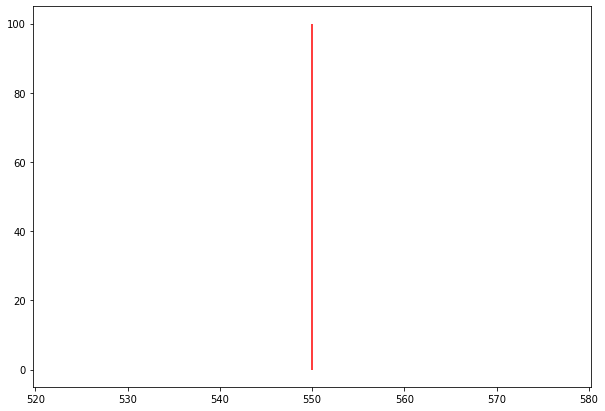

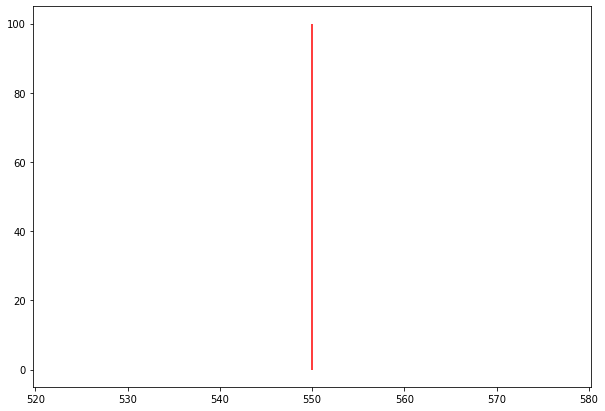

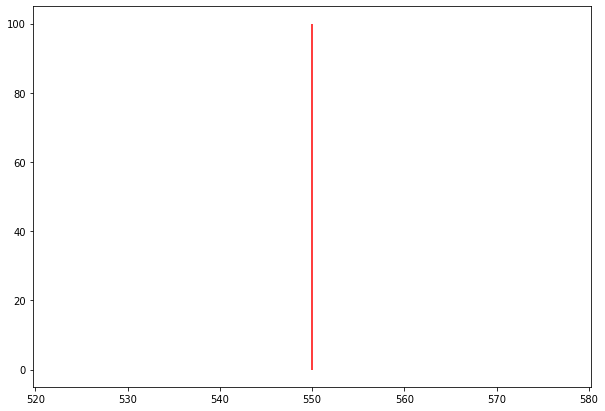

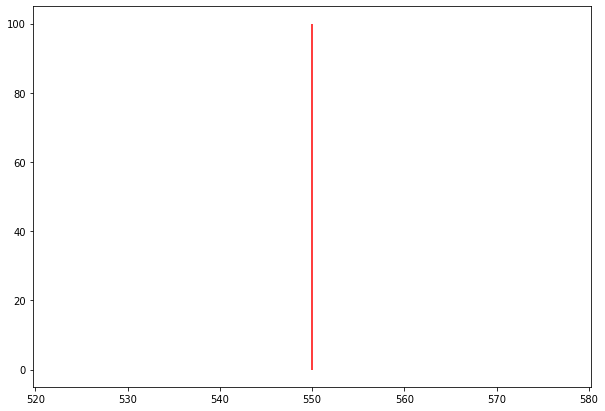

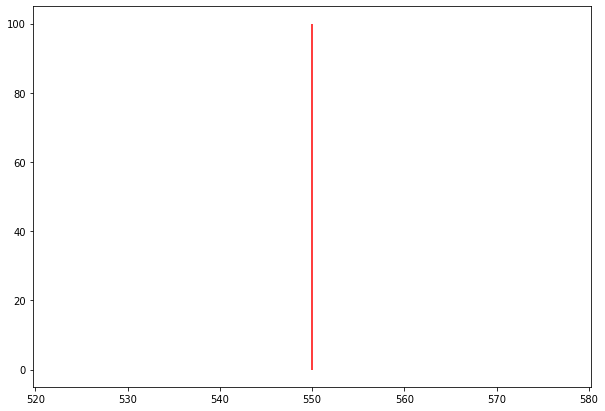

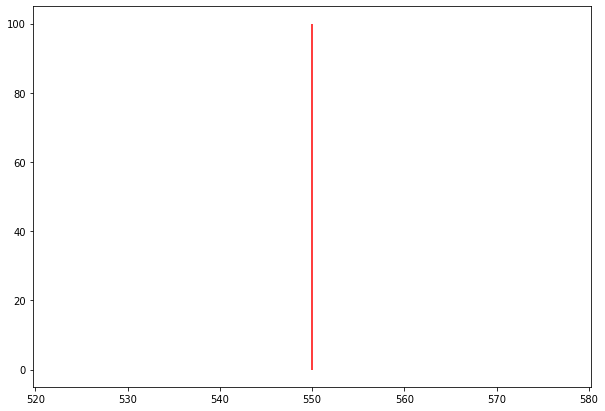

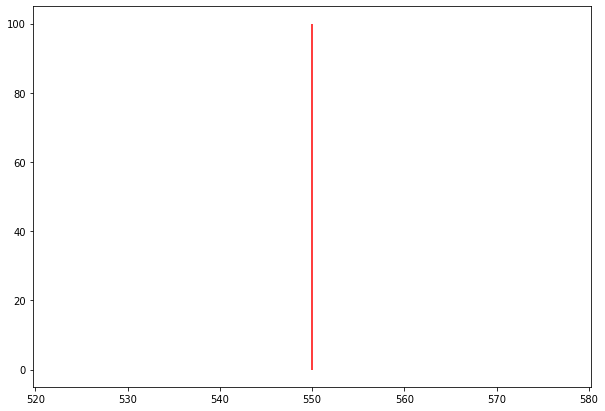

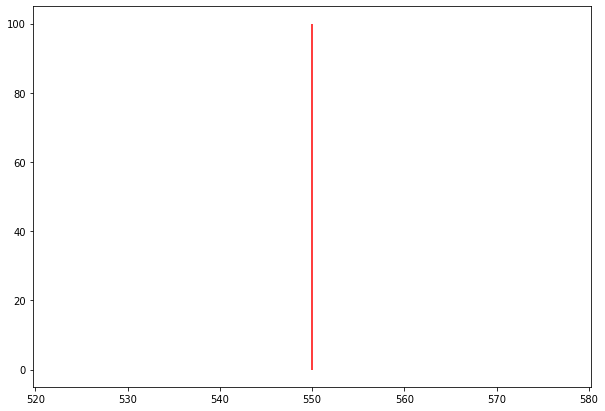

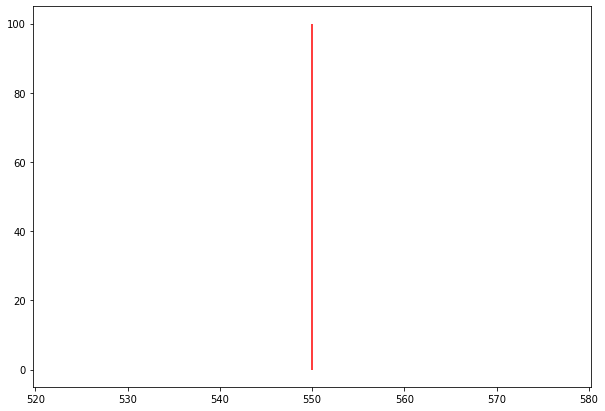

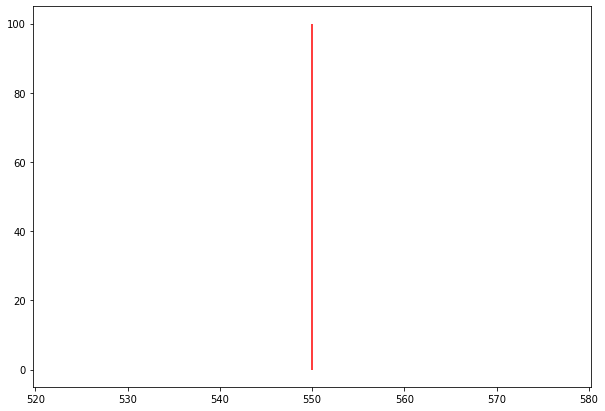

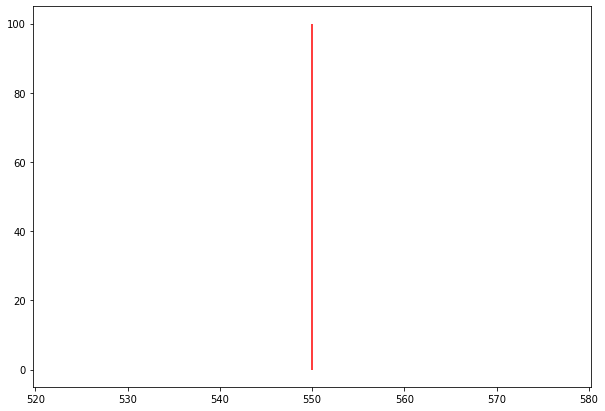

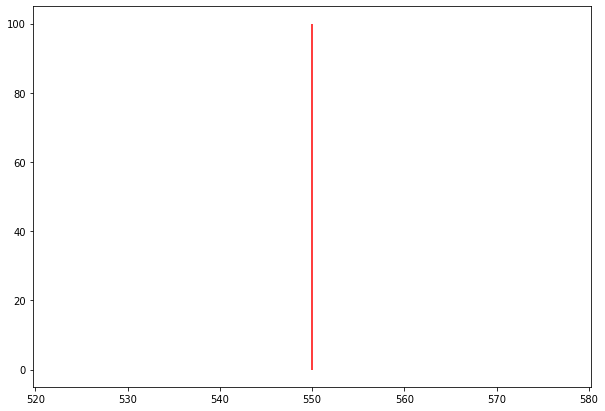

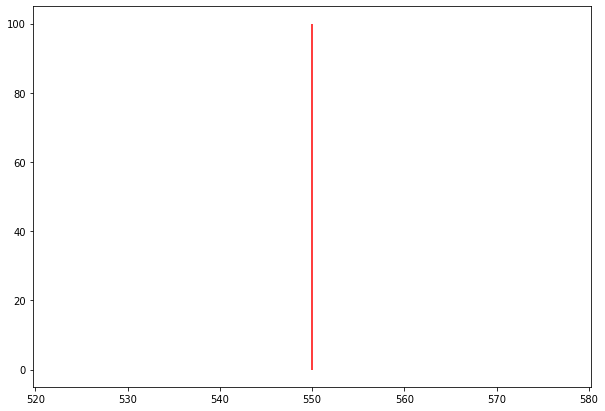

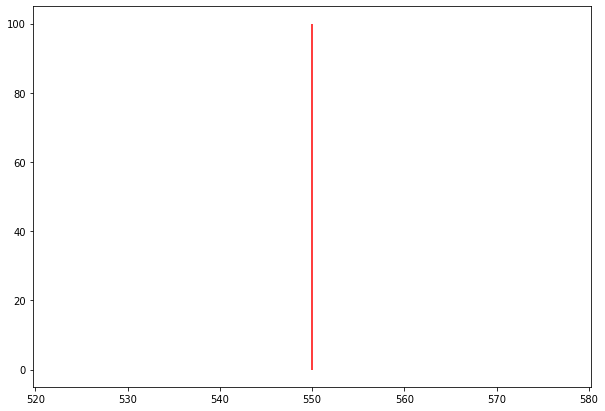

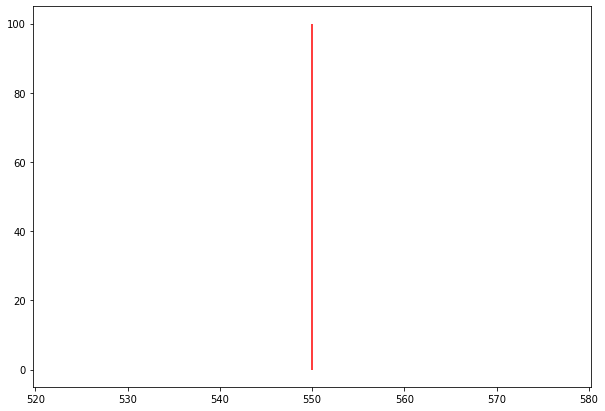

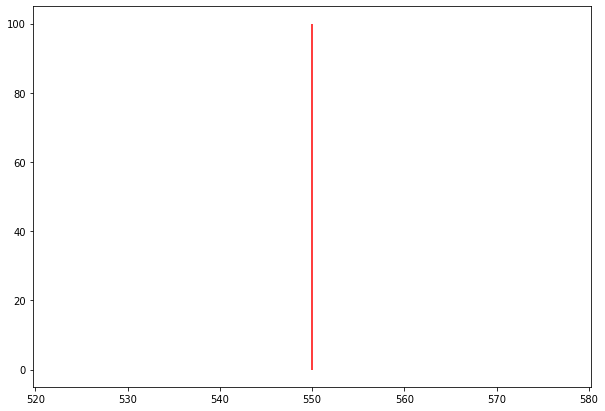

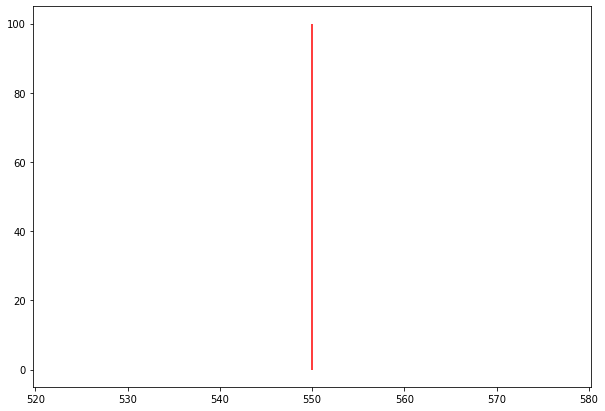

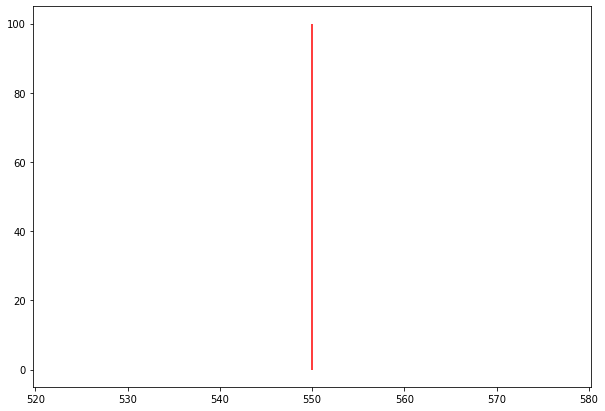

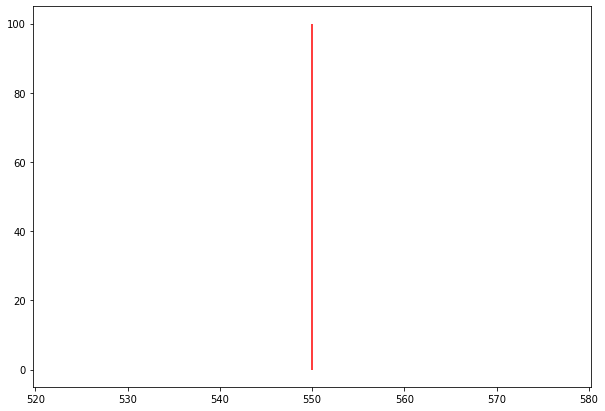

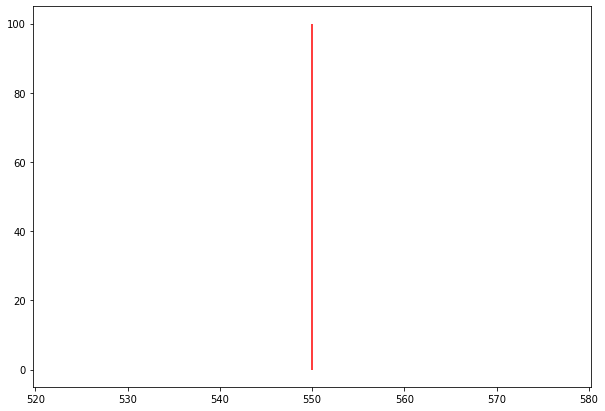

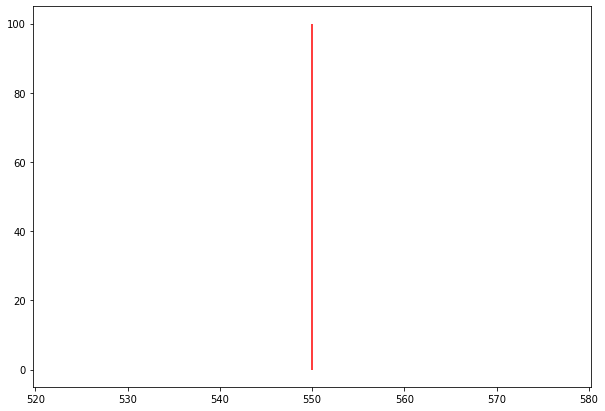

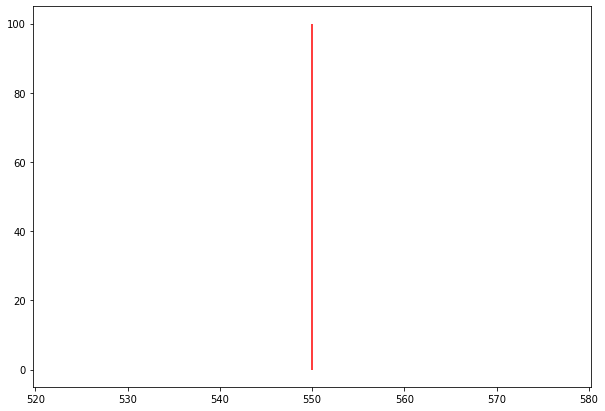

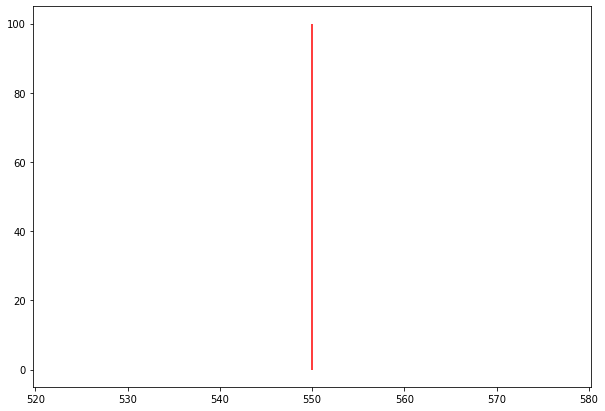

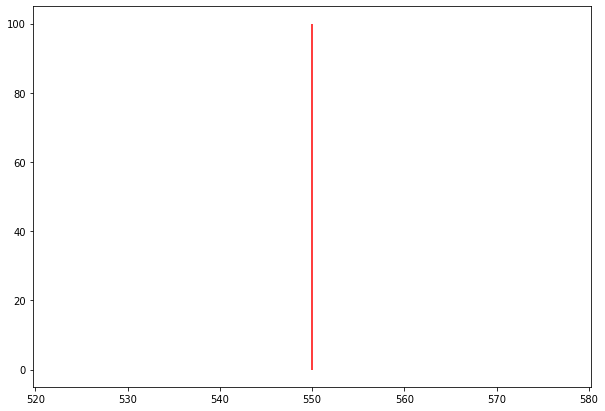

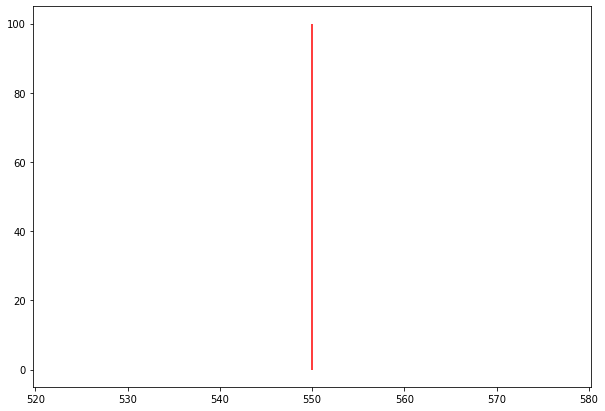

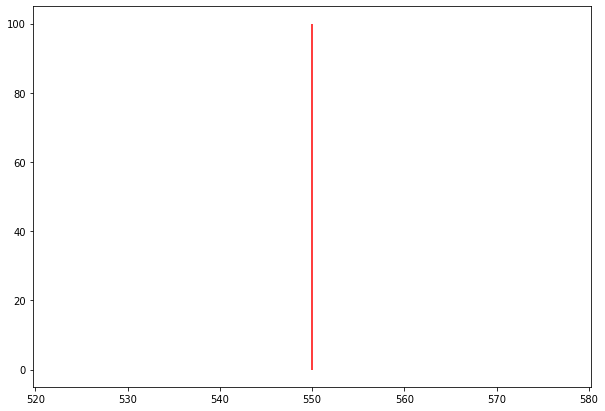

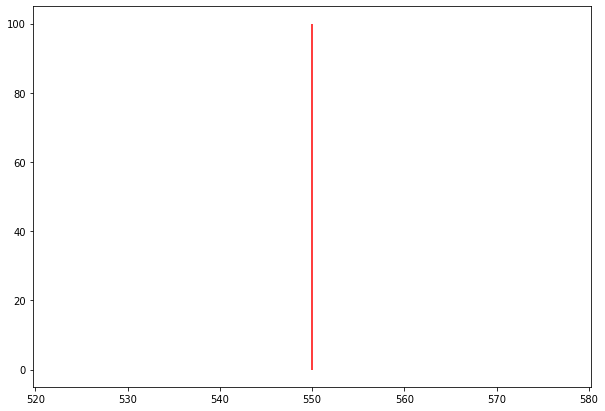

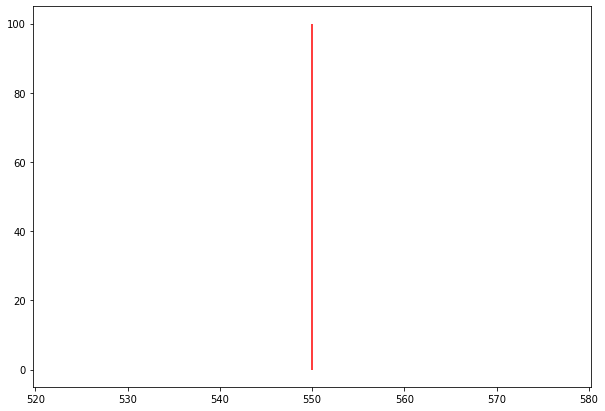

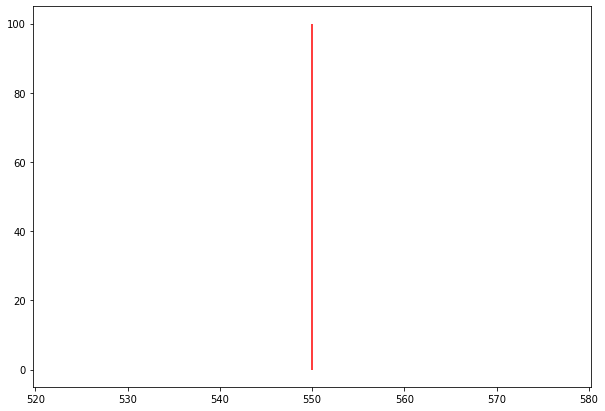

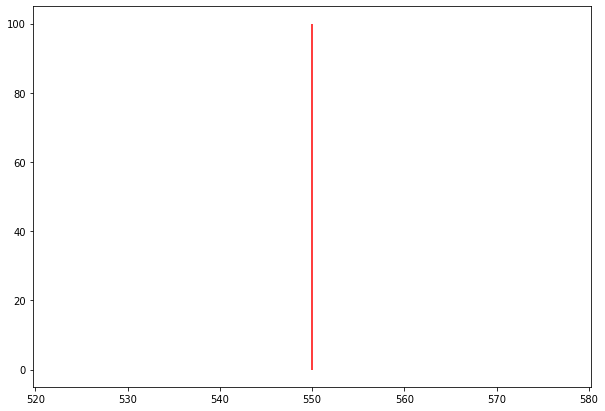

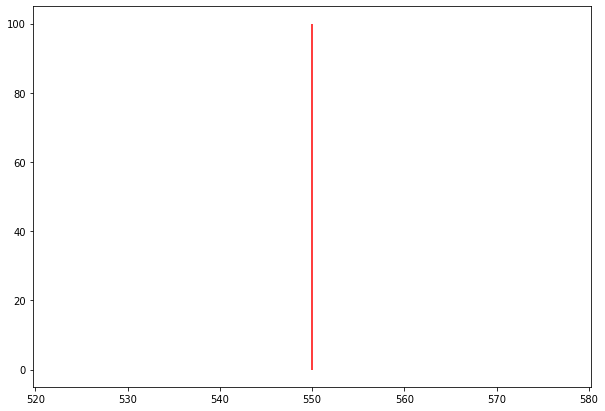

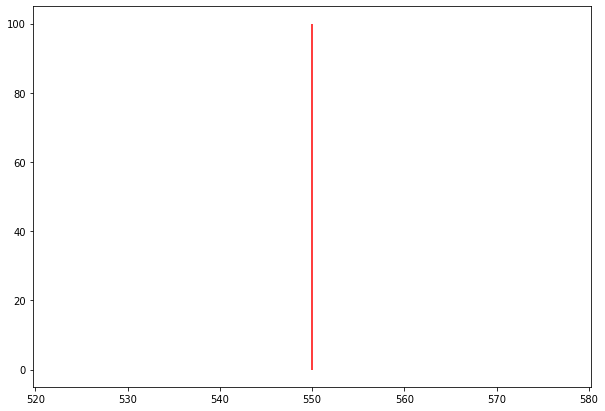

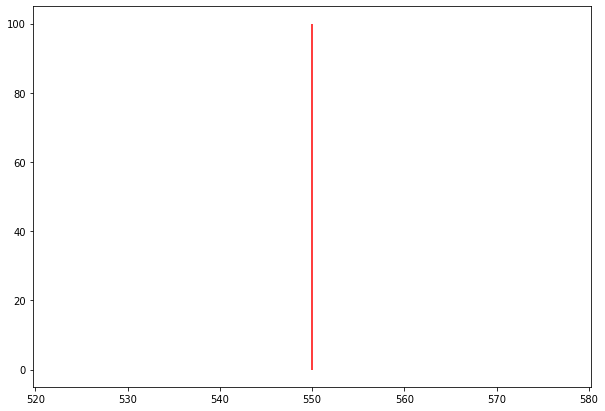

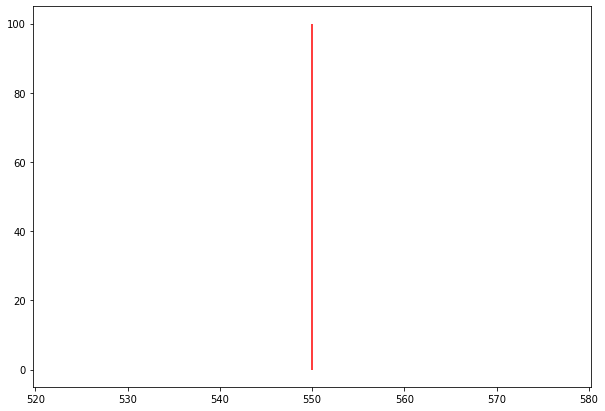

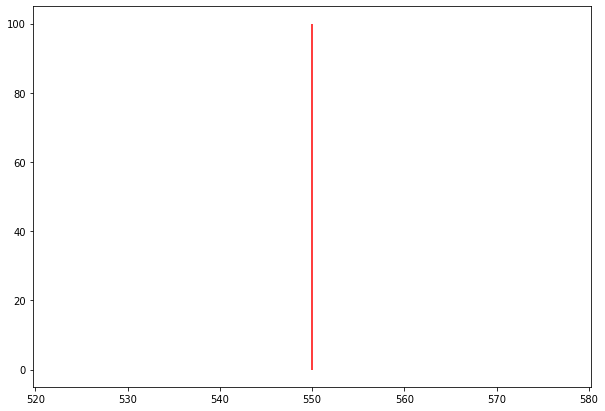

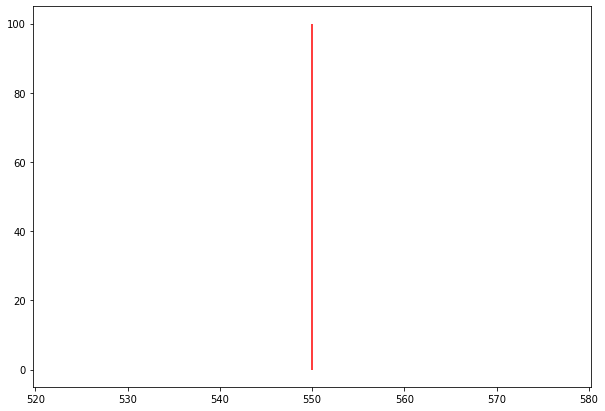

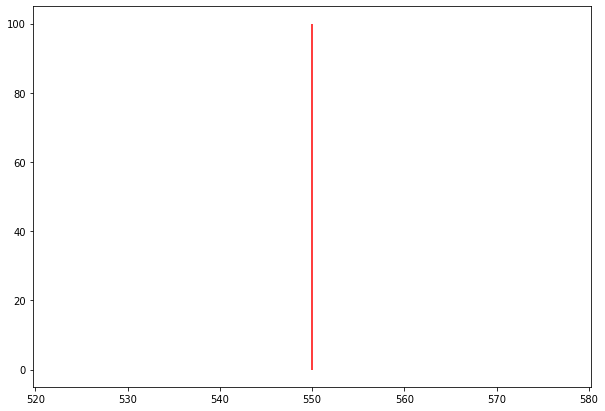

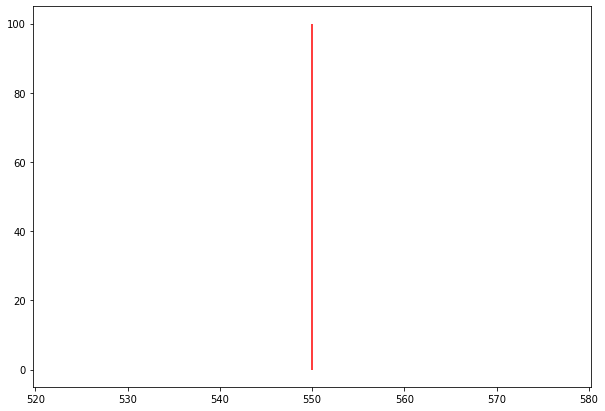

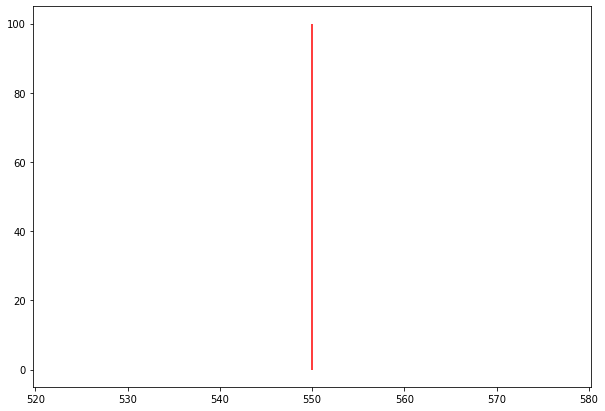

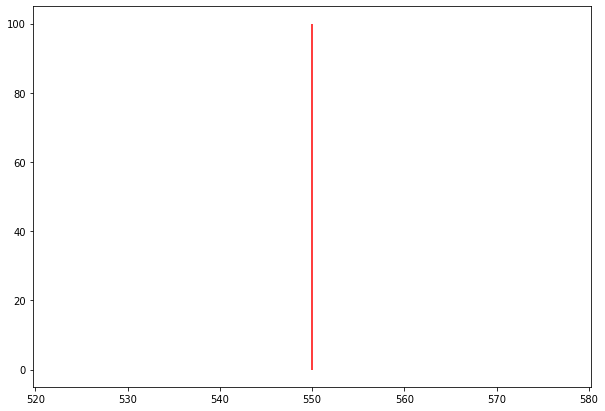

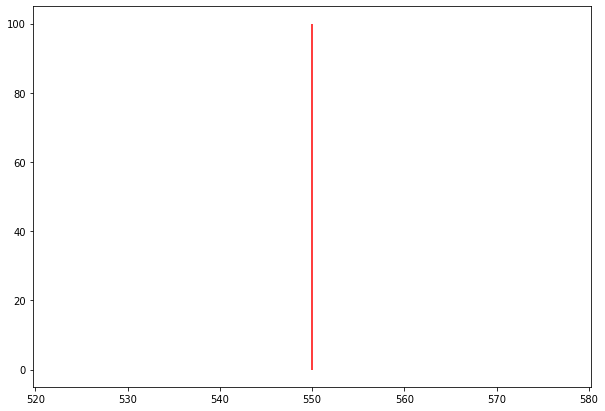

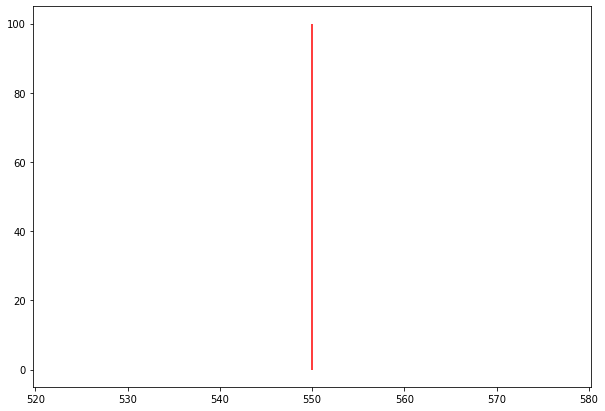

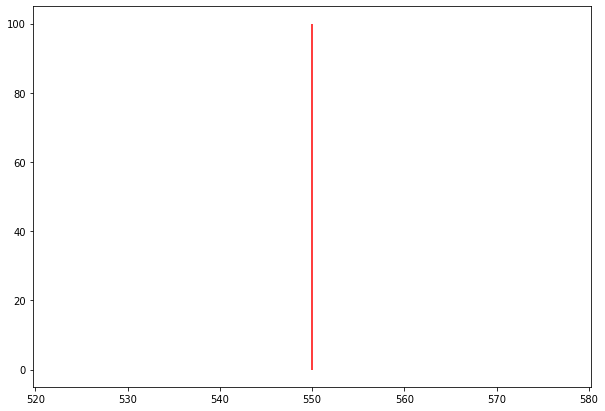

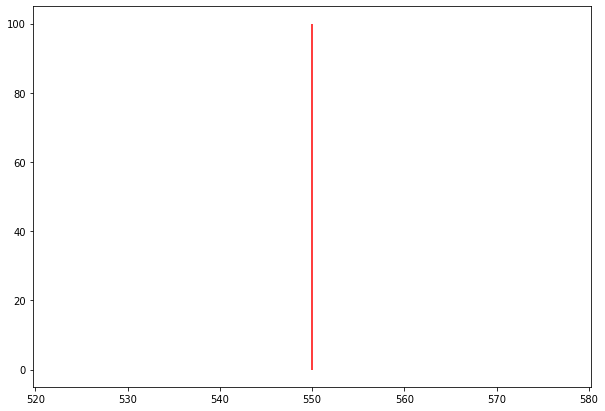

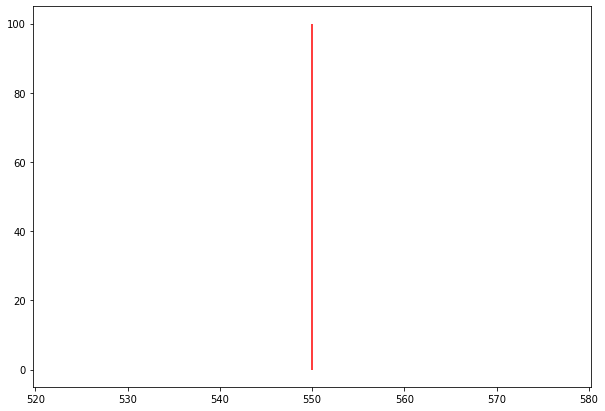

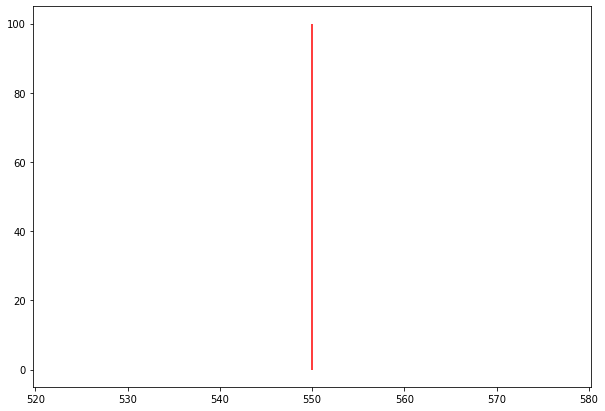

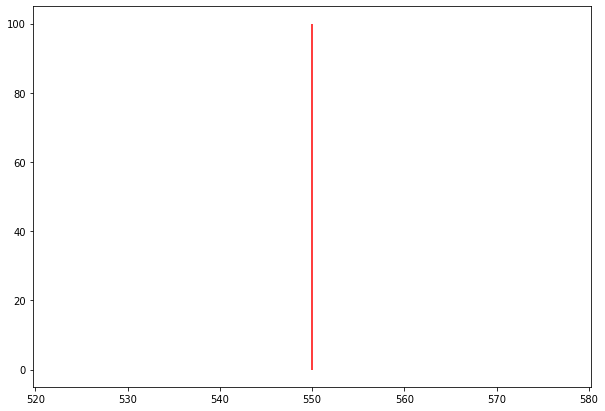

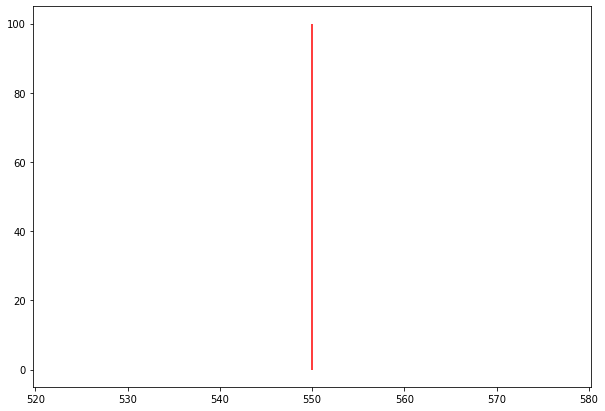

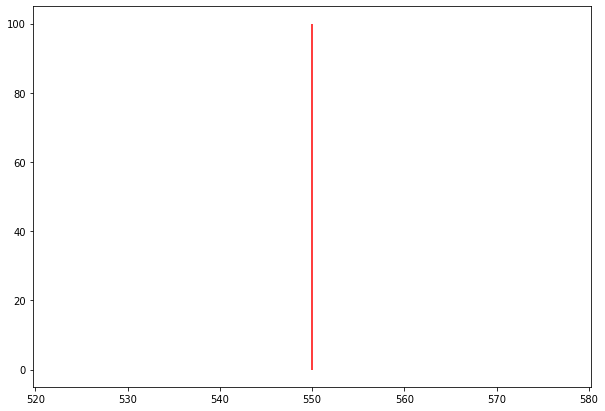

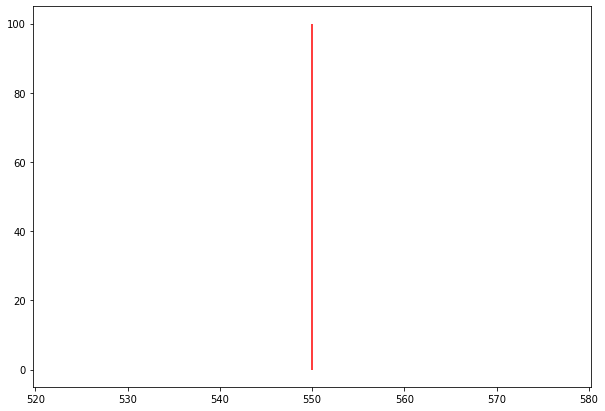

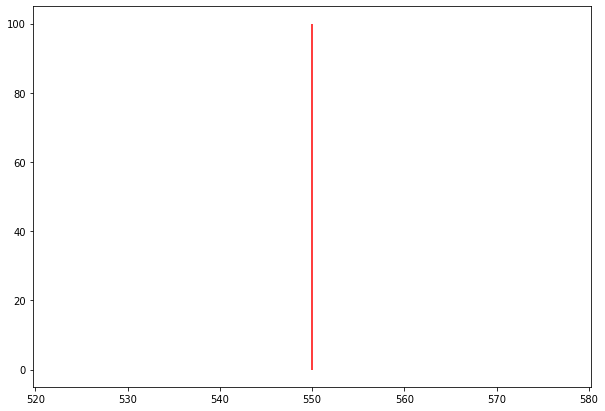

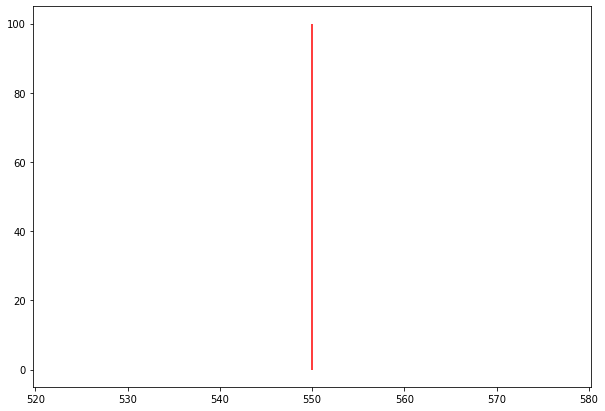

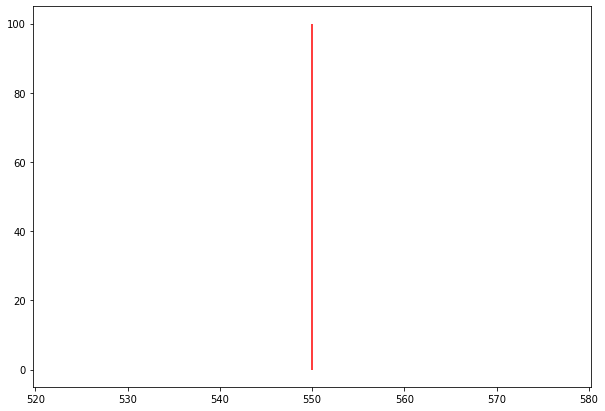

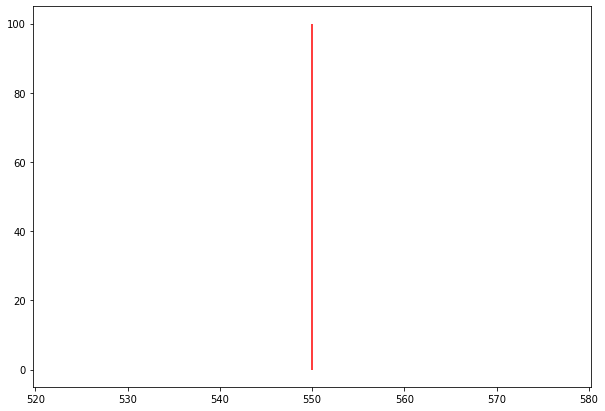

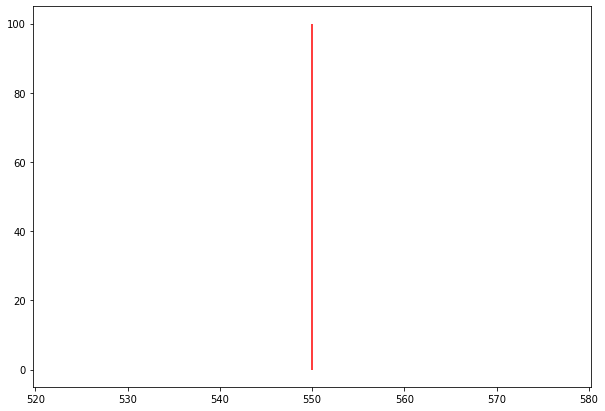

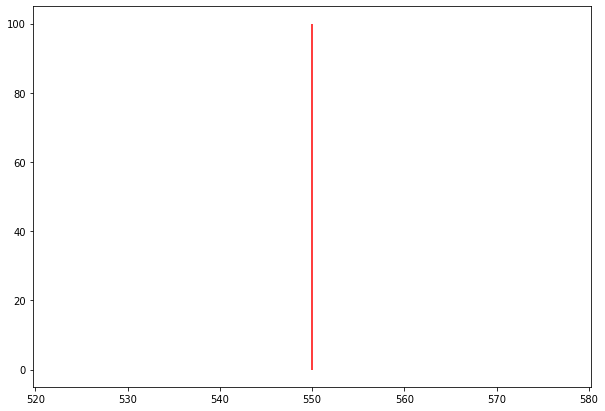

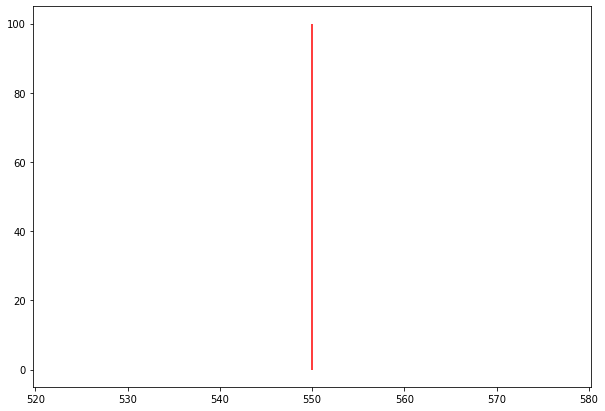

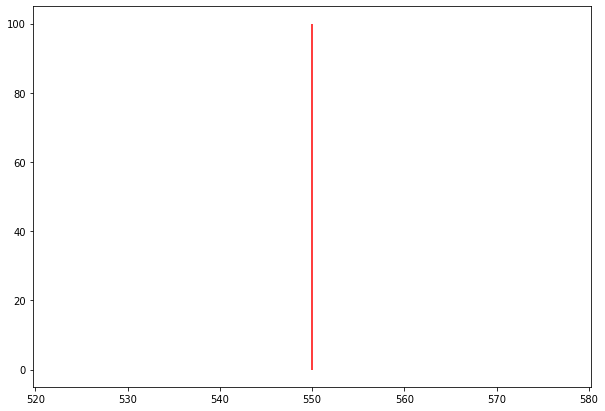

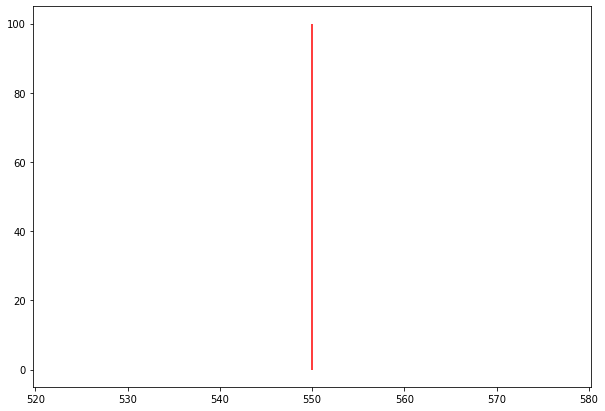

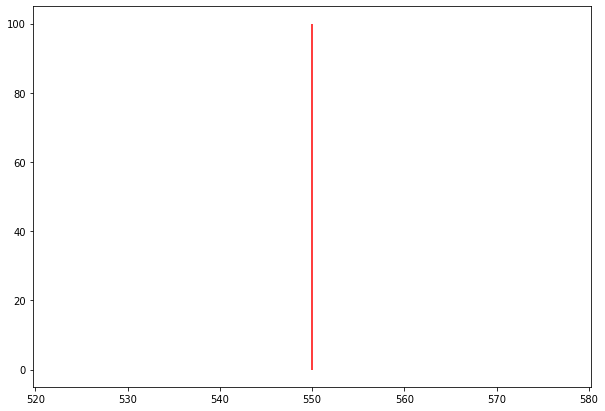

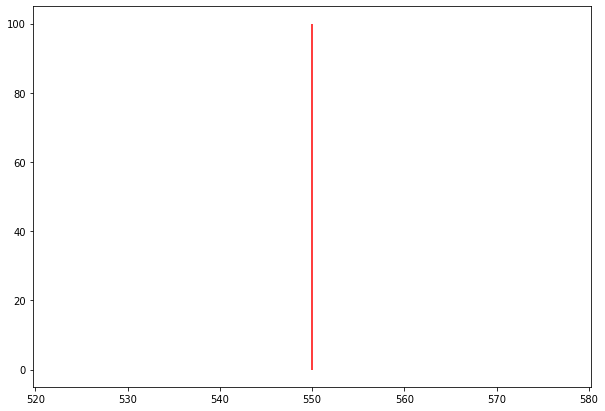

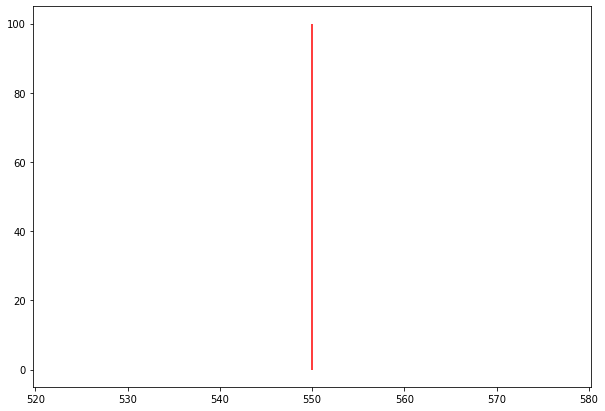

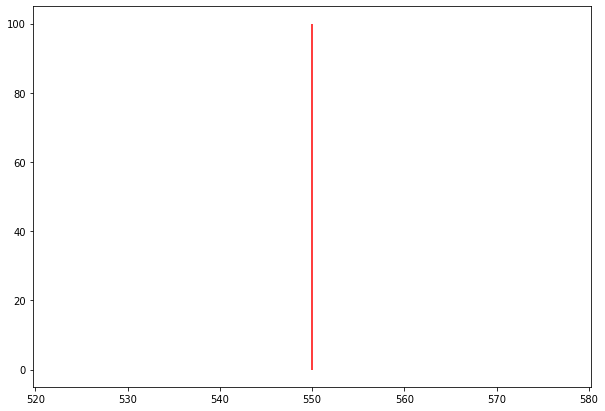

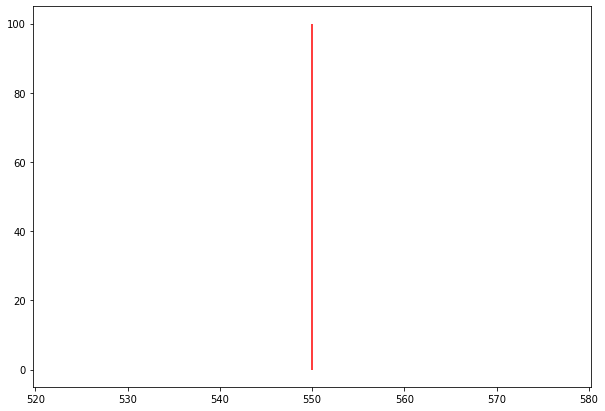

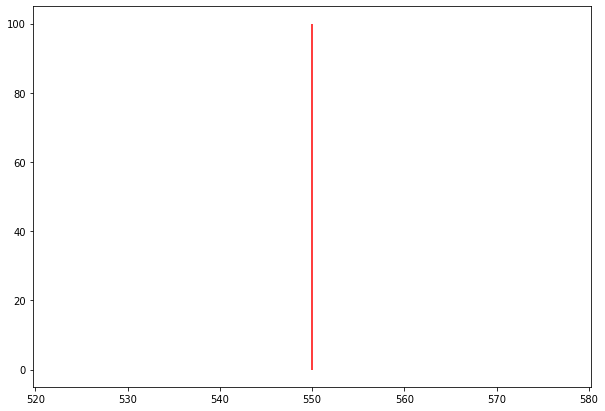

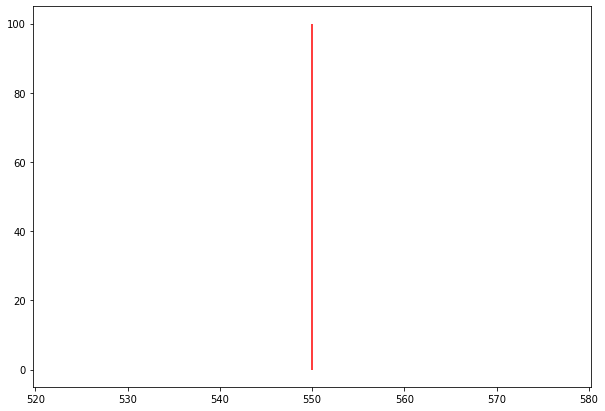

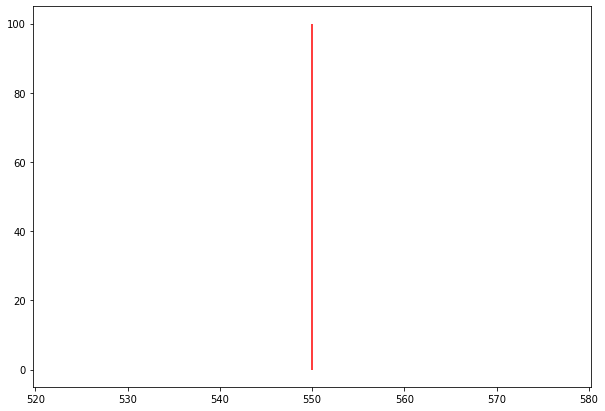

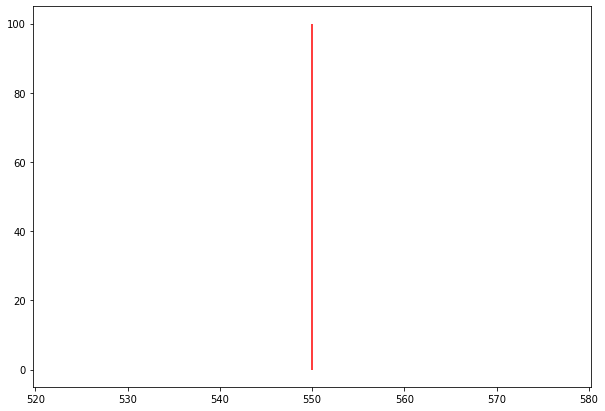

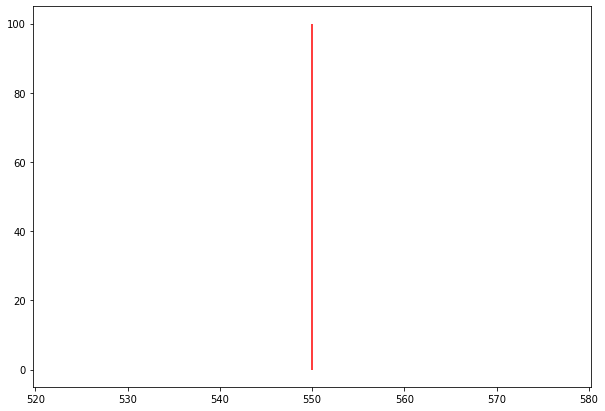

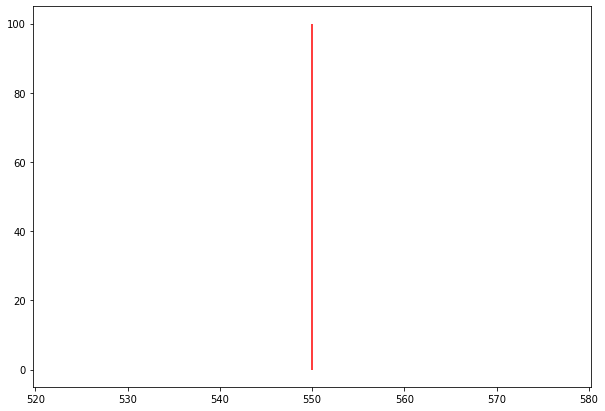

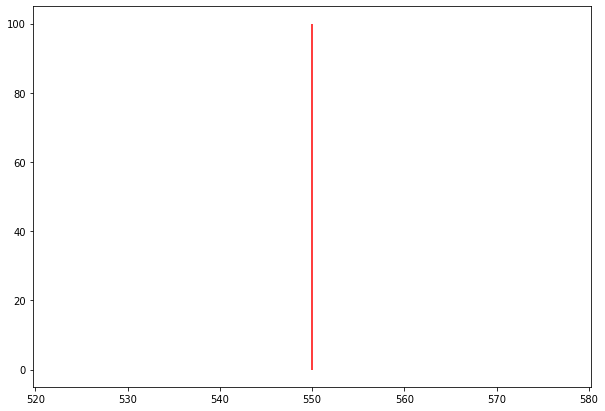

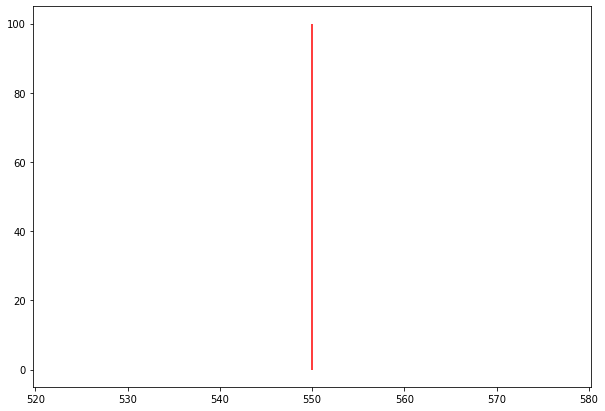

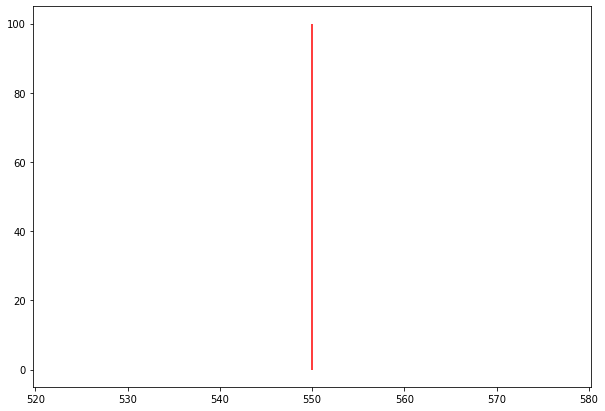

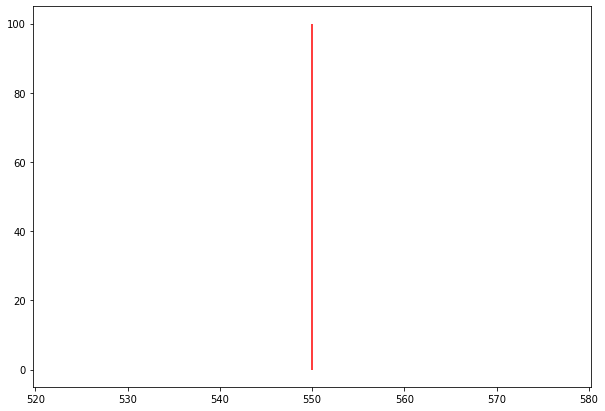

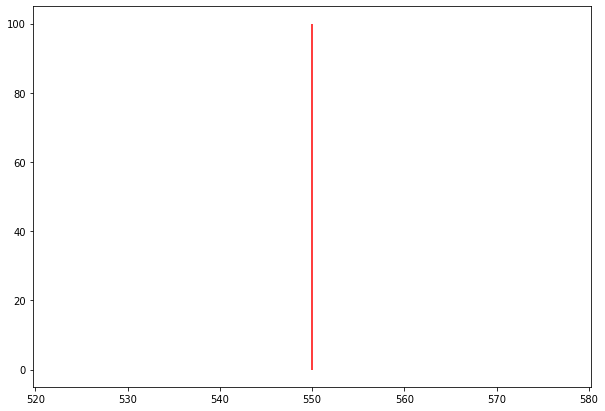

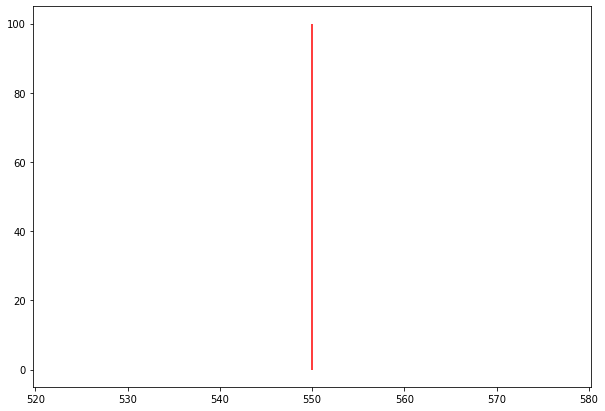

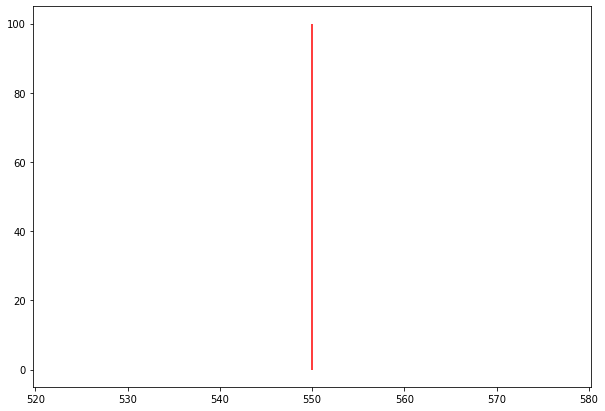

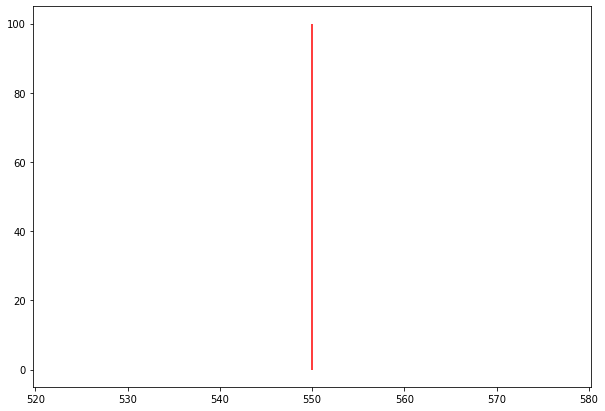

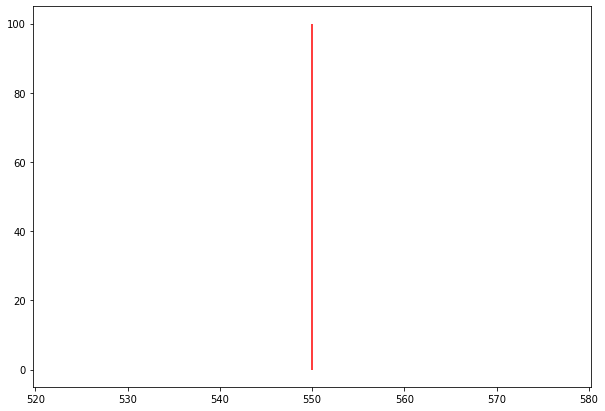

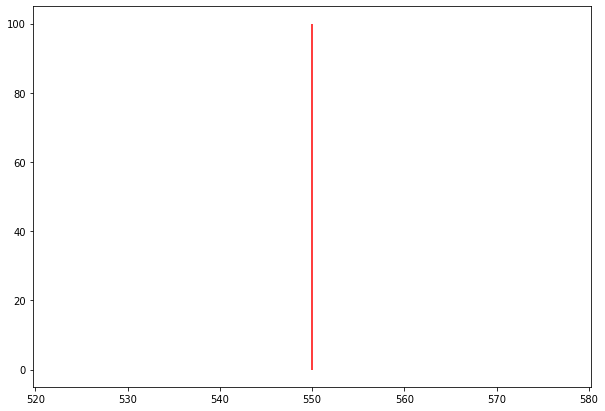

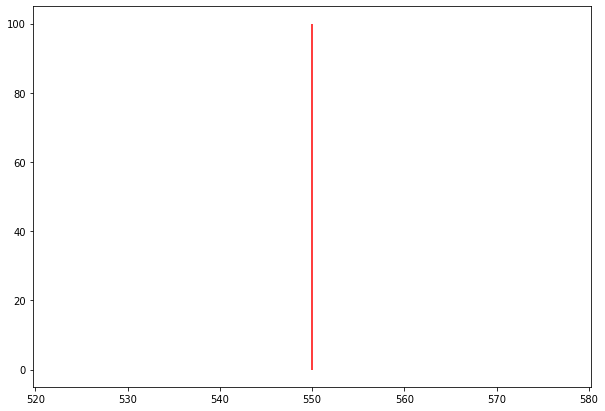

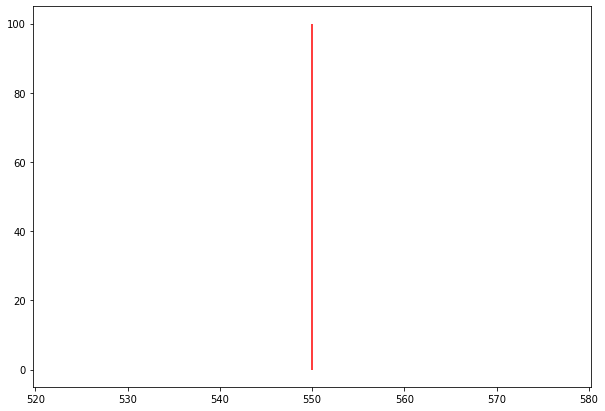

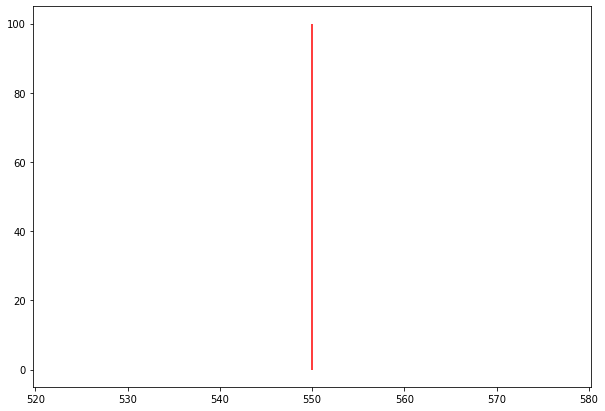

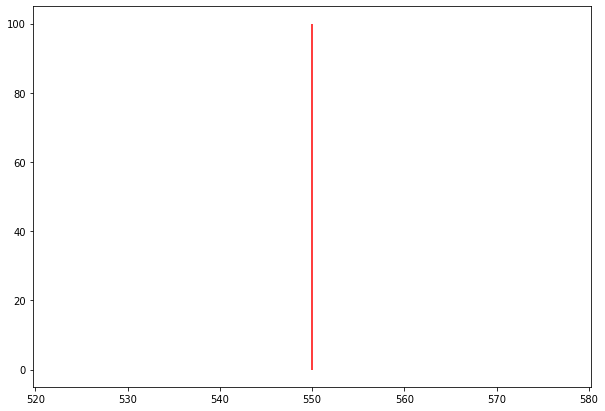

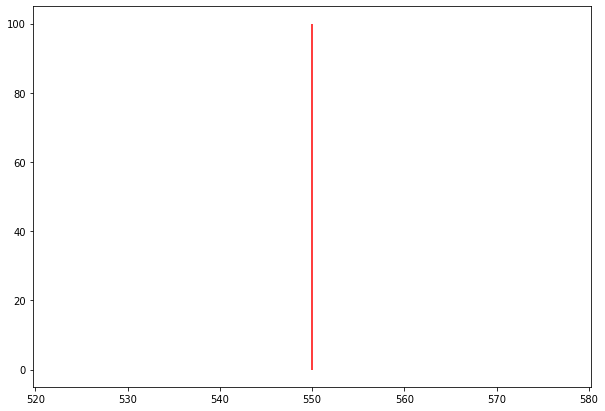

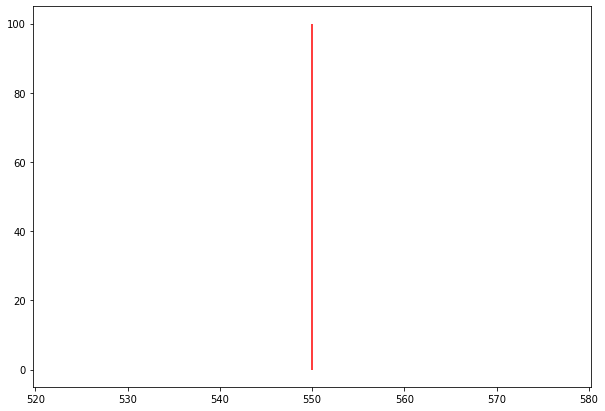

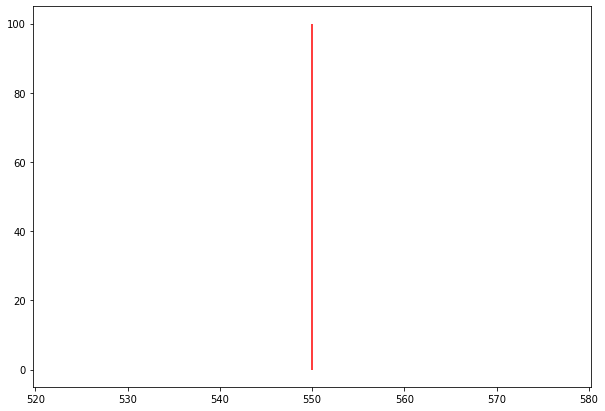

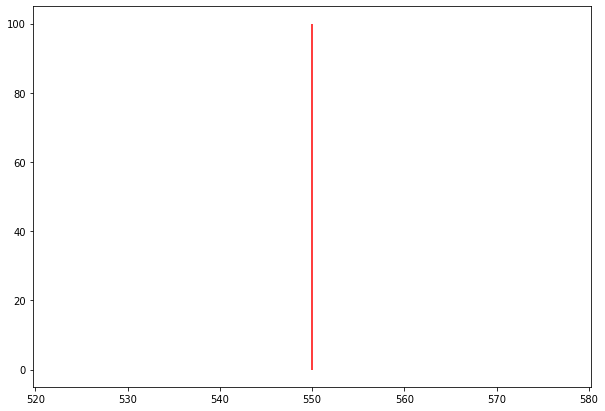

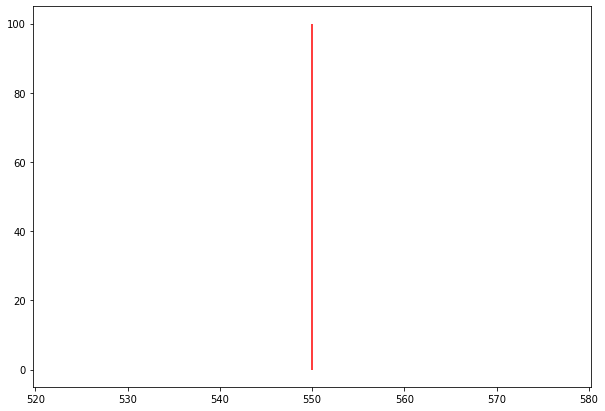

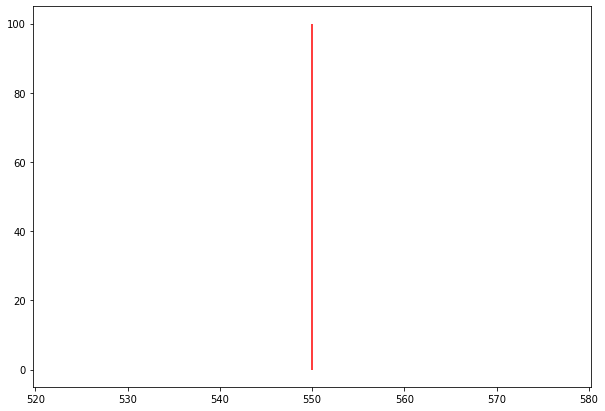

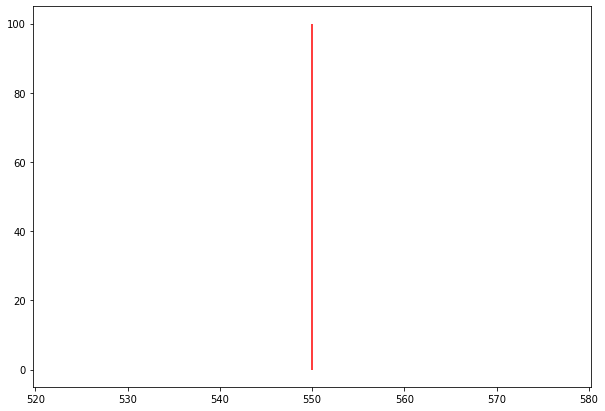

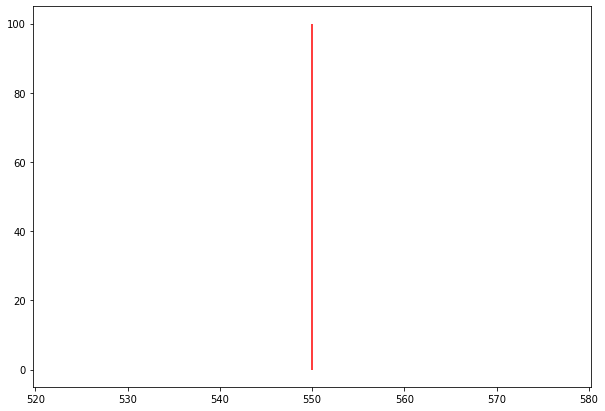

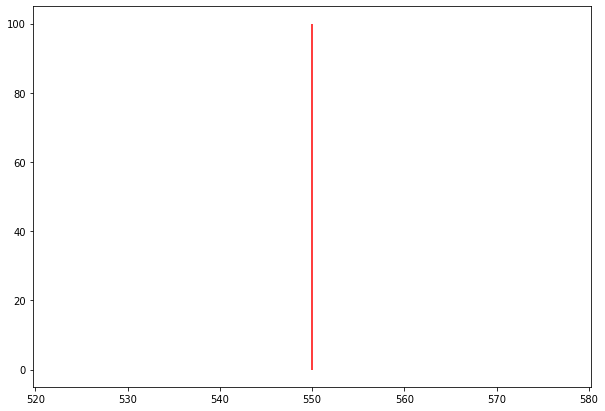

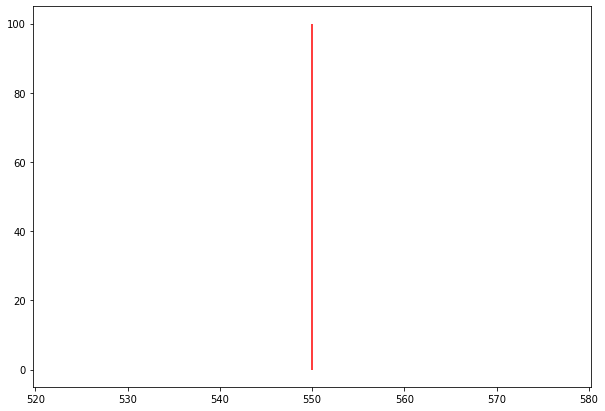

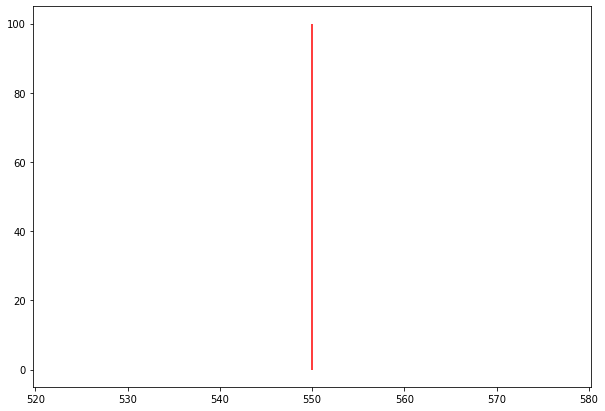

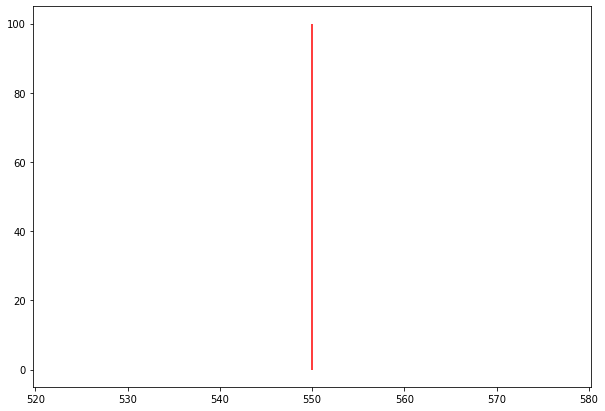

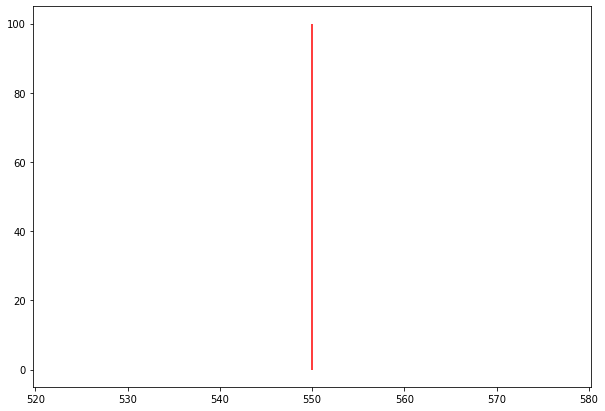

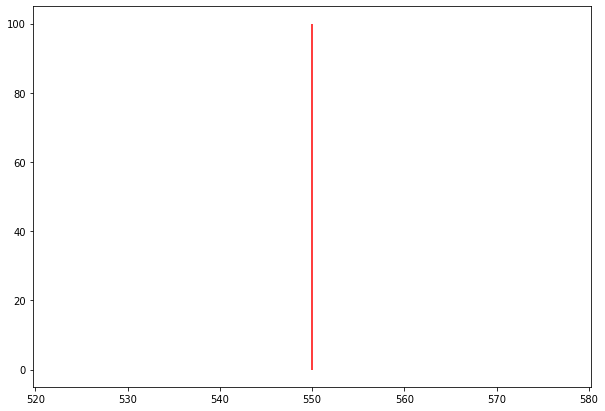

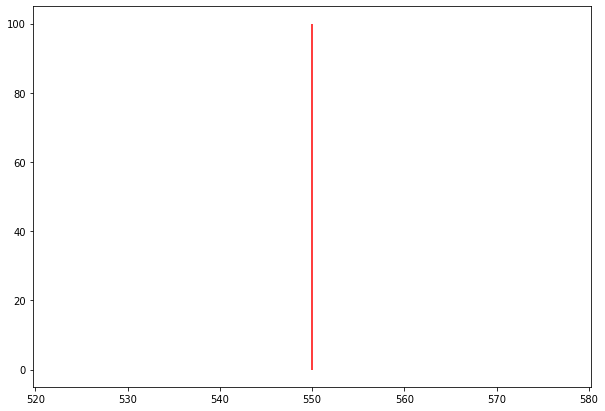

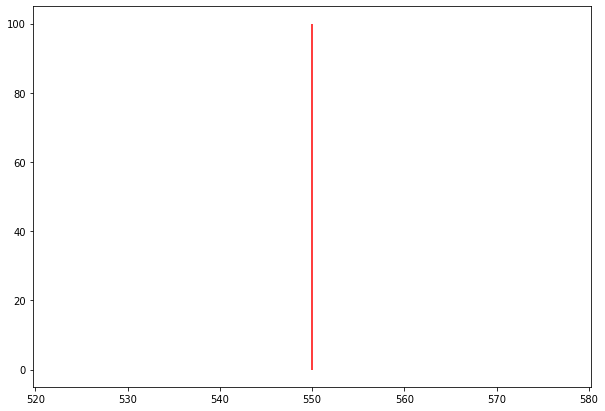

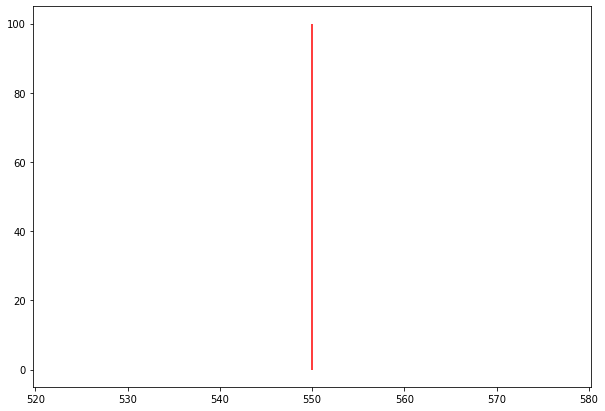

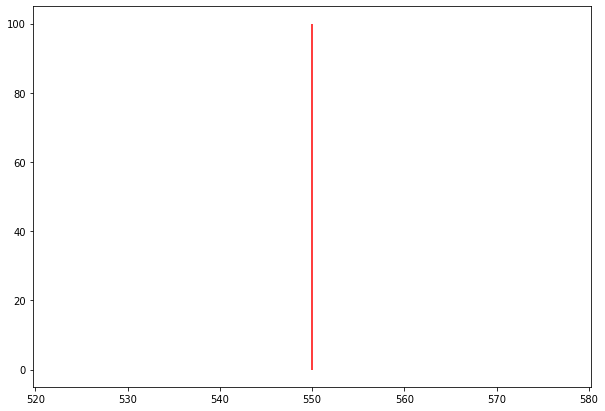

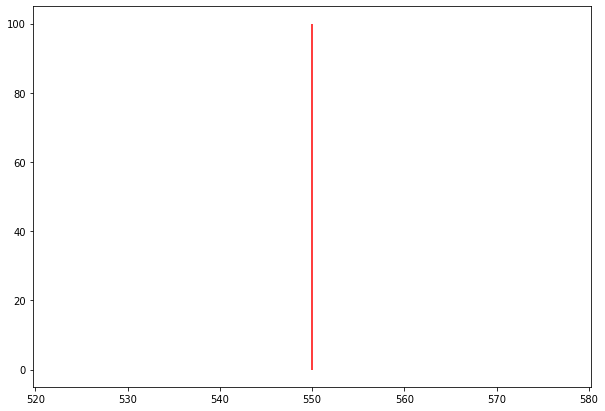

Error in callback <function flush_figures at 0x7fd8f01d4d30> (for post_execute):


KeyboardInterrupt: 

In [17]:
lrr_id_l = []
lrr_id_l = list(LRR_starts_d.keys())

lrr_start_l = []
lrr_start_l = list(LRR_starts_d.values())

for x in lrr_id_l:
    if x.split('_')[1] == prot:
        foundGene = True
    if foundGene:
        xs = [1, 100]
        plt.figure(figsize = (10, 7))

        plt.vlines(x = lrr_start_l[0], ymin = 0, ymax = max(xs),
           colors = 'red',
           label = 'vline_multiple - full height')

In [20]:
lrr_id_l = []
lrr_id_l = list(LRR_starts_d.keys())

lrr_start_l = []
lrr_start_l = list(LRR_starts_d.values())

for x in lrr_id_l:
    if x.split('_')[1] == prot:
        foundGene = True 
        print(foundGene)

True
True
True
True
True
True
True
True
True
True
True


In [19]:
prot

'T275-R1'

In [31]:
ecotype = '10015'
annotation = gffpd.read_gff3(make_path('gff', ecotype+'.gff'))
print(annotation.df)
df = annotation.df

           seq_id source  type  start   end score strand phase  \
0     tig00000074  maker  gene   2707  6575     .      -     .   
1     tig00000074  maker  mRNA   2707  6575     .      -     .   
2     tig00000074  maker  exon   5938  6575     .      -     .   
3     tig00000074  maker  exon   5778  5851     .      -     .   
4     tig00000074  maker  exon   4747  5765     .      -     .   
...           ...    ...   ...    ...   ...   ...    ...   ...   
4836  tig00000103  maker   CDS   3623  4261     .      +     0   
4837  tig00000103  maker  gene   3730  4080     .      -     .   
4838  tig00000103  maker  mRNA   3730  4080     .      -     .   
4839  tig00000103  maker  exon   3730  4080     .      -     .   
4840  tig00000103  maker   CDS   3730  4080     .      -     0   

                                             attributes  
0     ID=10015|G379;Alias=maker-tig00000074-snap-gen...  
1     ID=10015|T379-R1;Parent=10015|G379;Alias=maker...  
2               ID=10015|T379-R1:

In [110]:
df.head(30)

seq_id source  type  start   end score strand phase  \
0   tig00000074  maker  gene   2707  6575     .      -     .   
1   tig00000074  maker  mRNA   2707  6575     .      -     .   
2   tig00000074  maker  exon   5938  6575     .      -     .   
3   tig00000074  maker  exon   5778  5851     .      -     .   
4   tig00000074  maker  exon   4747  5765     .      -     .   
5   tig00000074  maker  exon   4355  4648     .      -     .   
6   tig00000074  maker  exon   3572  4192     .      -     .   
7   tig00000074  maker  exon   3051  3530     .      -     .   
8   tig00000074  maker  exon   2707  3033     .      -     .   
9   tig00000074  maker   CDS   5938  6575     .      -     0   
10  tig00000074  maker   CDS   5778  5851     .      -     1   
11  tig00000074  maker   CDS   4747  5765     .      -     2   
12  tig00000074  maker   CDS   4355  4648     .      -     0   
13  tig00000074  maker   CDS   3572  4192     .      -     0   
14  tig00000074  maker   CDS   3051  3530     .      -     0   
15  tig00000074  maker   CDS   2707  3033     .      -     0   
16  tig00000074  maker  gene      1  1743     .      -     .   
17  tig00000074  maker  mRNA      1  1743     .      -     .   
18  tig00000074  maker  exon   1559  1743     .      -     .   
19  tig00000074  maker  exon   1417  1473     .      -     .   
20  tig00000074  maker  exon   1298  1316     .      -     .   
21  tig00000074  maker  exon   1139  1206     .      -     .   
22  tig00000074  maker  exon   1007  1022     .      -     .   
23  tig00000074  maker  exon    869   930     .      -     .   
24  tig00000074  maker  exon    685   781     .      -     .   
25  tig00000074  maker  exon    547   603     .      -     .   
26  tig00000074  maker  exon      1   465     .      -     .   
27  tig00000074  maker   CDS   1559  1743     .      -     0   
28  tig00000074  maker   CDS   1417  1473     .      -     1   
29  tig00000074  maker   CDS   1298  1316     .      -     1   

                                           attributes  
0   ID=10015|G379;Alias=maker-tig00000074-snap-gen...  
1   ID=10015|T379-R1;Parent=10015|G379;Alias=maker...  
2             ID=10015|T379-R1:7;Parent=10015|T379-R1  
3             ID=10015|T379-R1:6;Parent=10015|T379-R1  
4             ID=10015|T379-R1:5;Parent=10015|T379-R1  
5             ID=10015|T379-R1:4;Parent=10015|T379-R1  
6             ID=10015|T379-R1:3;Parent=10015|T379-R1  
7             ID=10015|T379-R1:2;Parent=10015|T379-R1  
8             ID=10015|T379-R1:1;Parent=10015|T379-R1  
9           ID=10015|T379-R1:cds;Parent=10015|T379-R1  
10          ID=10015|T379-R1:cds;Parent=10015|T379-R1  
11          ID=10015|T379-R1:cds;Parent=10015|T379-R1  
12          ID=10015|T379-R1:cds;Parent=10015|T379-R1  
13          ID=10015|T379-R1:cds;Parent=10015|T379-R1  
14          ID=10015|T379-R1:cds;Parent=10015|T379-R1  
15          ID=10015|T379-R1:cds;Parent=10015|T379-R1  
16  ID=10015|G378;Alias=maker-tig00000074-augustus...  
17  ID=10015|T378-R1;Parent=10015|G378;Alias=maker...  
18            ID=10015|T378-R1:9;Parent=10015|T378-R1  
19            ID=10015|T378-R1:8;Parent=10015|T378-R1  
20            ID=10015|T378-R1:7;Parent=10015|T378-R1  
21            ID=10015|T378-R1:6;Parent=10015|T378-R1  
22            ID=10015|T378-R1:5;Parent=10015|T378-R1  
23            ID=10015|T378-R1:4;Parent=10015|T378-R1  
24            ID=10015|T378-R1:3;Parent=10015|T378-R1  
25            ID=10015|T378-R1:2;Parent=10015|T378-R1  
26            ID=10015|T378-R1:1;Parent=10015|T378-R1  
27          ID=10015|T378-R1:cds;Parent=10015|T378-R1  
28          ID=10015|T378-R1:cds;Parent=10015|T378-R1  
29          ID=10015|T378-R1:cds;Parent=10015|T378-R1

In [5]:
#make a list of gene id's

#list comprehension
gene_l = [attr.split('|')[1].split(';')[0] for attr in df['attributes'][df['type']=='mRNA']]

#for loop
if False:
    gene_l = []
    for attr in df['attributes'][df['type']=='mRNA']:
        gene_l.append(attr.split('|')[1].split(';')[0])
        
#check if there are no redundancies in gene list
len(gene_l) == len(set(gene_l))

True

In [ ]:
#A more efficient way of searching the table. Doesn't find non-contiguous annotations, though.

if False:
    gene_id = 'T379-R1'

    foundGene = False
    exon_start_l = []
    exon_end_l = []

    for ii in range(df.shape[0]):
        if df.iloc[ii]['type'] == 'mRNA':
            if not foundGene:
                if df.iloc[ii]['attributes'].split('|')[1].split(';')[0] == gene_id:
                    foundGene = True
                    startGene = df.iloc[ii]['start']
            else:
                break
        elif df.iloc[ii]['type'] == 'exon':
            if foundGene:
                exon_start_l.append(df.iloc[ii]['start'])
                exon_end_l.append(df.iloc[ii]['end'])
                
    exon_start_l = [x - startGene for x in exon_start_l]
    exon_end_l = [x - startGene for x in exon_end_l]            

    plt.figure(figsize = (10, 3))

    for xmin, xmax in zip(exon_start_l, exon_end_l):
        plt.hlines(y='', xmin=xmin, xmax=xmax, color='b')                

In [44]:
#A more efficient way of searching the table. Doesn't find non-contiguous annotations, though.

if True:
    gene_id = 'T319-R1'

    foundGene = False
    exon_start_l = []
    exon_end_l = []

    for ii in range(df.shape[0]):
        if df.iloc[ii]['type'] == 'mRNA':
            if not foundGene:
                if df.iloc[ii]['attributes'].split('|')[1].split(';')[0] == gene_id:
                    foundGene = True
                    startGene = df.iloc[ii]['start']
                    print(ii)
            else:
                break
        elif df.iloc[ii]['type'] == 'exon':
            if foundGene:
                exon_start_l.append(df.iloc[ii]['start'])
                exon_end_l.append(df.iloc[ii]['end'])
                
    exon_start_l = [x - startGene for x in exon_start_l]
    exon_end_l = [x - startGene for x in exon_end_l]                          

478


In [47]:
df[476:].head(10)

seq_id     source  type  start   end score strand phase  \
476  tig00000061  webapollo  exon   3771  4147     .      -     .   
477  tig00000061      maker  gene   6845  7045     .      +     .   
478  tig00000061      maker  mRNA   6845  7045     .      +     .   
479  tig00000061      maker  exon   6845  7045     .      +     .   
480  tig00000061      maker   CDS   6845  7045     .      +     0   
481  tig00000061      maker  gene   7730  8608     .      -     .   
482  tig00000061      maker  mRNA   7730  8608     .      -     .   
483  tig00000061      maker  exon   7730  8608     .      -     .   
484  tig00000061      maker   CDS   7730  8608     .      -     0   
485  tig00000061      maker  gene     52  1600     .      +     .   

                                            attributes  
476  ID=a4379e4d-0774-450c-bb15-15469fa767b6-exon;P...  
477  ID=10015|G319;Alias=snap_masked-tig00000061-pr...  
478  ID=10015|T319-R1;Parent=10015|G319;Alias=snap_...  
479            ID=10015|T319-R1:1;Parent=10015|T319-R1  
480          ID=10015|T319-R1:cds;Parent=10015|T319-R1  
481  ID=10015|G320;Alias=snap_masked-tig00000061-pr...  
482  ID=10015|T320-R1;Parent=10015|G320;Alias=snap_...  
483            ID=10015|T320-R1:1;Parent=10015|T320-R1  
484          ID=10015|T320-R1:cds;Parent=10015|T320-R1  
485  ID=10015|G317;Alias=maker-tig00000061-snap-gen...

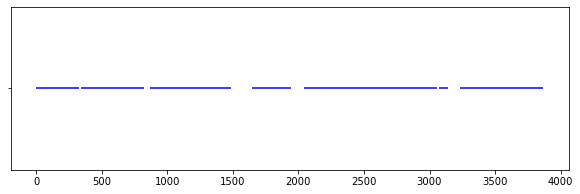

In [13]:
#A more efficient way of searching the table. Doesn't find non-contiguous annotations, though.

if False:
    gene_id = 'T379-R1'

    foundGene = False
    exon_start_l = []
    exon_end_l = []

    for ii in range(df.shape[0]):
        if df.iloc[ii]['type'] == 'mRNA':
            if not foundGene:
                if df.iloc[ii]['attributes'].split('|')[1].split(';')[0] == gene_id:
                    foundGene = True
                    startGene = df.iloc[ii]['start']
            else:
                break
        elif df.iloc[ii]['type'] == 'exon':
            if foundGene:
                exon_start_l.append(df.iloc[ii]['start'])
                exon_end_l.append(df.iloc[ii]['end'])
                
    exon_start_l = [x - startGene for x in exon_start_l]
    exon_end_l = [x - startGene for x in exon_end_l]            

    plt.figure(figsize = (10, 3))

    for xmin, xmax in zip(exon_start_l, exon_end_l):
        plt.hlines(y='', xmin=xmin, xmax=xmax, color='b')                

/var/folders/m0/rpw4gcbn5lxd8_3kt7g699rc0000gn/T/ipykernel_63941/3619571643.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (10, 1))


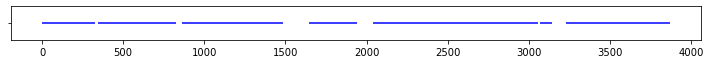

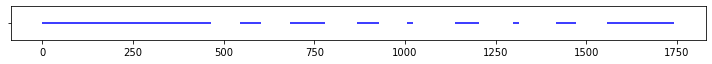

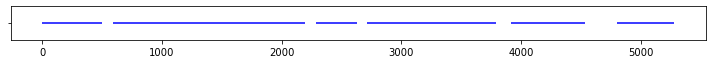

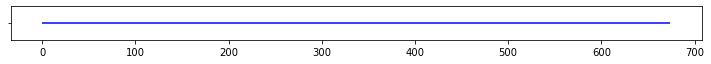

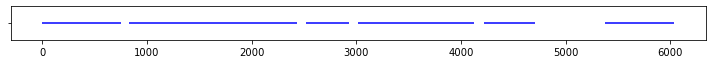

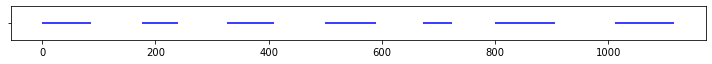

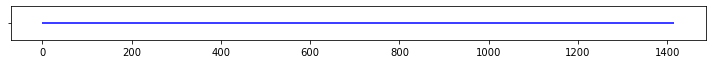

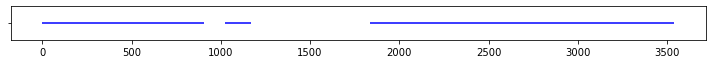

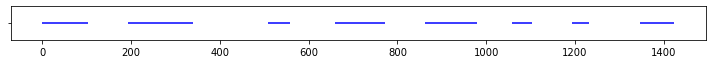

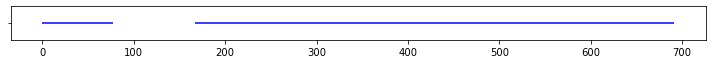

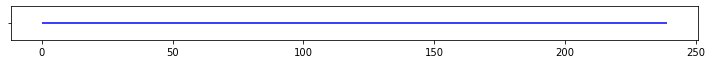

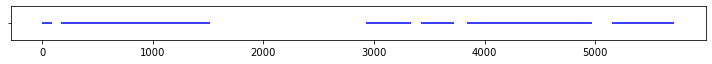

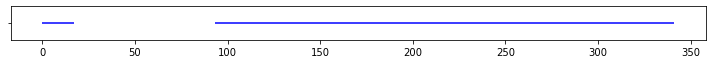

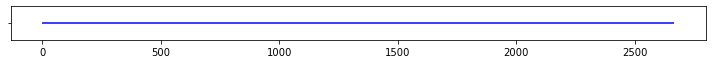

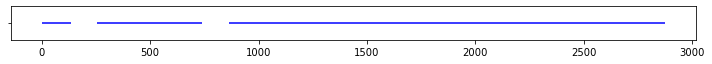

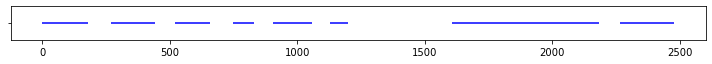

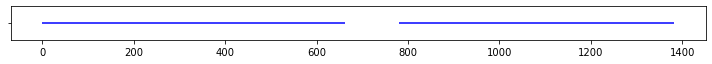

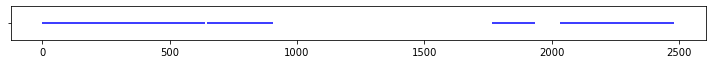

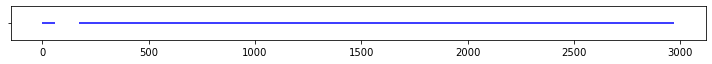

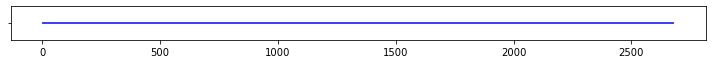

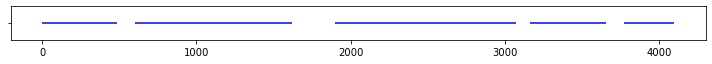

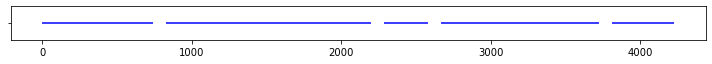

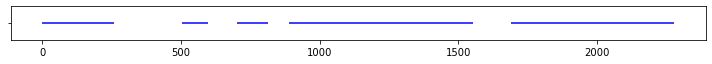

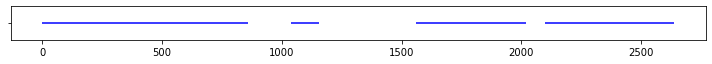

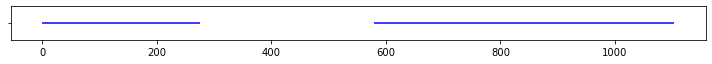

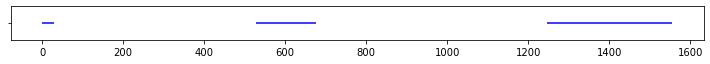

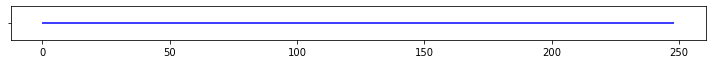

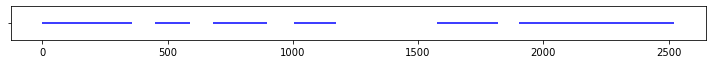

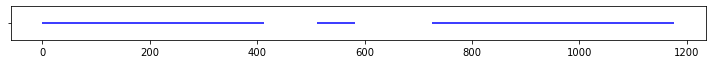

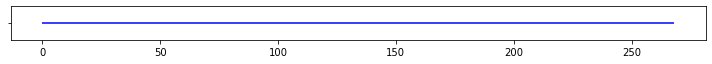

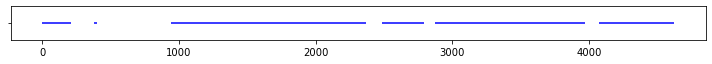

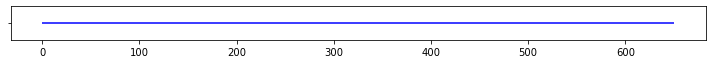

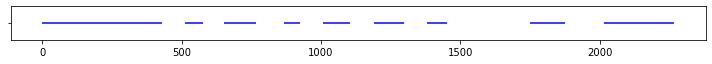

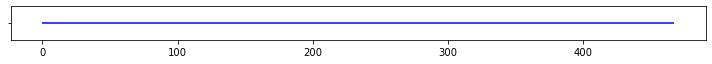

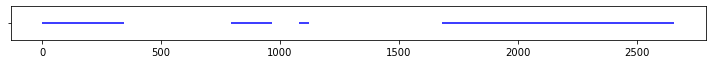

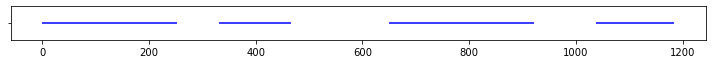

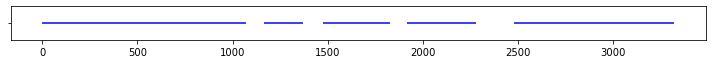

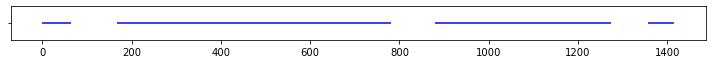

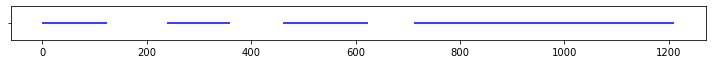

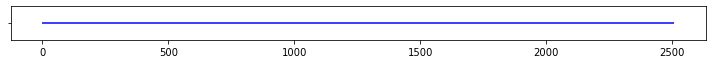

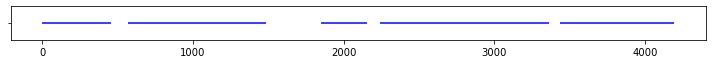

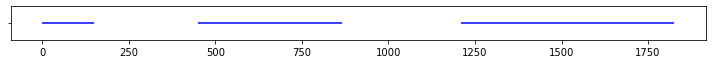

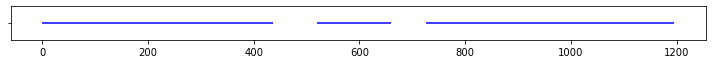

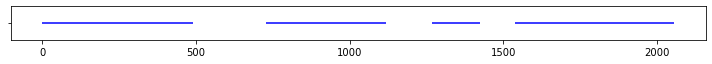

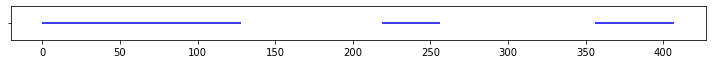

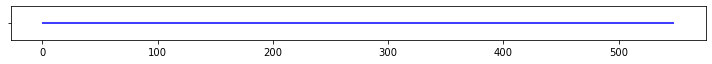

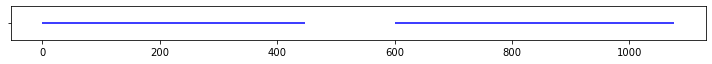

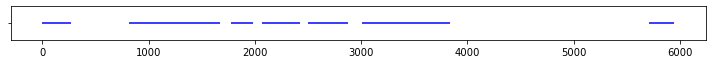

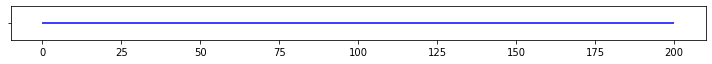

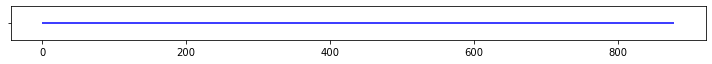

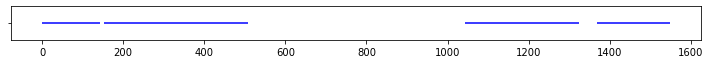

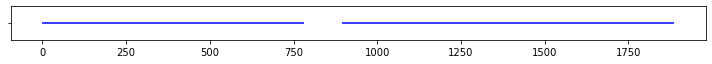

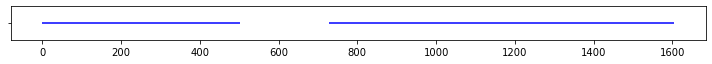

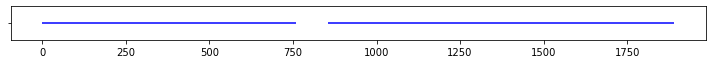

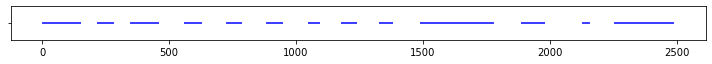

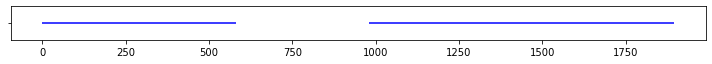

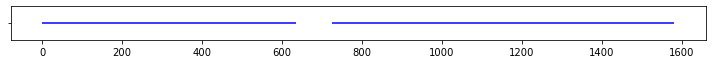

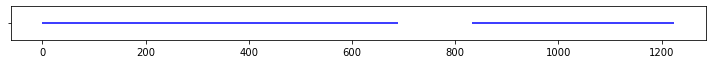

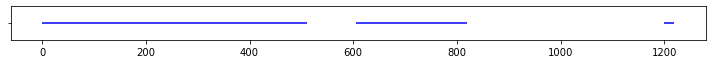

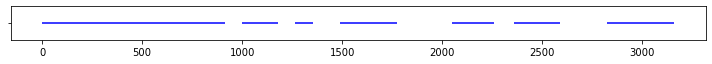

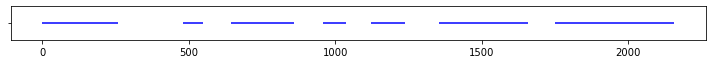

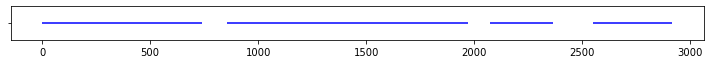

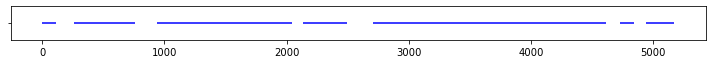

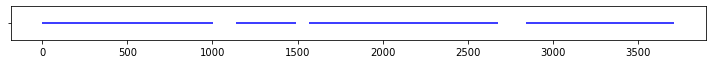

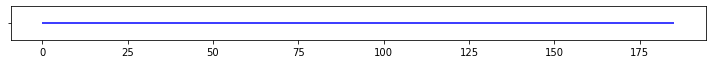

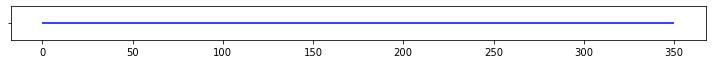

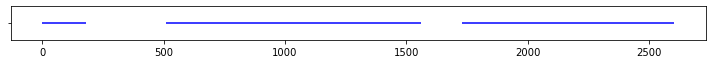

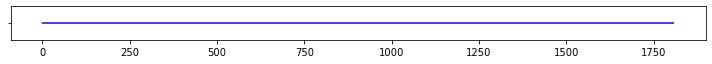

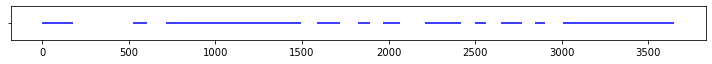

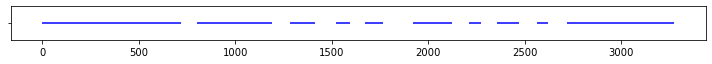

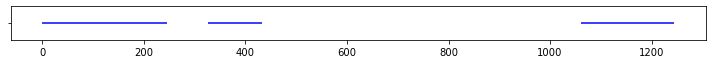

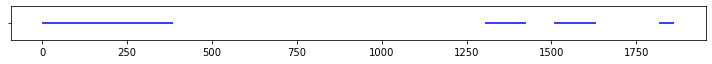

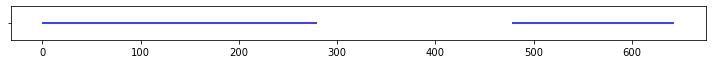

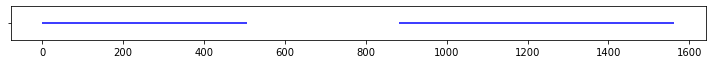

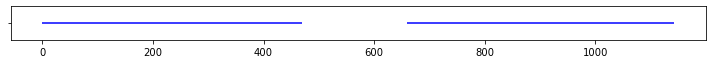

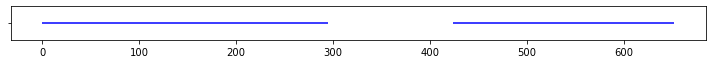

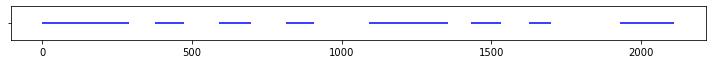

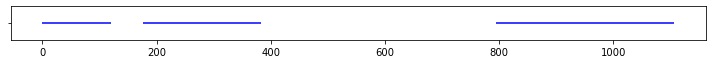

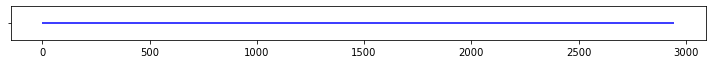

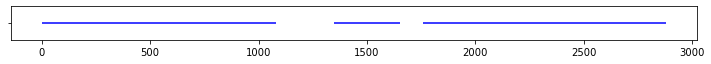

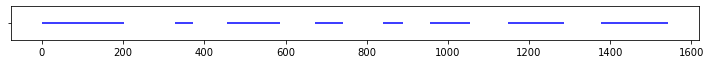

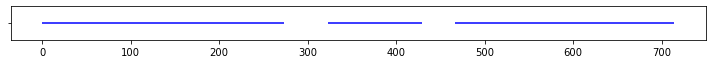

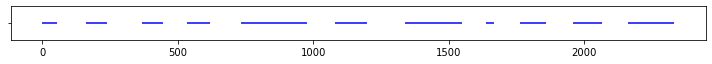

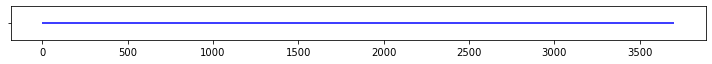

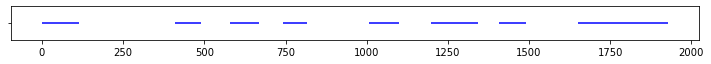

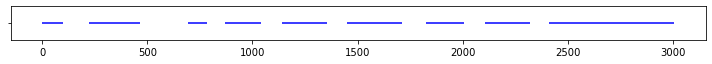

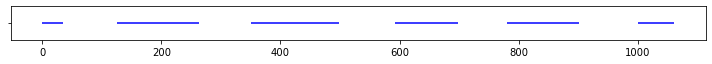

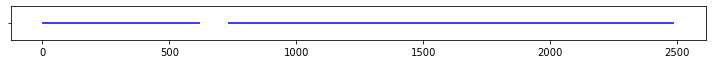

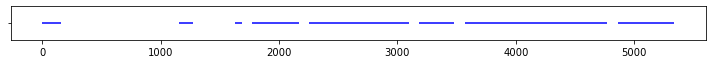

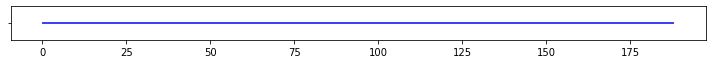

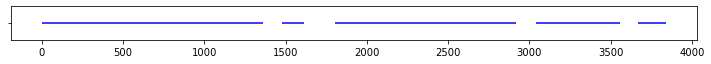

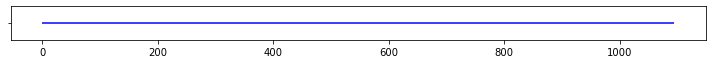

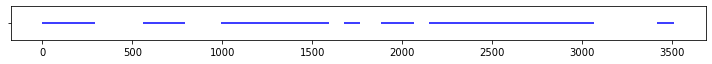

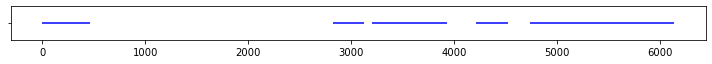

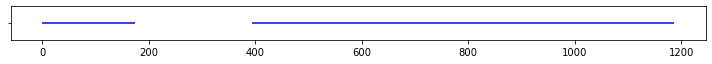

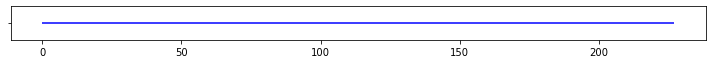

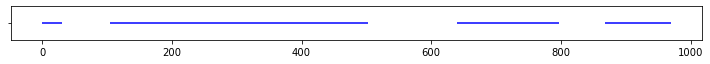

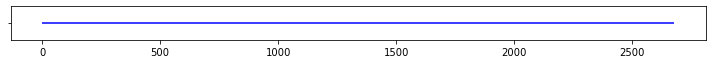

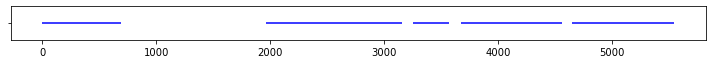

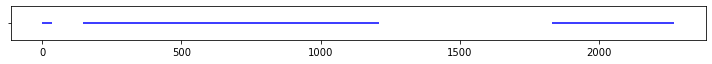

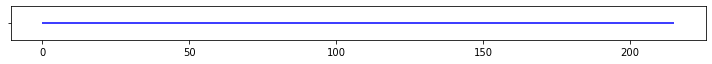

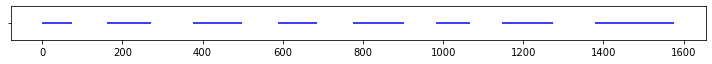

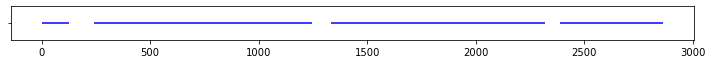

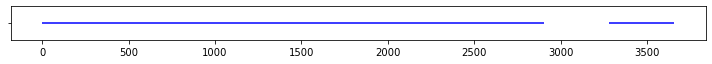

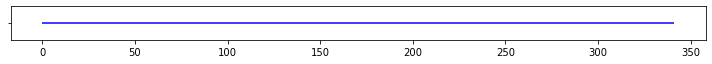

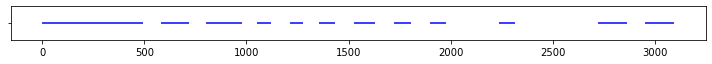

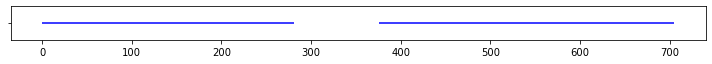

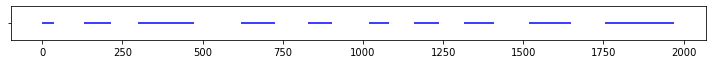

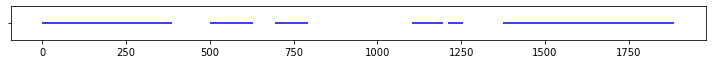

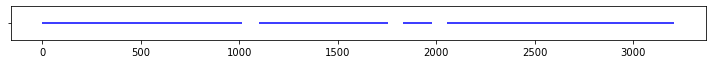

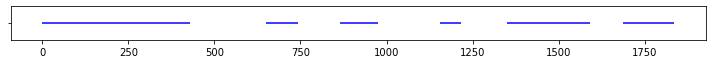

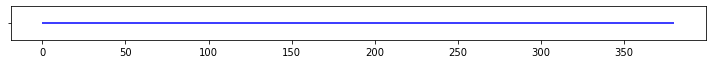

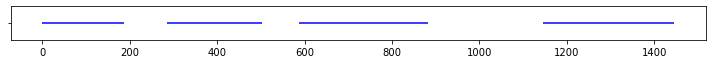

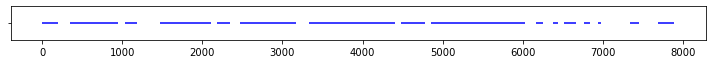

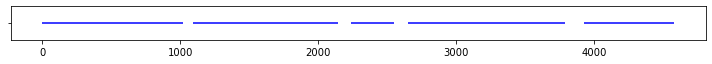

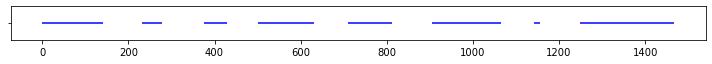

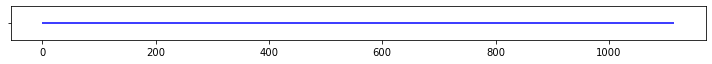

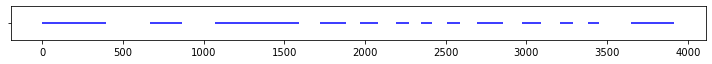

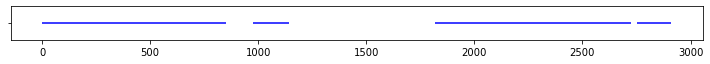

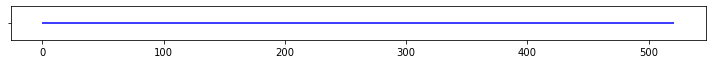

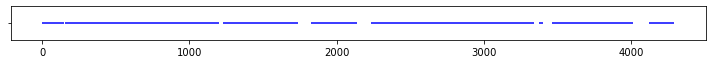

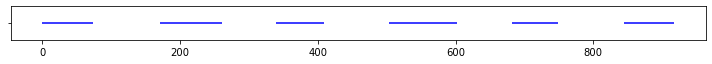

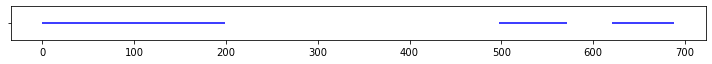

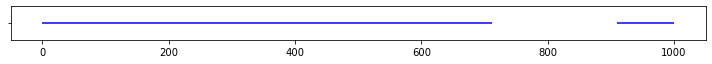

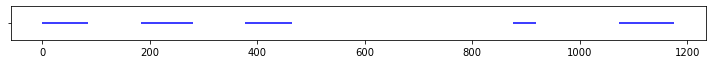

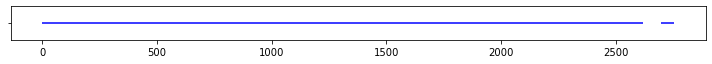

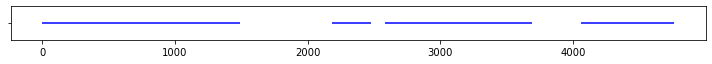

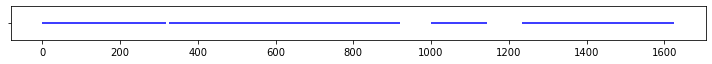

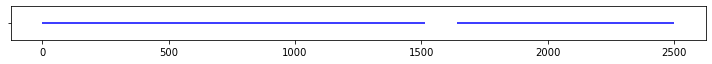

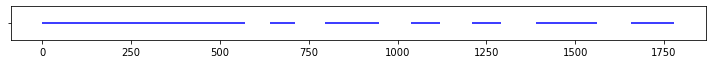

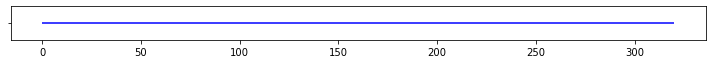

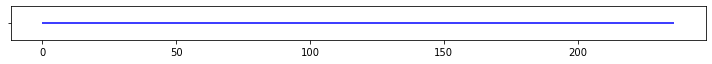

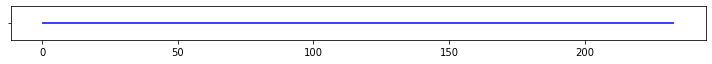

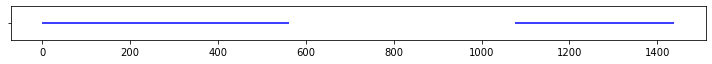

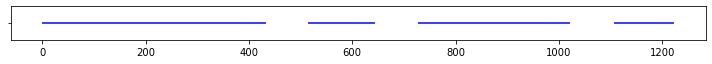

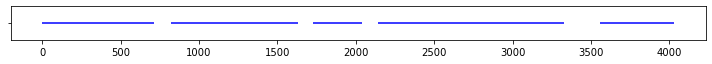

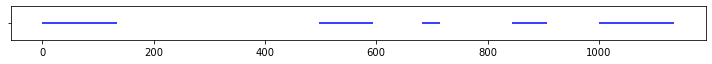

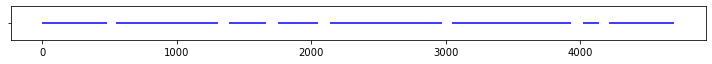

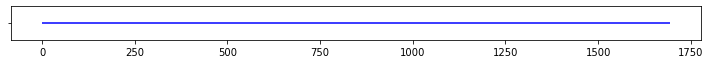

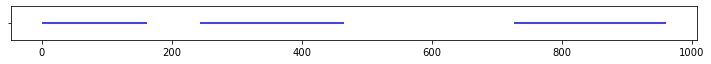

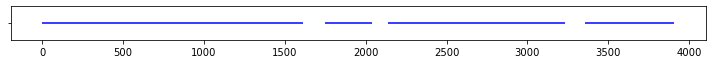

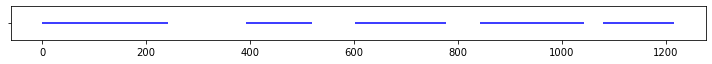

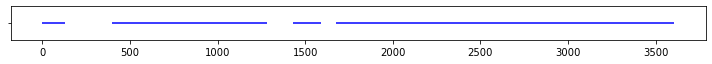

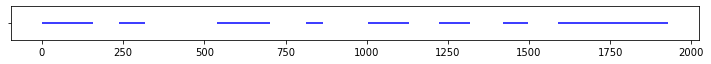

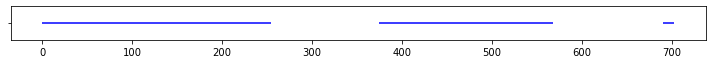

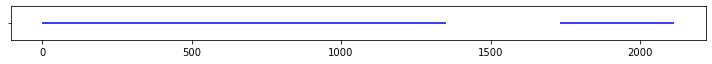

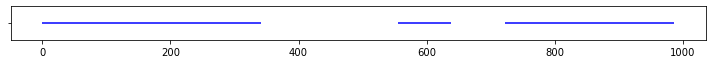

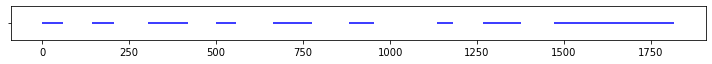

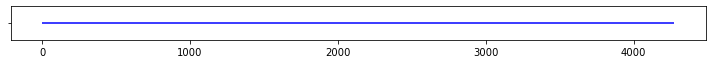

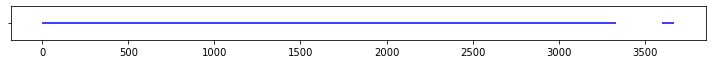

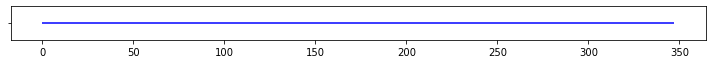

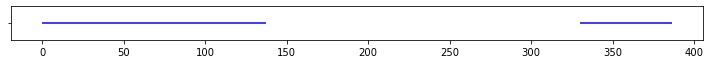

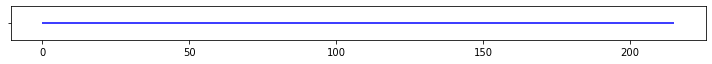

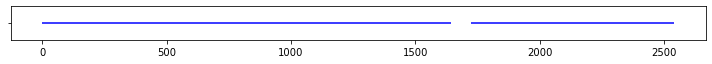

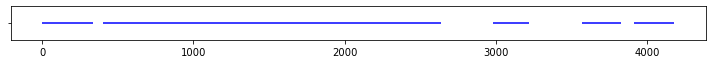

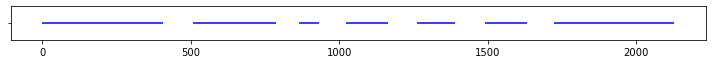

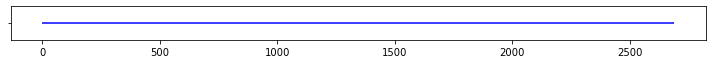

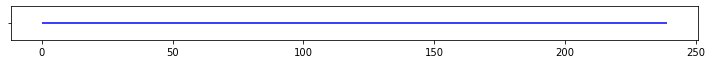

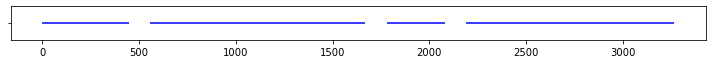

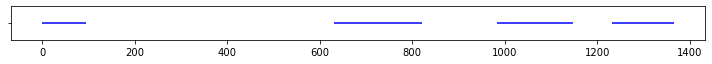

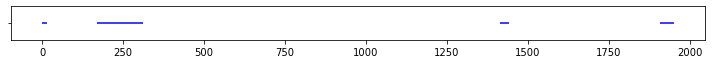

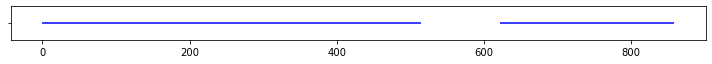

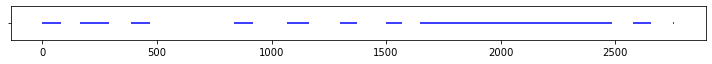

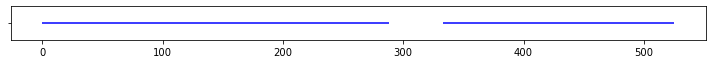

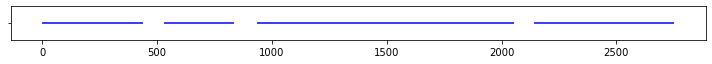

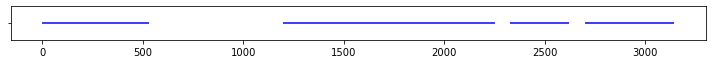

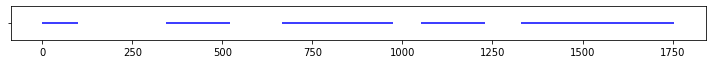

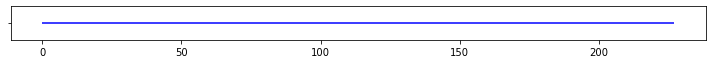

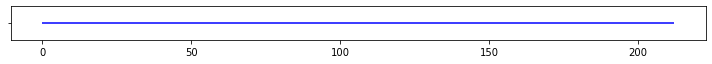

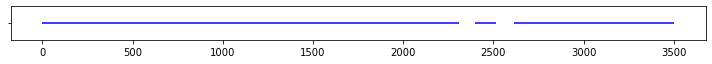

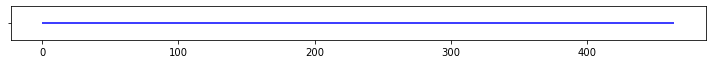

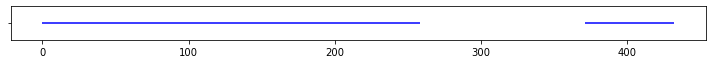

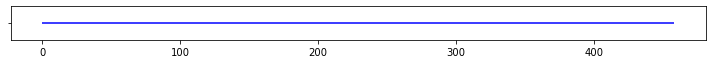

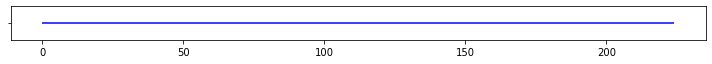

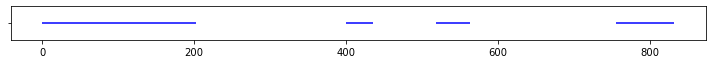

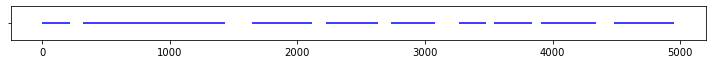

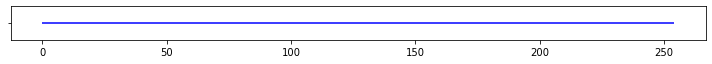

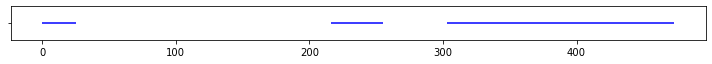

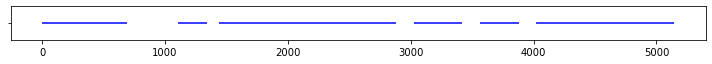

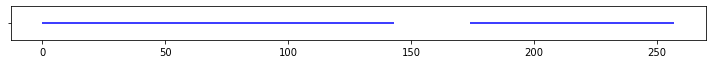

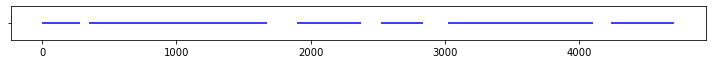

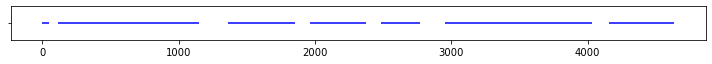

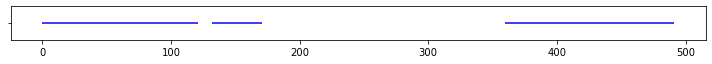

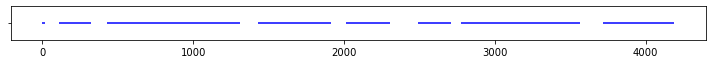

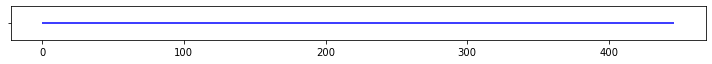

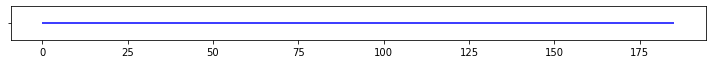

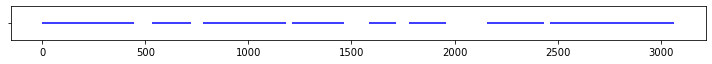

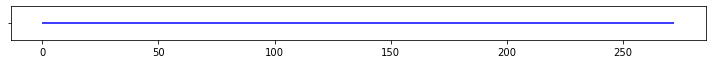

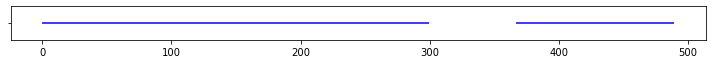

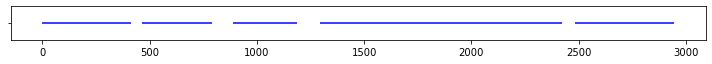

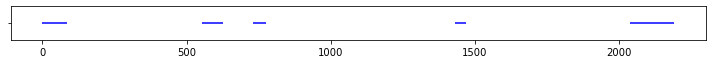

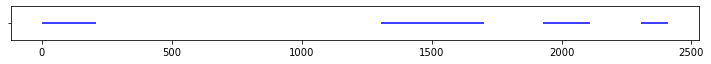

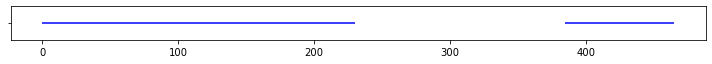

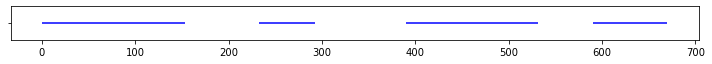

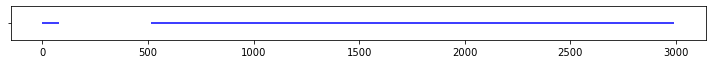

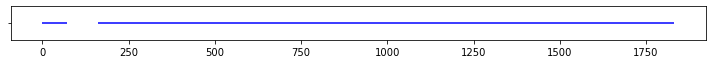

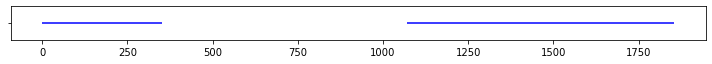

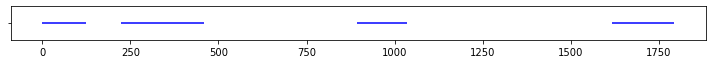

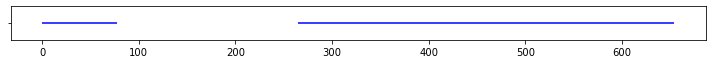

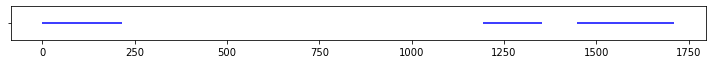

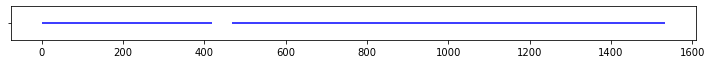

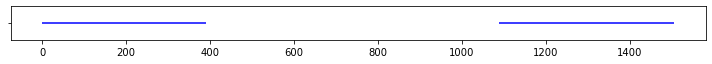

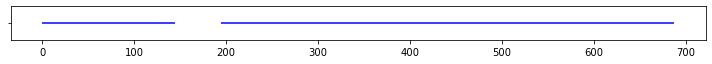

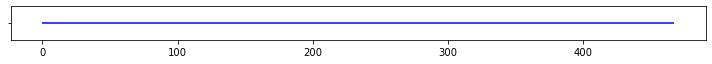

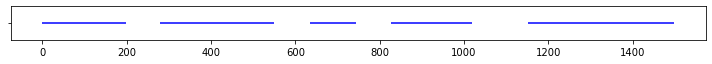

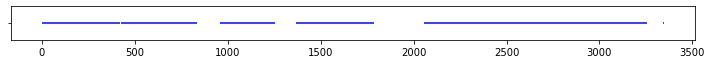

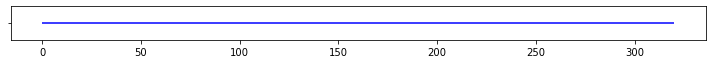

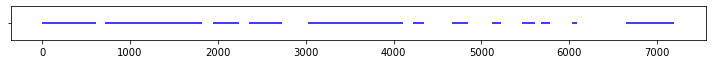

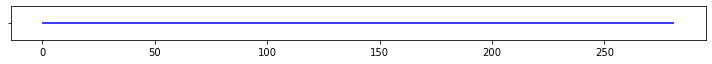

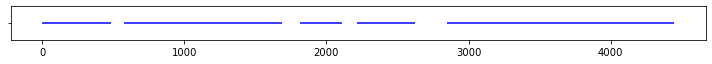

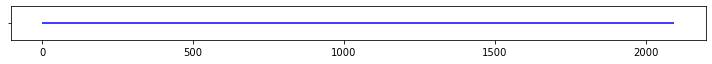

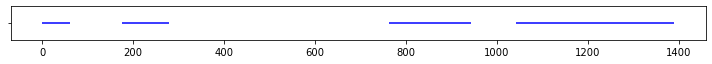

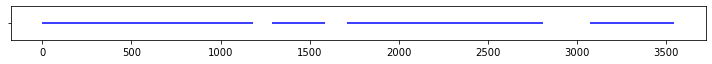

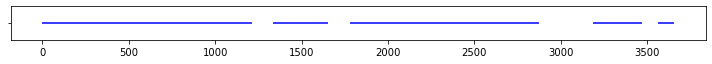

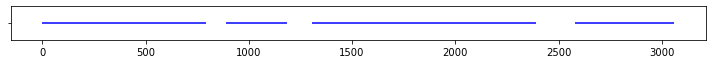

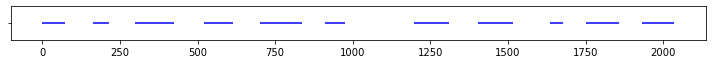

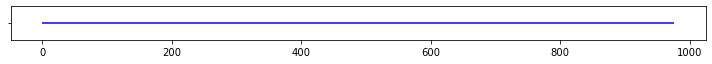

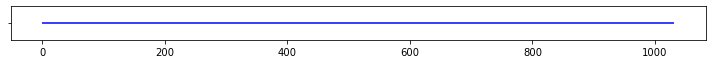

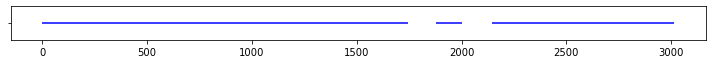

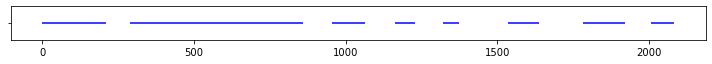

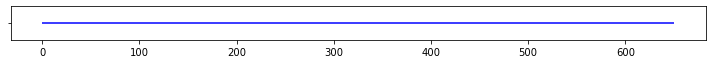

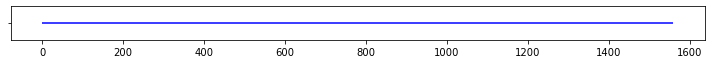

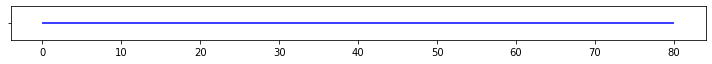

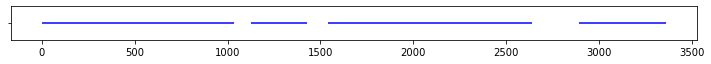

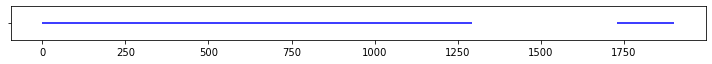

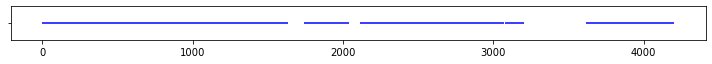

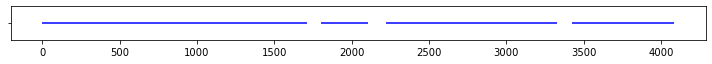

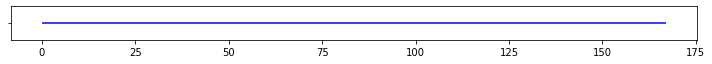

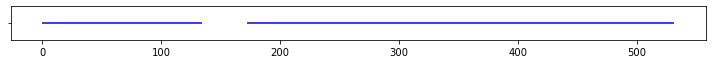

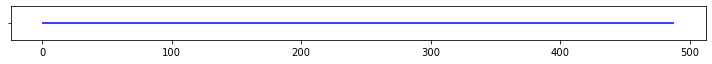

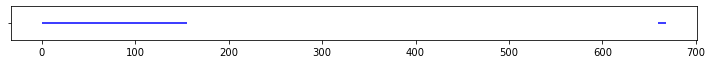

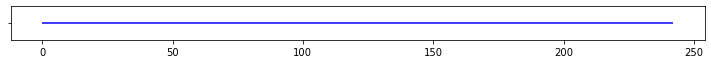

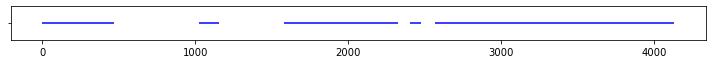

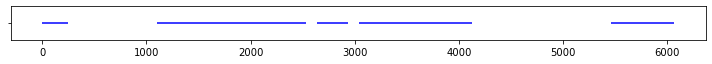

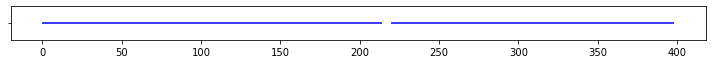

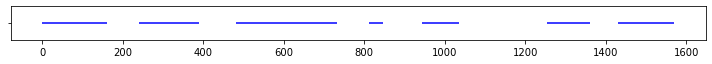

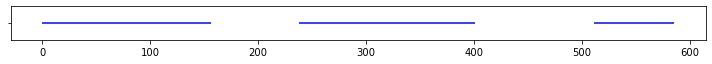

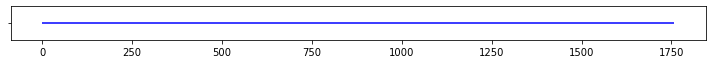

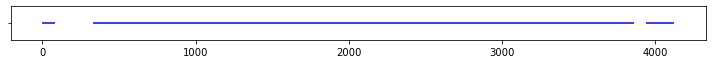

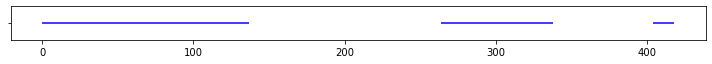

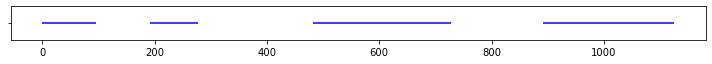

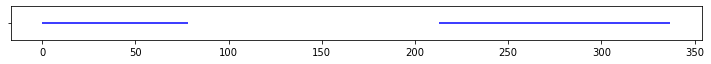

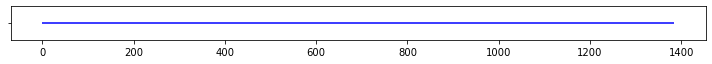

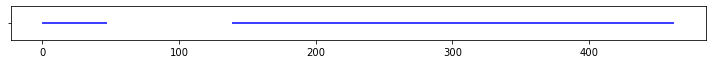

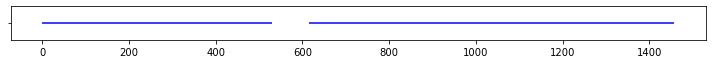

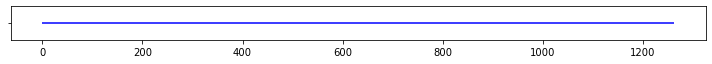

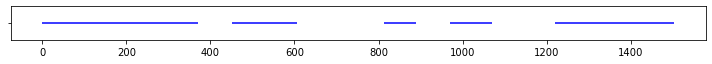

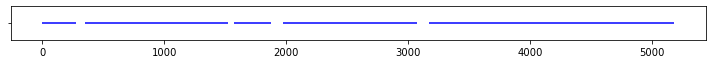

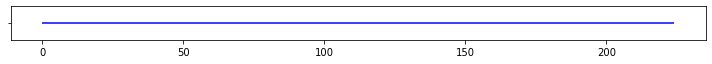

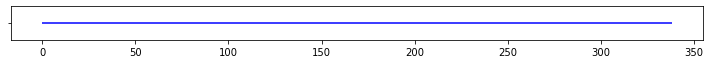

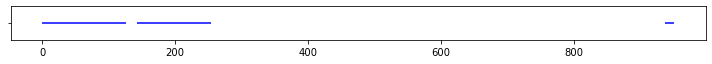

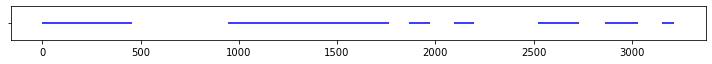

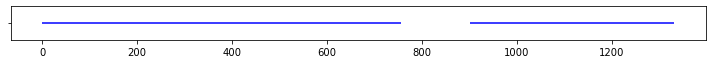

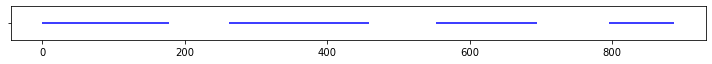

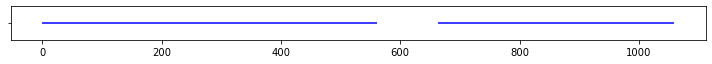

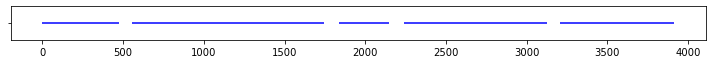

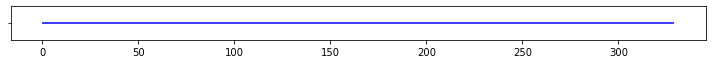

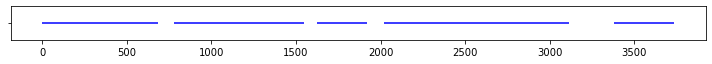

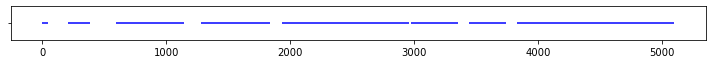

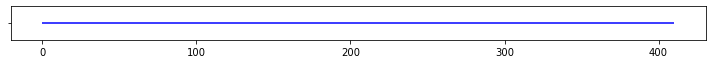

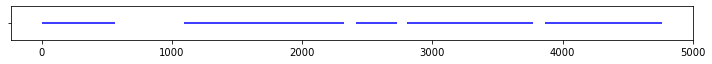

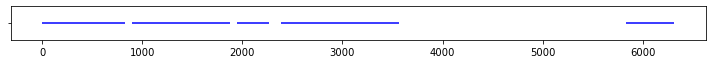

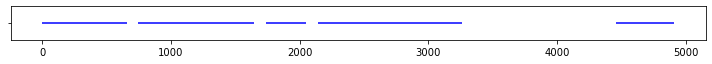

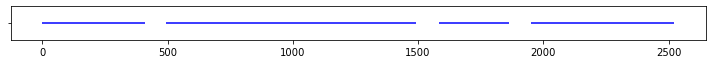

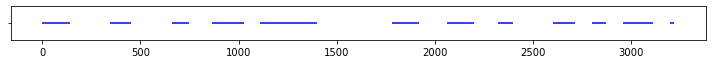

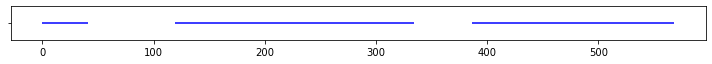

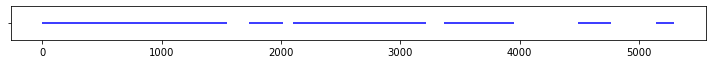

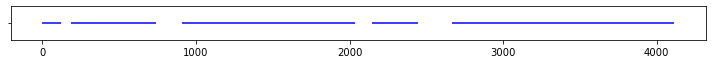

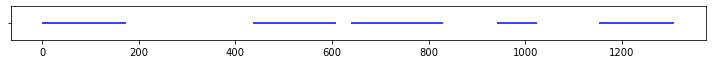

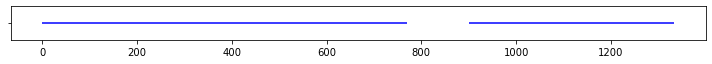

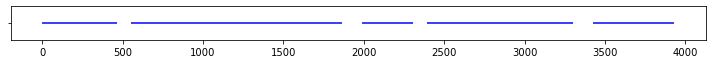

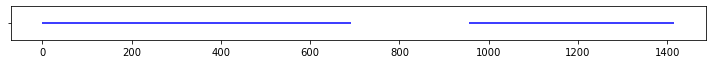

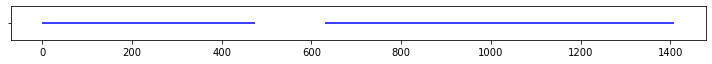

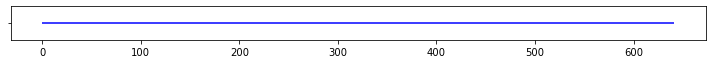

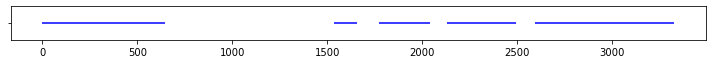

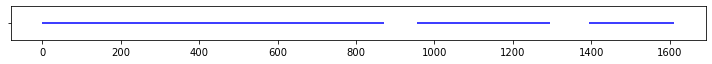

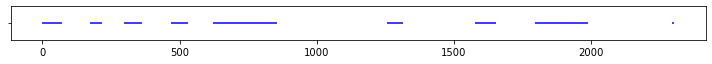

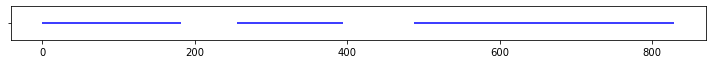

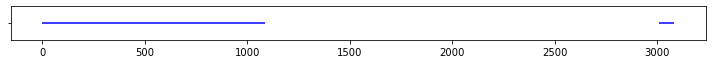

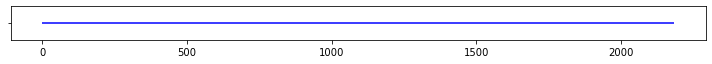

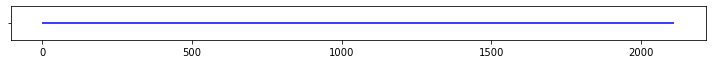

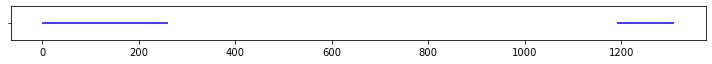

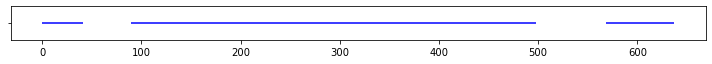

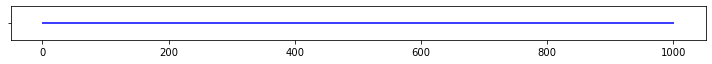

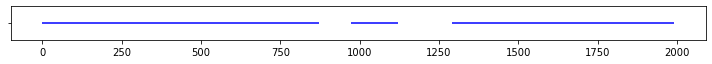

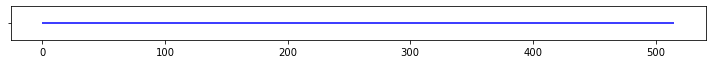

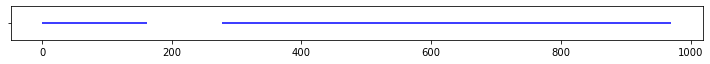

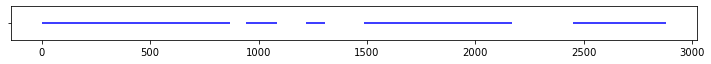

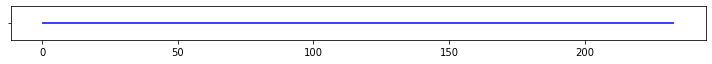

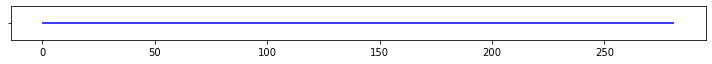

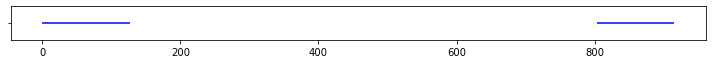

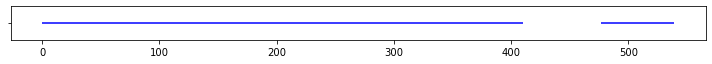

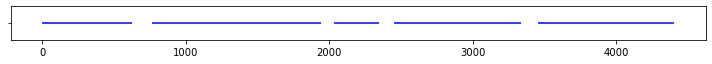

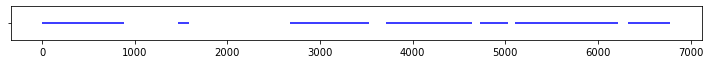

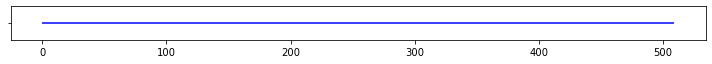

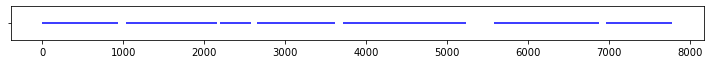

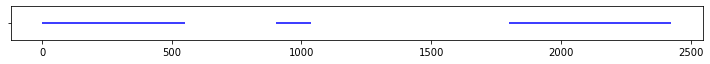

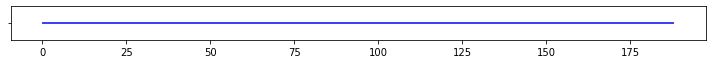

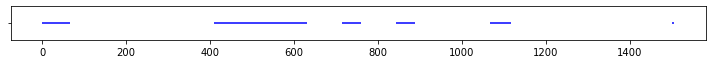

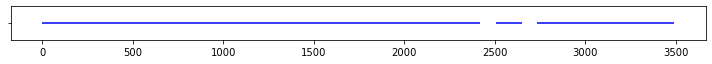

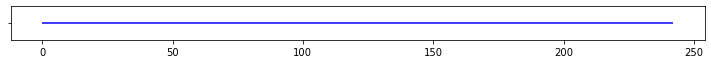

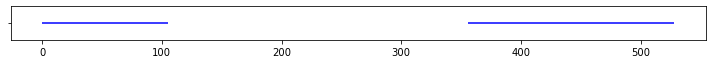

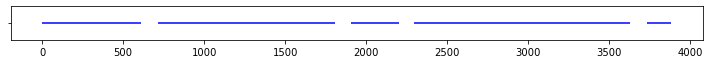

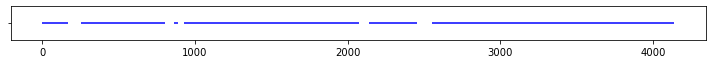

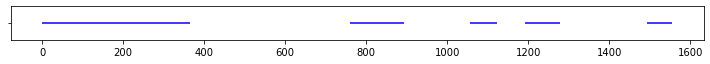

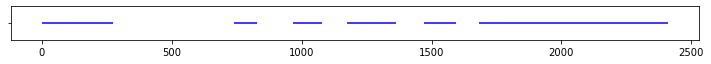

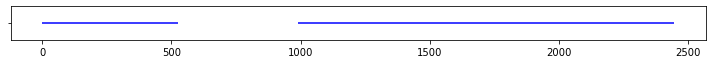

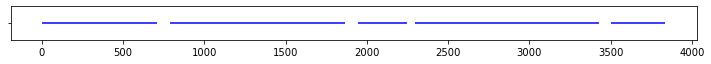

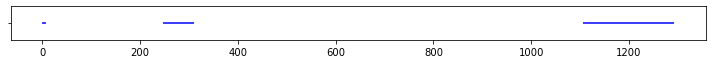

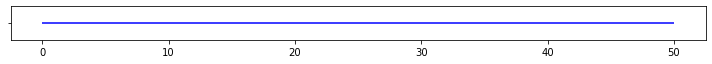

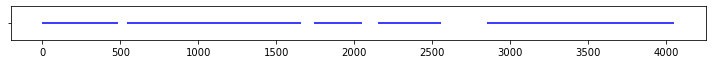

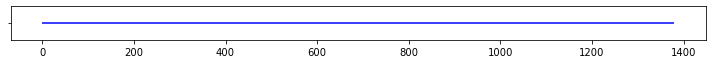

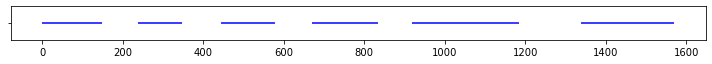

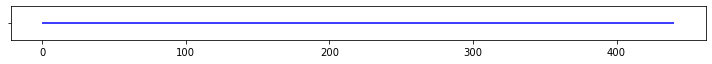

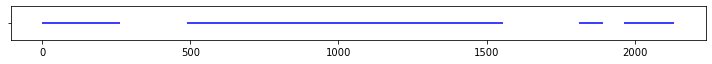

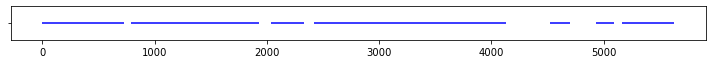

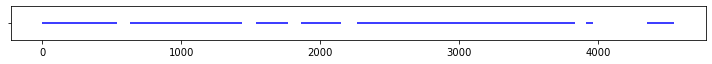

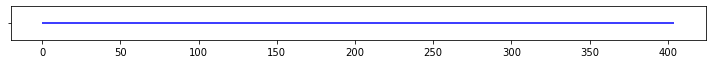

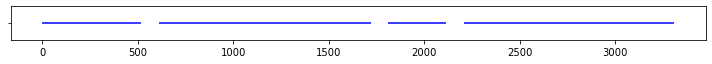

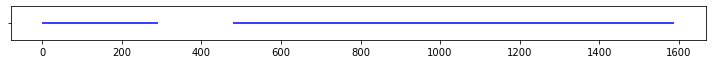

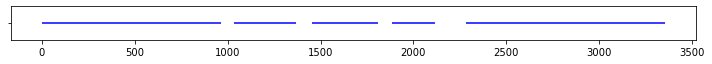

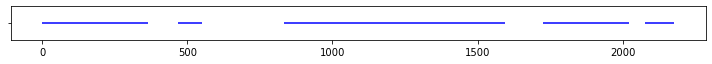

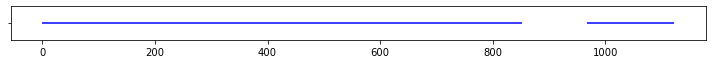

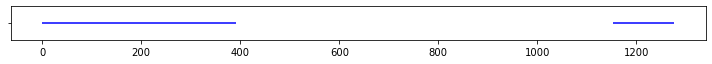

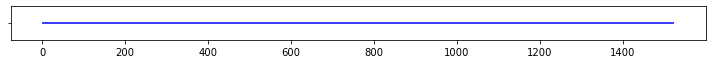

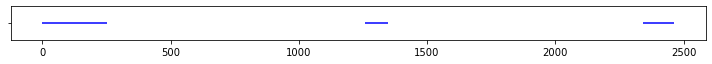

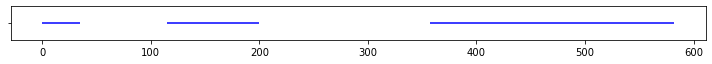

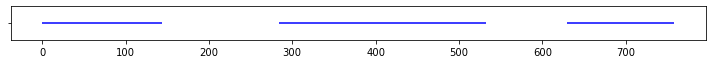

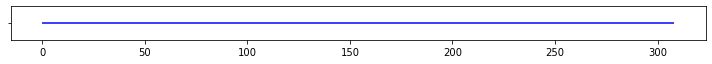

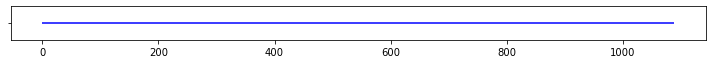

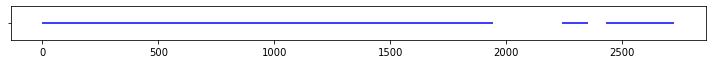

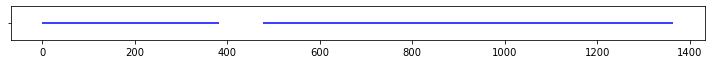

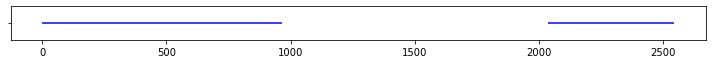

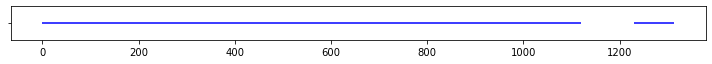

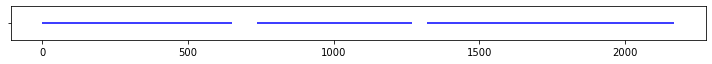

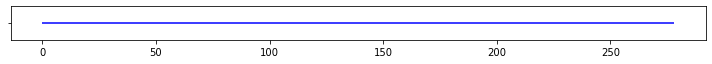

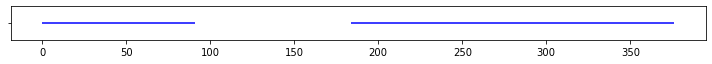

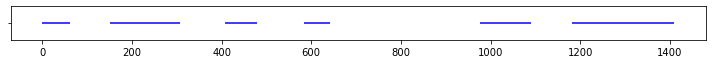

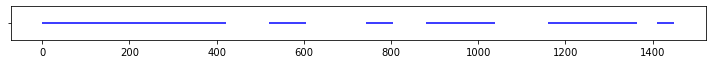

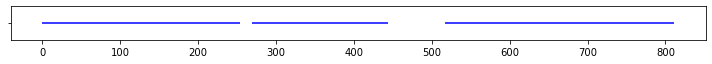

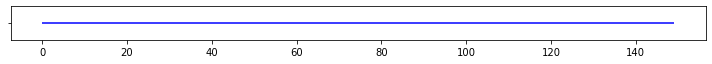

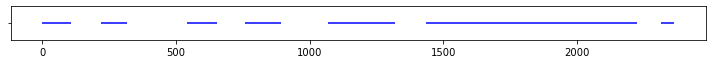

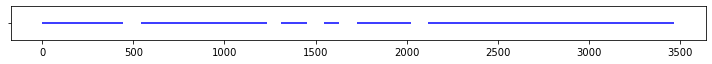

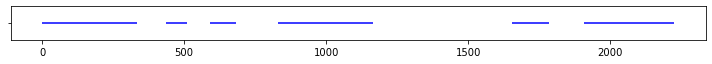

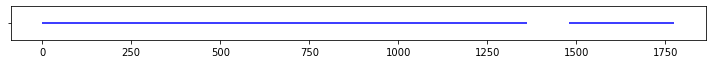

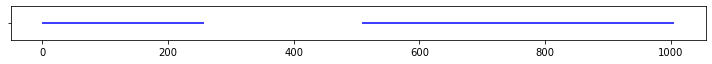

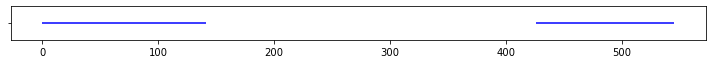

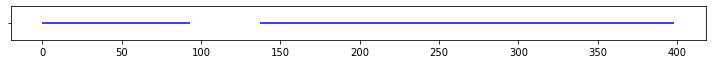

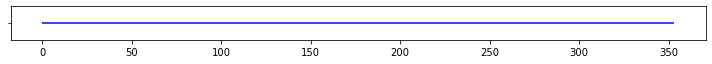

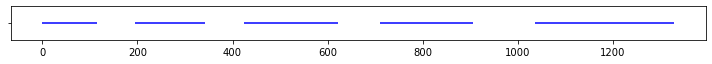

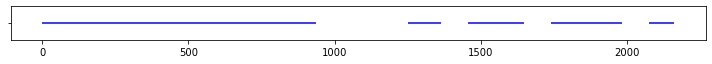

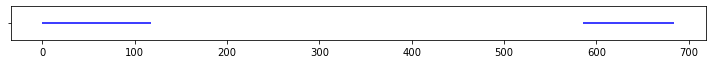

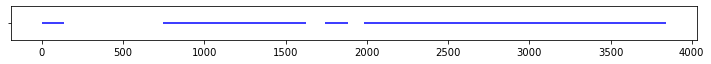

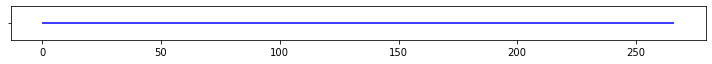

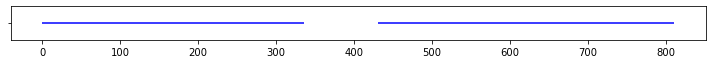

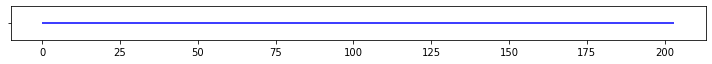

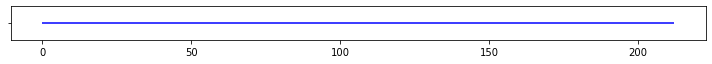

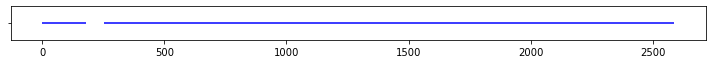

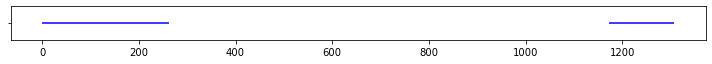

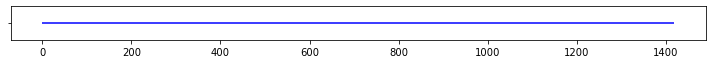

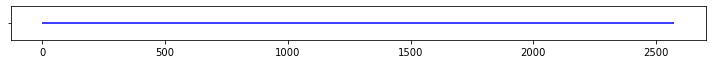

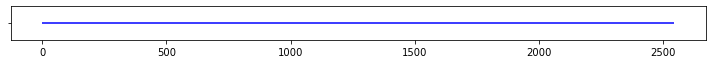

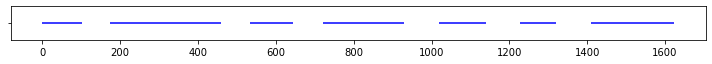

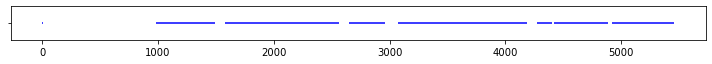

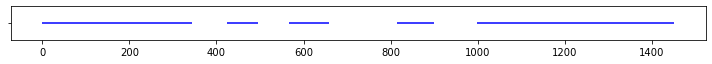

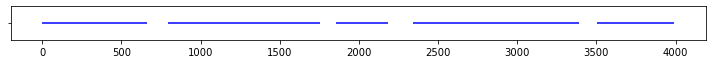

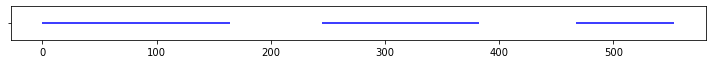

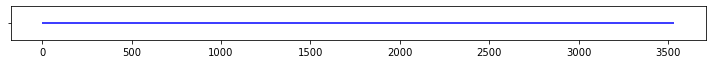

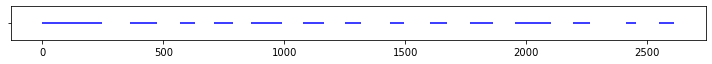

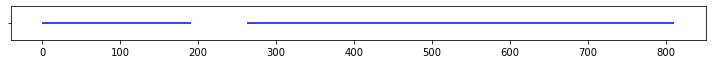

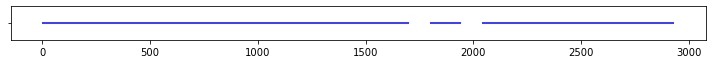

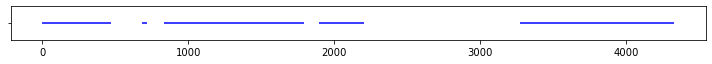

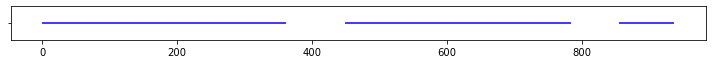

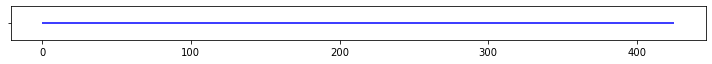

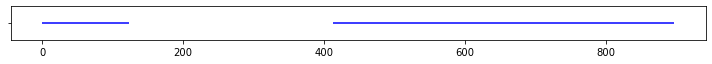

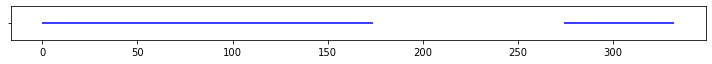

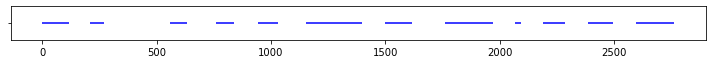

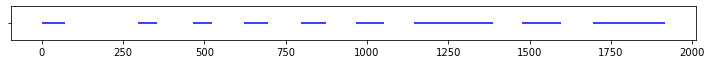

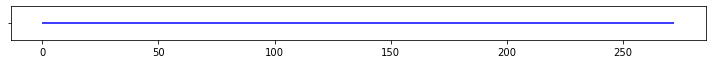

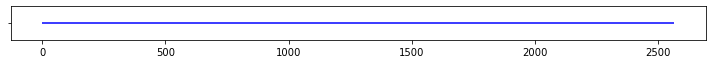

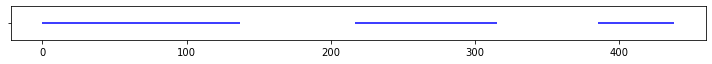

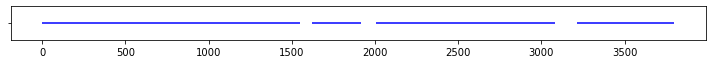

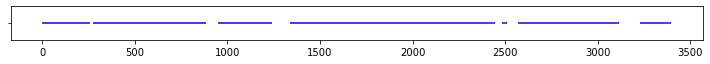

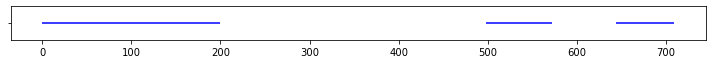

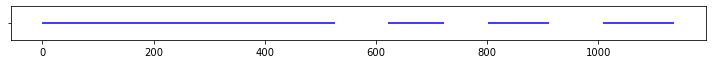

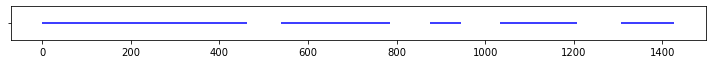

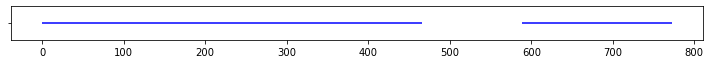

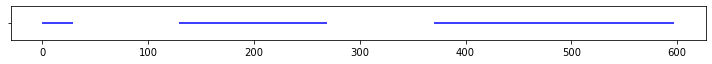

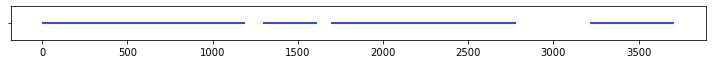

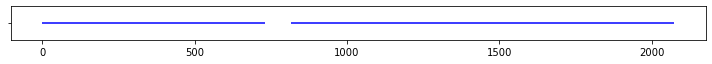

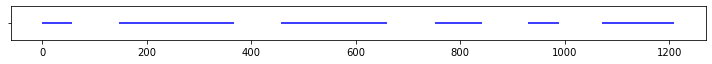

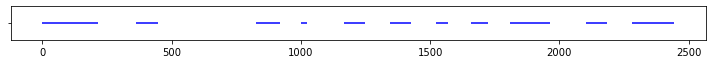

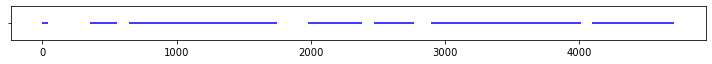

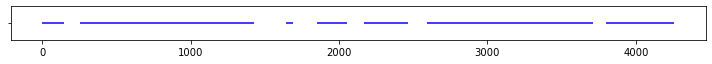

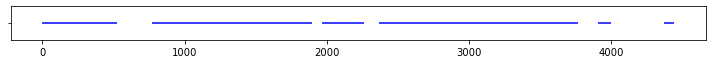

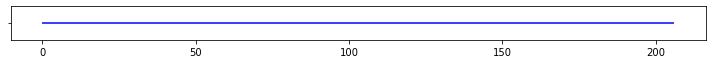

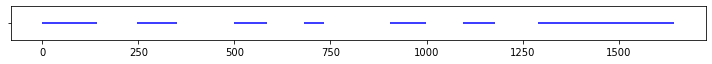

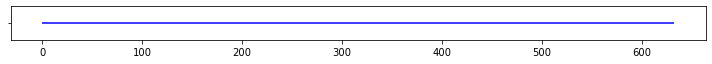

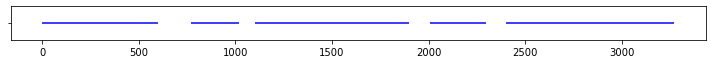

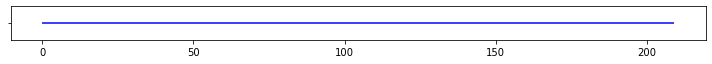

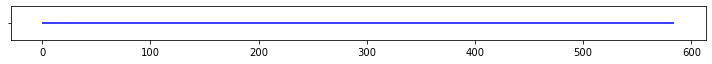

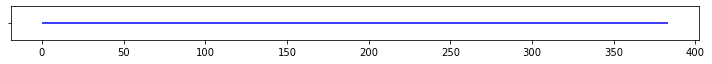

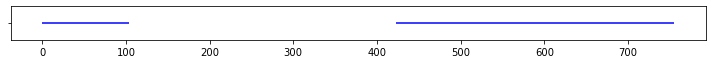

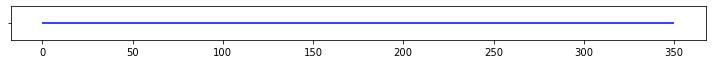

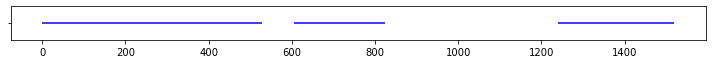

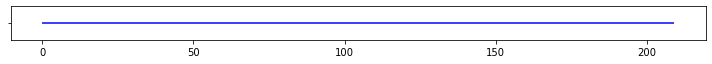

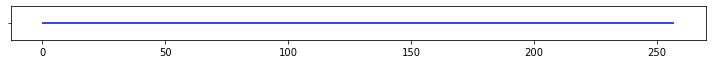

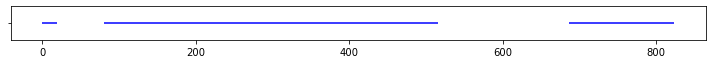

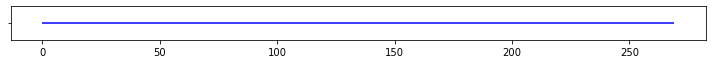

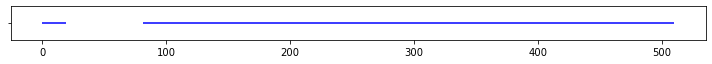

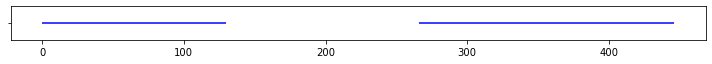

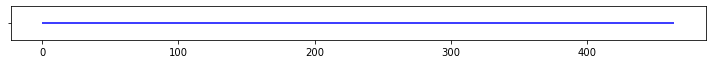

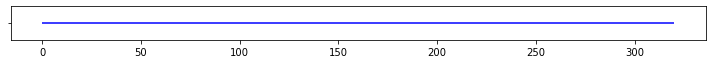

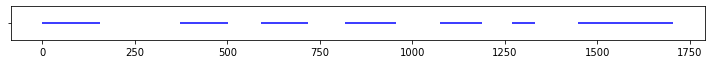

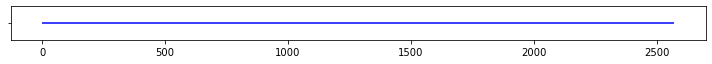

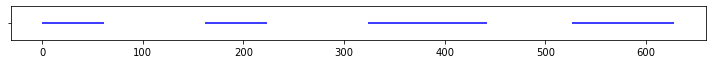

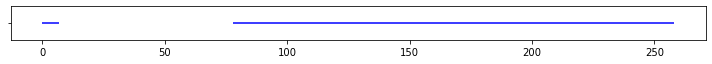

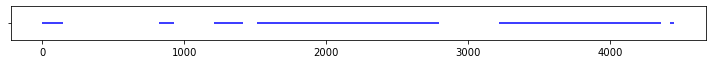

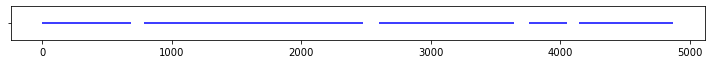

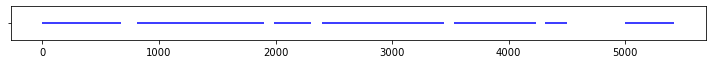

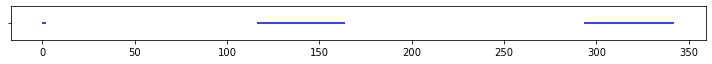

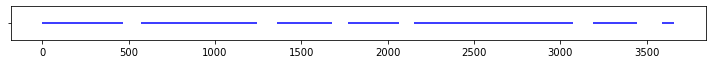

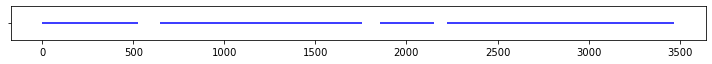

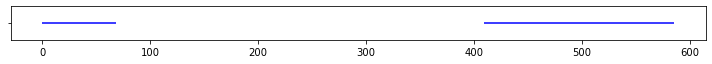

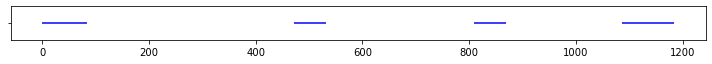

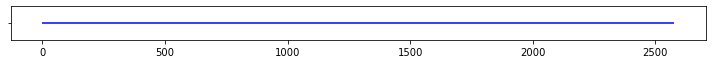

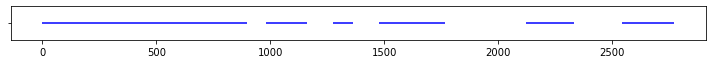

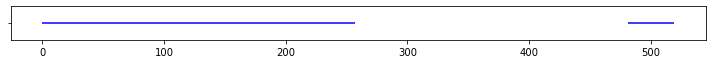

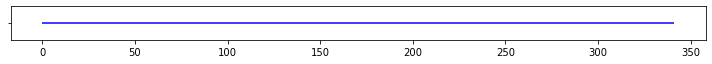

Error in callback <function flush_figures at 0x7f92090a0dc0> (for post_execute):


KeyboardInterrupt: 

In [42]:
#Searching the table for exons in a gene. Finds non-contiguous annotations.

plt.ioff()

for gene_id in gene_l:

    exon_coord_l = []

    for ii in range(df.shape[0]):
        if df.iloc[ii]['type'] == 'exon':
            if df.iloc[ii]['attributes'].split('|')[1].split(';')[0].startswith(gene_id):
                exon_coord_l.append((df.iloc[ii]['start'], df.iloc[ii]['end']))     

    geneStart = min([min(coord) for coord in exon_coord_l])
    exon_coord_zerostart = [(start-geneStart, end-geneStart) for start,end in exon_coord_l]

    fig = plt.figure(figsize = (10, 1))

    for xmin, xmax in exon_coord_zerostart:
        plt.hlines(y='', xmin=xmin, xmax=xmax, color='b')
    fig.tight_layout()        
    fig.patch.set_facecolor('xkcd:white') # make transparent background white
    fig.savefig(make_path('intron_plots', ecotype, gene_id+'.png'), bbox_inches="tight")
    plt.close(fig)

In [16]:
gene_l

['T379-R1',
 'T378-R1',
 'T127-R1',
 'T129-R1',
 'T128-R1',
 'T130-R1',
 'T126-R1',
 'T324-R1',
 'T326-R1',
 'T323-R1',
 'T228-R1',
 'T229-R1',
 'T242-R1',
 'T240-R1',
 'T238-R1',
 'T241-R1',
 'T251-R1',
 'T253-R1',
 'T252-R1',
 'T082-R1',
 'T084-R1',
 'T083-R1',
 'T081-R1',
 'T085-R1',
 'T484-R1',
 'T483-R1',
 'T423-R1',
 'T424.3-R1',
 'T424.2-R1',
 'T424.1-R1',
 'T267.1-R1',
 'T265-R1',
 'T267.2-R1',
 'T266-R1',
 'T381-R1',
 'T383-R1',
 'T382-R1',
 'T270-R1',
 'T268-R1',
 'T269-R1',
 'T360-R1',
 'T361-R1',
 'T359-R1',
 'T413-R1',
 'T414-R1',
 'T412-R1',
 'T491-R1',
 'T318-R1',
 'T319-R1',
 'T320-R1',
 'T317-R1',
 'T056-R1',
 'T055.2-R1',
 'T059-R1',
 'T061-R1',
 'T055.1-R1',
 'T060-R1',
 'T058-R1',
 'T057-R1',
 'T494-R1',
 'T188-R1',
 'T190-R1',
 'T189-R1',
 'T275-R1',
 'T273-R1',
 'T276-R1',
 'T274-R1',
 'T272.2-R1',
 'T271-R1',
 'T272.1-R1',
 'T492-R1',
 'T493-R1',
 'T205-R1',
 'T203-R1',
 'T202-R1',
 'T204-R1',
 'T206-R1',
 'T336-R1',
 'T335-R1',
 'T422-R1',
 'T421-R1',
 'T482-R1'

In [11]:
#A more efficient way of searching the table. Doesn't find non-contiguous annotations, though.

gene_id = 'T378-R1'

foundGene = False
exon_coord_l = []

for ii in range(df.shape[0]):
    if df.iloc[ii]['type'] == 'mRNA':
        if not foundGene:
            if df.iloc[ii]['attributes'].split('|')[1].split(';')[0] == gene_id:
                foundGene = True
        else:
            break
    elif df.iloc[ii]['type'] == 'exon':
        if foundGene:
            exon_coord_l.append((df.iloc[ii]['start'], df.iloc[ii]['end']))   

In [12]:
exon_coord_l

[(1559, 1743),
 (1417, 1473),
 (1298, 1316),
 (1139, 1206),
 (1007, 1022),
 (869, 930),
 (685, 781),
 (547, 603),
 (1, 465)]

In [ ]:
exon_start_l = []
exon_end_l = []

gene_exon_start_l = []
gene_exon_end_l = []

geneStart = 2707
geneEnd = 6575

for ii in range(df.shape[0]):
    if df.iloc[ii]['seq_id'] == 'tig00000074':
        if df.iloc[ii]['type'] == 'exon':
            exon_start_l.append(df.iloc[ii]['start'])
# print(exon_start_l)
            exon_end_l.append(df.iloc[ii]['end'])
# print(exon_end_l)

for x, y in zip(exon_start_l, exon_end_l):
    if x >= geneStart and x <= geneEnd: 
        gene_exon_start_l.append(x)
    if y >= geneStart and y <= geneEnd: 
        gene_exon_end_l.append(y)

In [ ]:
xs = [1, 100]

plt.figure(figsize = (10, 7))

plt.vlines(x = gene_exon_start_l, ymin = 0, ymax = max(xs),
           colors = 'blue',
           label = 'vline_multiple - full height')

plt.vlines(x = gene_exon_end_l, ymin = 0, ymax = max(xs),
           colors = 'red',
           label = 'vline_multiple - full height')
plt.title("ID=10015|G379;Alias=maker-tig00000074-snap-gene-0.6;Name=10015|G379;NLR=TNL")

In [ ]:
combined_l = []
for jj, end in enumerate(gene_exon_end_l):
    combined_l.append((gene_exon_start_l[jj], end))
# print(combined_l)

xs = [1, 100]

plt.figure(figsize = (10, 7))

plt.vlines(x = combined_l[0], ymin = 0, ymax = max(xs),
           colors = 'red',
           label = 'vline_multiple - full height')

plt.vlines(x = combined_l[1], ymin = 0, ymax = max(xs),
           colors = 'orange',
           label = 'vline_multiple - full height')

plt.vlines(x = combined_l[2], ymin = 0, ymax = max(xs),
           colors = 'yellow',
           label = 'vline_multiple - full height')

plt.vlines(x = combined_l[3], ymin = 0, ymax = max(xs),
           colors = 'green',
           label = 'vline_multiple - full height')

plt.vlines(x = combined_l[4], ymin = 0, ymax = max(xs),
           colors = 'blue',
           label = 'vline_multiple - full height')

plt.vlines(x = combined_l[5], ymin = 0, ymax = max(xs),
           colors = 'purple',
           label = 'vline_multiple - full height')

plt.vlines(x = combined_l[6], ymin = 0, ymax = max(xs),
           colors = 'pink',
           label = 'vline_multiple - full height')
plt.title("ID=10015|G379;Alias=maker-tig00000074-snap-gene-0.6;Name=10015|G379;NLR=TNL")